<a href="https://colab.research.google.com/github/Sep-eg/kaggle_study/blob/main/Kaggle%20survey/ODAD_lv2_1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Novice to Grandmaster- What Data Scientists say?

Kaggle은 100만 명 이상의 사용자를 보유한 세계 최대의 데이터 과학 플랫폼이며, 저와 같은 학생들이 데이터 과학 및 머신 러닝 분야에서 배우고 성장할 수 있는 훌륭한 플랫폼입니다. 여기에는 통계학자, 데이터 과학자 및 기계 학습 실무자와 같은 다양한 도메인의 사용자가 있습니다. Kaggle이 게시한 이 데이터 세트는 데이터를 분석하고 조사하는 것을 좋아하는 저와 같은 사람들을 위한 보석입니다. 이 노트북에서 우리는 가장 많이 사용되는 도구, 데이터 과학을 배우기 위한 리소스 등과 같이 각 신진 데이터 과학자가 알고 싶어하는 몇 가지 트렌드 또는 몇 가지 일반적인 질문을 찾으려고 노력할 것입니다.

우리가 직면할 수 있는 가장 큰 문제는 가짜 응답입니다. 설문조사이기 때문에 모든 사람이 적절한 자격 증명으로 답변하는 것은 아니므로 많은 이상치가 있을 것이라고 가정합니다. 데이터 풀에 직접 뛰어들어 몇 가지 통찰력을 얻으십시오.

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d kaggle/kaggle-survey-2017

  0% 0.00/3.52M [00:00<?, ?B/s]
100% 3.52M/3.52M [00:00<00:00, 118MB/s]


In [2]:
!unzip "kaggle-survey-2017.zip"

Archive:  kaggle-survey-2017.zip
  inflating: RespondentTypeREADME.txt  
  inflating: conversionRates.csv     
  inflating: freeformResponses.csv   
  inflating: multipleChoiceResponses.csv  
  inflating: schema.csv              


# Introduction 

### Who are Data Scientists?

데이터 과학자는 데이터를 정리, 관리 및 구성하고, 통찰력을 개발하고, 예측 모델을 구축하고, 비즈니스 관련 문제를 해결하기 위해 기술 통계 및 분석을 수행하는 통계학자 또는 프로그래머입니다. kaggle의 데이터 과학자들이 말하는 내용을 살펴보겠습니다.

In [3]:
!pip install squarify
!pip install scipy==1.1.0

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
from scipy.misc import imread
import codecs
from IPython.display import HTML
from matplotlib_venn import venn2
from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

conversionRates.csv
freeformResponses.csv
kaggle.json
kaggle-survey-2017.zip
multipleChoiceResponses.csv
RespondentTypeREADME.txt
sample_data
schema.csv



In [5]:
response=pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1')

In [6]:
response.head()

GenderSelect  ... JobFactorPublishingOpportunity
0  Non-binary, genderqueer, or gender non-conforming  ...                            NaN
1                                             Female  ...                            NaN
2                                               Male  ...                 Very Important
3                                               Male  ...                            NaN
4                                               Male  ...                            NaN

[5 rows x 228 columns]

## Some Basic Analysis

In [7]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique())
print('Country with highest respondents:',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


진지하게?? 최연소 응답자는 한 살도 되지 않았습니다!! 그리고 할아버지가 100세에 아직도 코딩을 하고 있는 이유는 가짜 응답일 수 있습니다.

## Gender Split

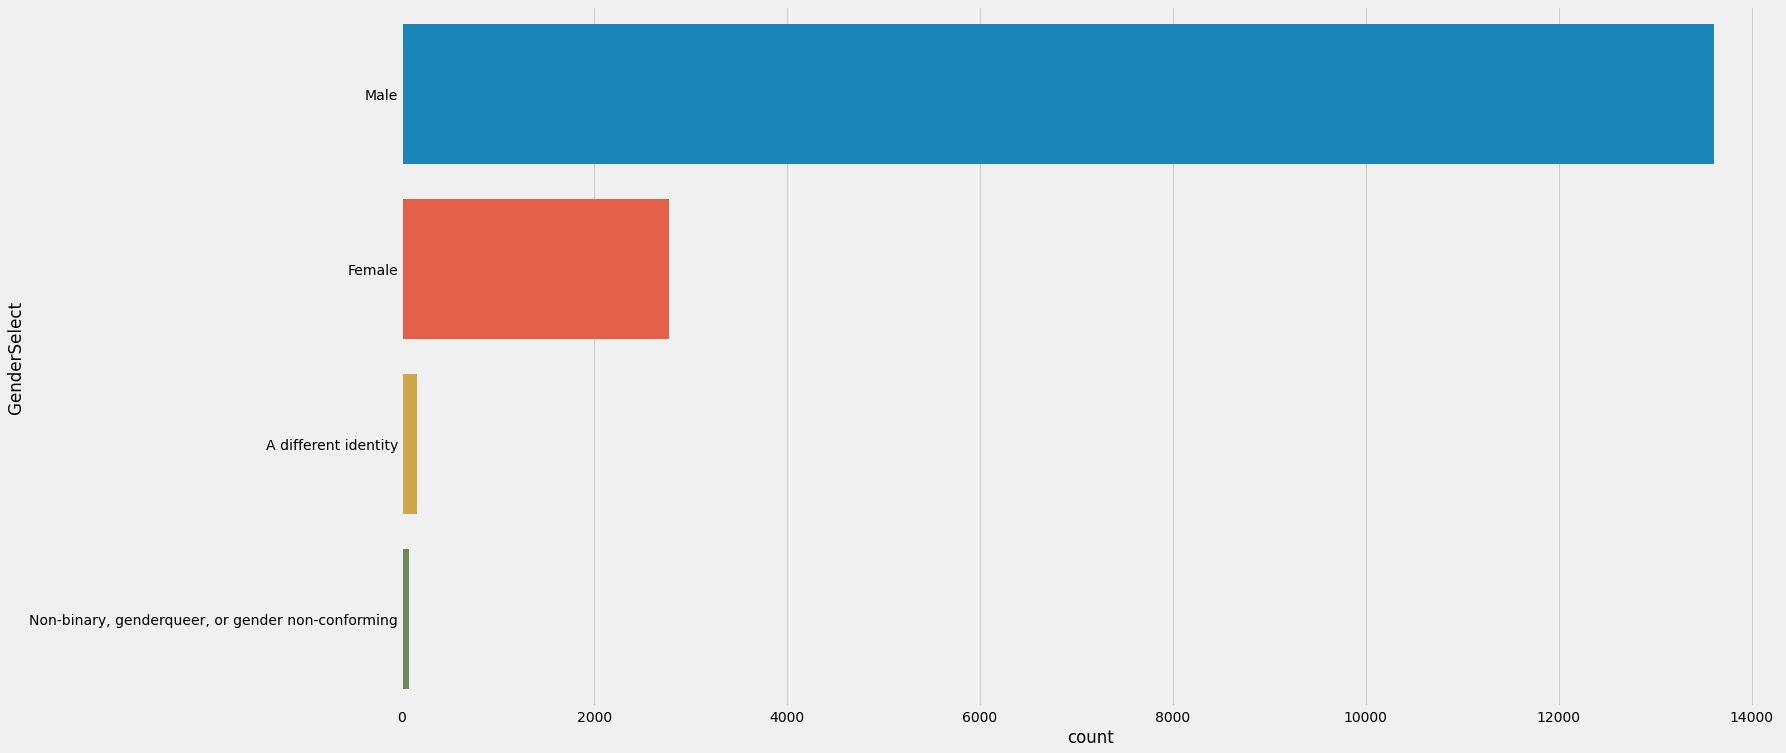

In [8]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
plt.show()

그래프는 여성에 비해 남성 응답자가 훨씬 더 많다는 것을 분명히 보여줍니다. 숙녀분들이 코딩하느라 바쁘셨거나 **여자분들이 코딩을 하지 않으셨거나**...:p. 농담이야.

## Respondents By Country

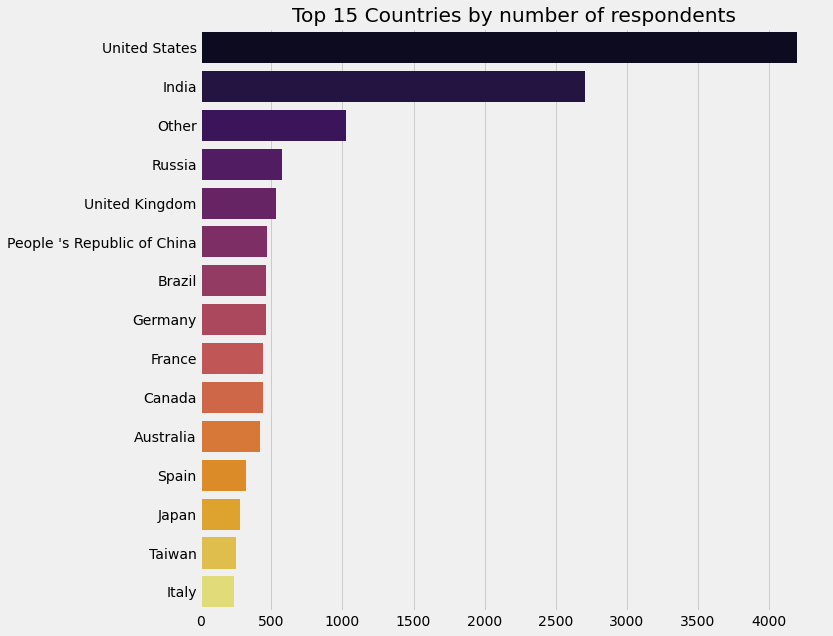

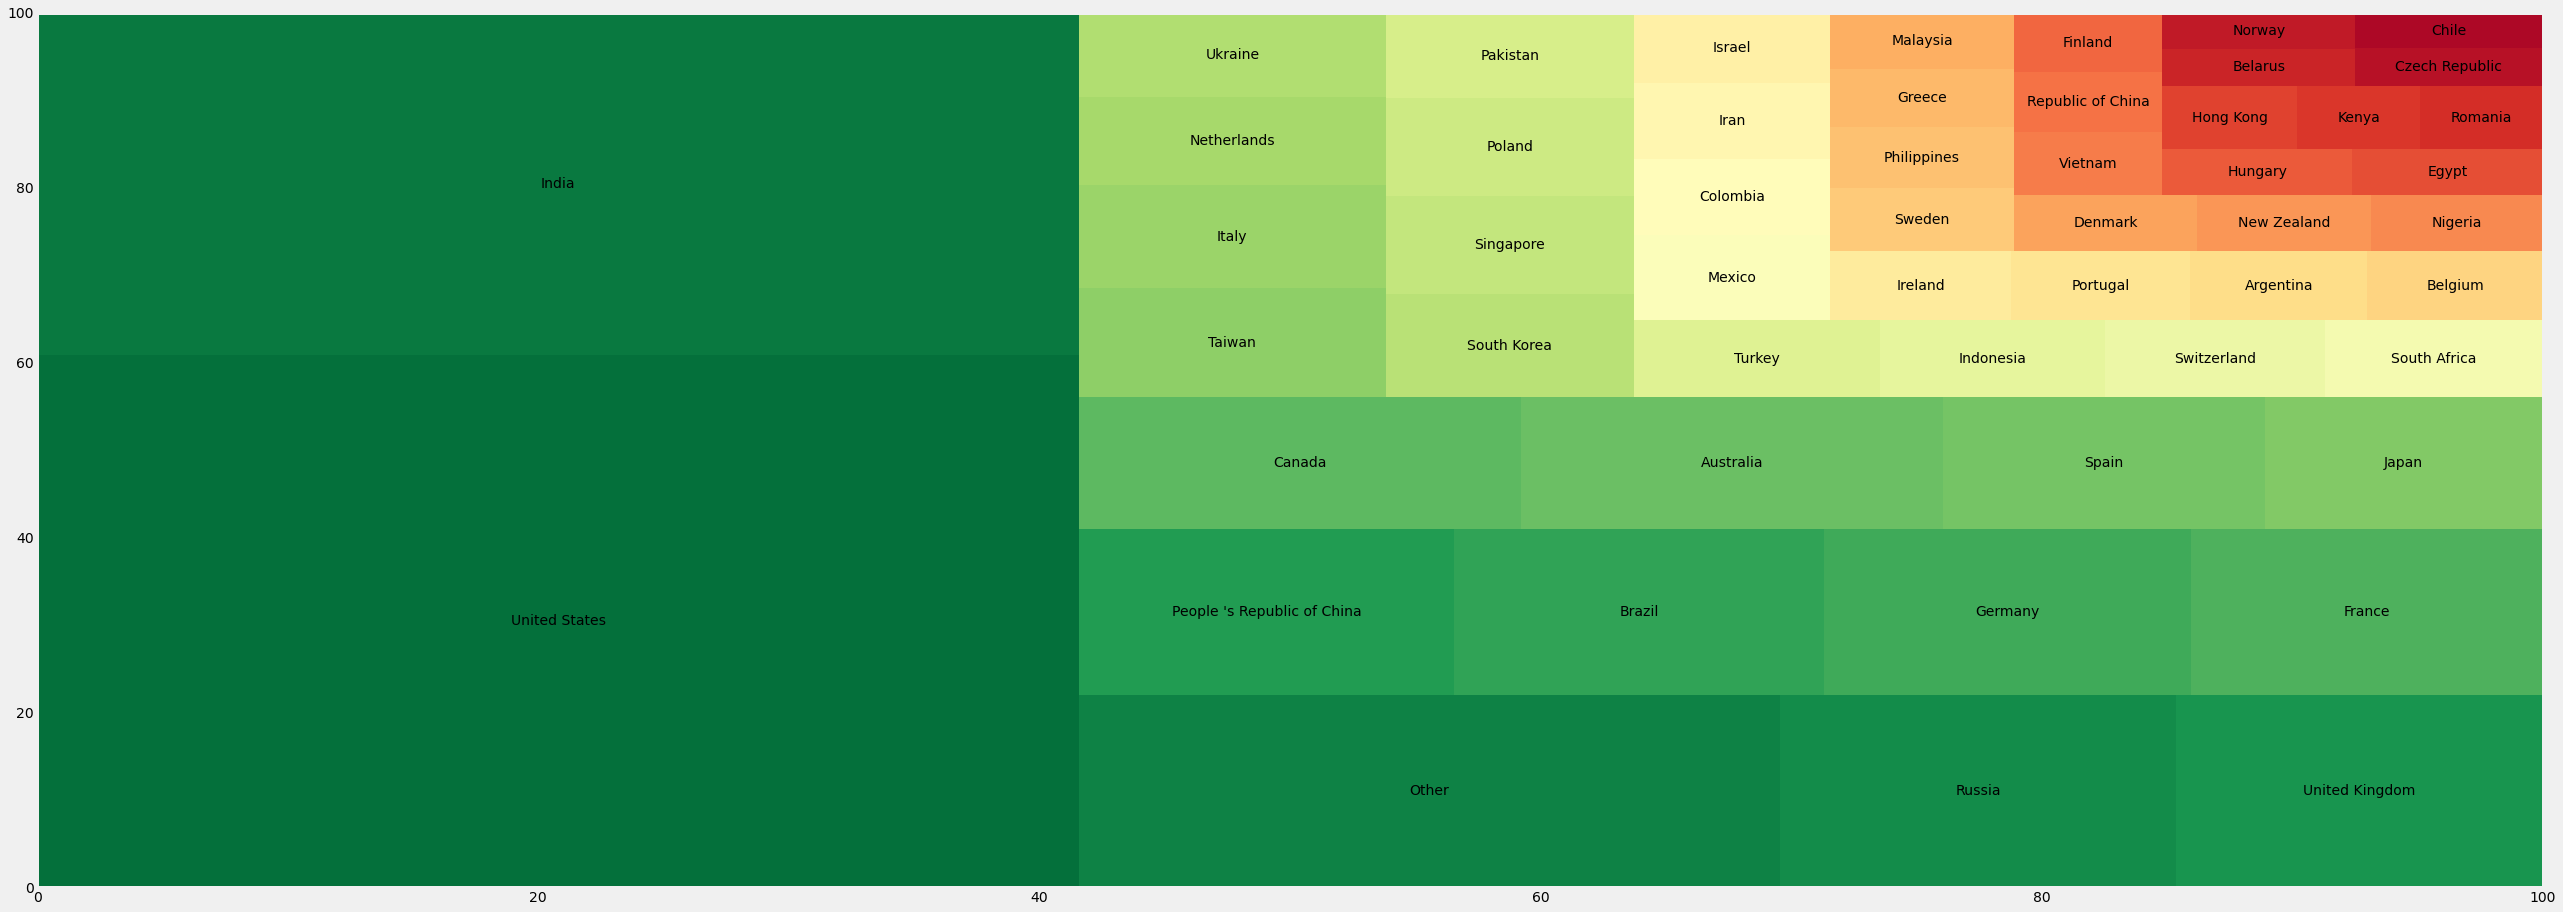

In [9]:
resp_coun=response['Country'].value_counts()[:15].to_frame()
sns.barplot(resp_coun['Country'],resp_coun.index,palette='inferno')
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()
tree=response['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values,label=tree.index,color=sns.color_palette('RdYlGn_r',52))
plt.rcParams.update({'font.size':20})
fig=plt.gcf()
fig.set_size_inches(40,15)
plt.show()

**미국 및 인도**는 전체 응답자의 약 1/3인 최대 응답자를 구성합니다. 마찬가지로 칠레는 응답자 수가 가장 적습니다. 이 그래프는 Kaggle 사용자의 대다수가 인도와 미국 출신이라고 말할 수 있을 만큼 충분한가요? Kaggle의 총 사용자는 100만 명이 넘고 응답자의 수는 16k에 불과하기 때문에 그렇게 생각하지 않습니다.

## Compensation

데이터 과학자는 가장 높은 급여를 받는 개인 중 하나입니다. 측량자들이 말하는 것을 확인하자..

In [10]:
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')
rates=pd.read_csv('conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)
salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


저 어마어마한 연봉을 보세요!! 이는 **많은 국가의 GDP보다 훨씬 큽니다**. 가짜 응답의 또 다른 예입니다. 최저 급여는 학생의 경우 일 수 있습니다. 중간 급여는 데이터 과학자가 좋은 급여 혜택을 누린다는 것을 보여줍니다.

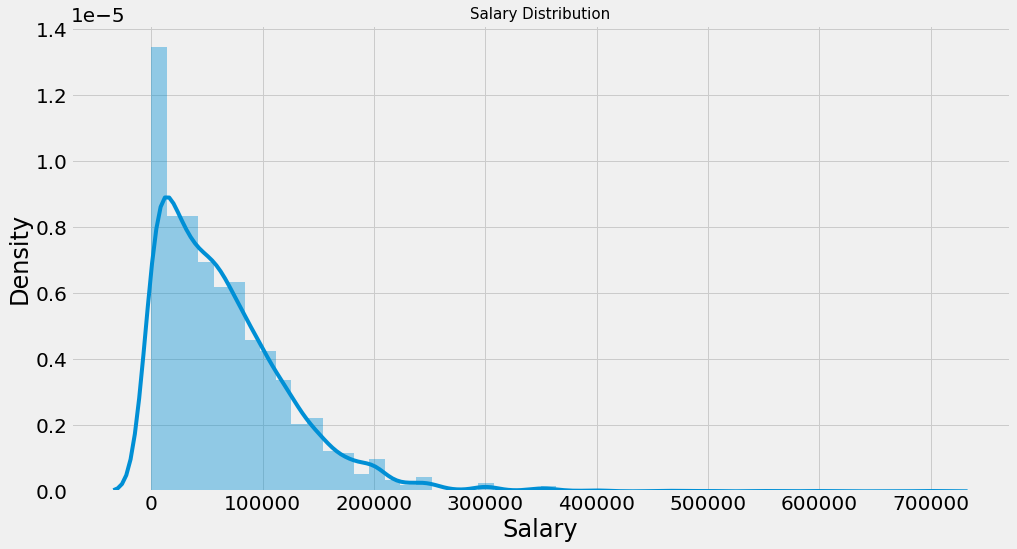

In [11]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution',size=15)
plt.show()

### Compensation by Country

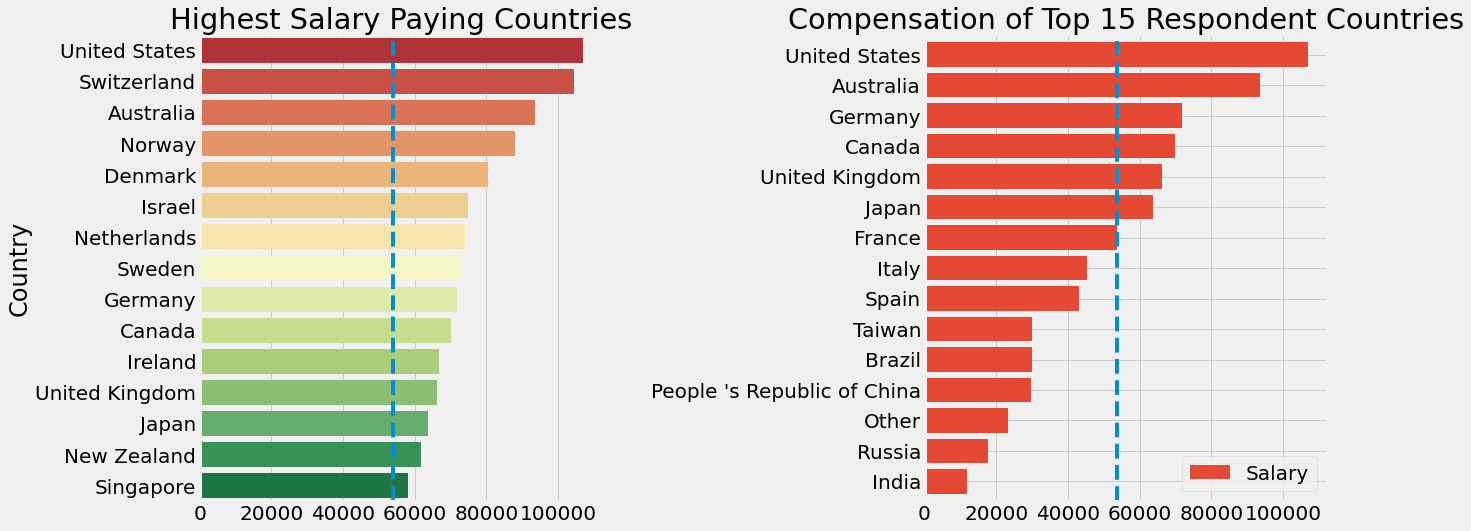

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sal_coun=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(salary['Salary'].median(),linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')
max_coun=salary.groupby('Country')['Salary'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(),linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

왼쪽 그래프는 상위 15개 중위 급여 지급 국가를 보여줍니다. 이 국가들이 전체 데이터 세트의 중간 급여보다 더 많은 급여를 제공하는 것을 보는 것이 좋습니다. 마찬가지로 오른쪽 그래프는 응답자별 상위 15개 국가의 중간 급여를 보여줍니다. 가장 충격적인 그래프는 **인도**에 대한 것입니다. 인도는 두 번째로 높은 응답자를 보유하고 있지만 여전히 그래프에서 중간 급여가 가장 낮습니다. 미국의 개인은 인도의 개인보다 급여가 거의 10배나 많습니다. 이유는 무엇입니까?? 인도의 IT 전문가는 정말 저임금을 받고 있습니까? 나중에 확인하도록 하겠습니다.

### Salary By Gender

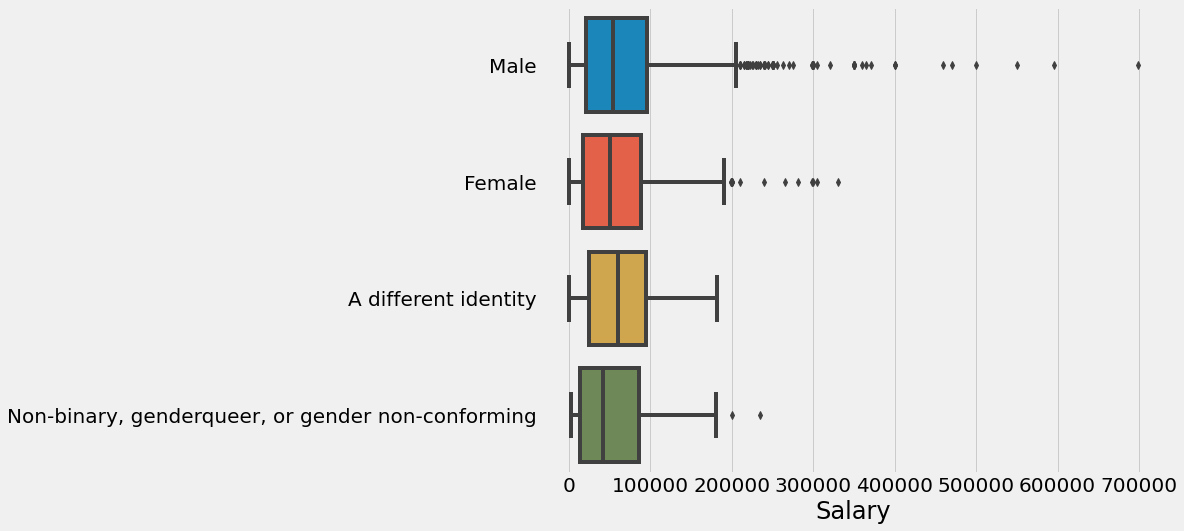

In [13]:
plt.subplots(figsize=(10,8))
sns.boxplot(y='GenderSelect',x='Salary',data=salary)
plt.ylabel('')
plt.show()

남성의 급여는 다른 사람들에 비해 높아 보입니다.

## Age

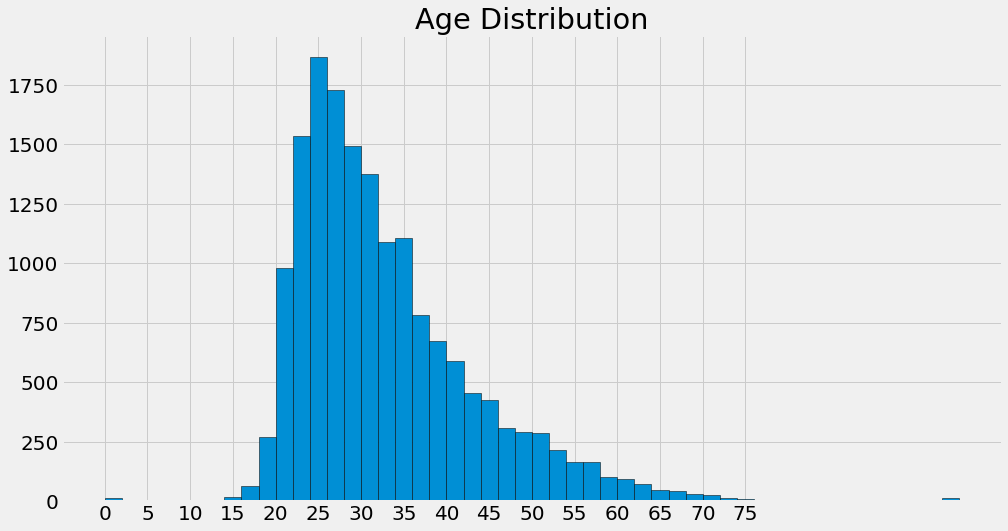

In [14]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50,edgecolor='black')
plt.xticks(list(range(0,80,5)))
plt.title('Age Distribution')
plt.show() 

응답자는 25-35세인 경우 대부분의 연령대가 젊은 사람들입니다.

## Profession & Major

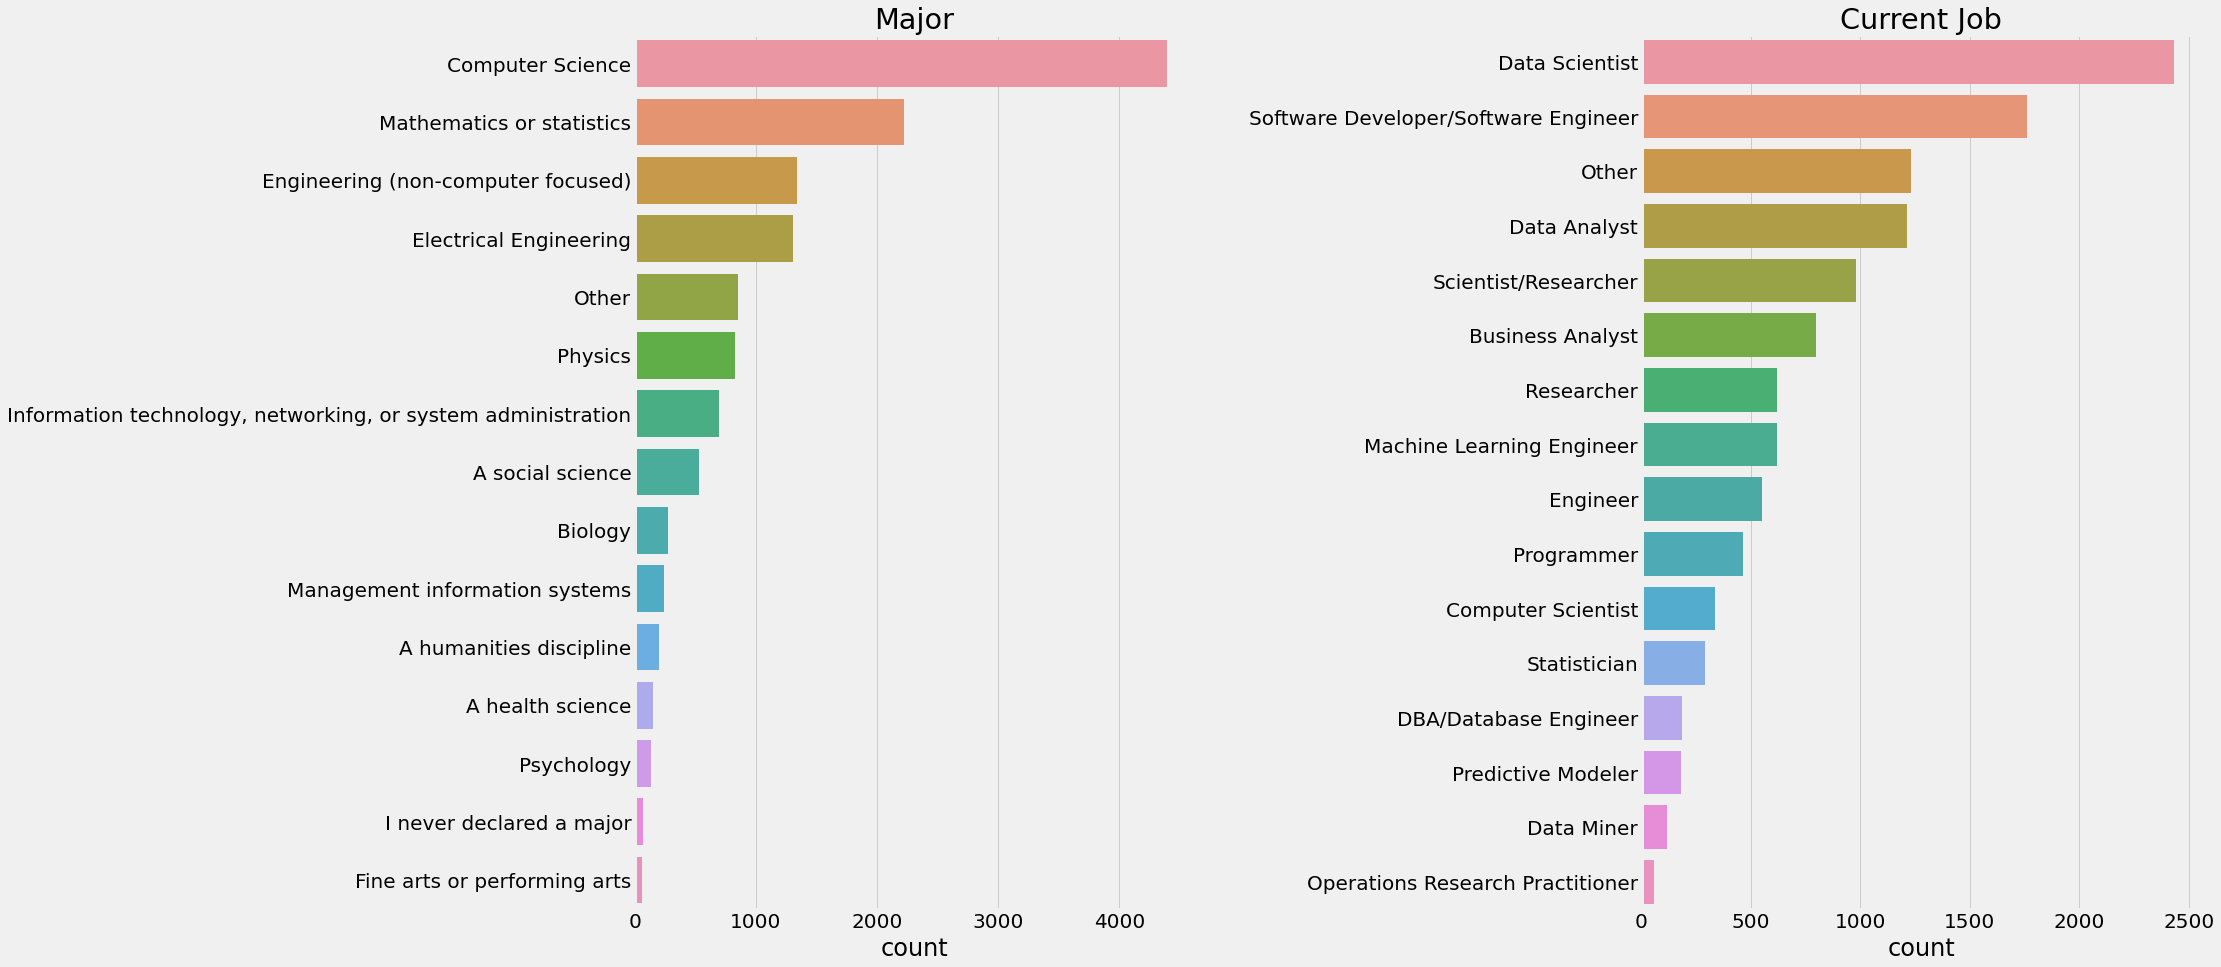

In [15]:
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.countplot(y=response['MajorSelect'],ax=ax[0],order=response['MajorSelect'].value_counts().index)
ax[0].set_title('Major')
ax[0].set_ylabel('')
sns.countplot(y=response['CurrentJobTitleSelect'],ax=ax[1],order=response['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

25세부터 35세까지 나이가 많은 시대의 데이터 과학과 기계 학습은 거의 모든 산업 분야에서 사용되고 있습니다. 이것은 물리학, 생물학 등과 같은 다양한 관심 분야의 사람들이 데이터를 더 잘 이해하기 위해 채택하고 있기 때문에 왼쪽 그래프에서 분명합니다. 오른쪽 그래프는 응답자의 현재 직업을 보여줍니다. 응답자의 대부분은 Dats 과학자입니다. 하지만 설문조사 데이터이기 때문에 모호한 응답이 많을 수 있음을 알고 있습니다. 나중에 우리는 이 응답자가 실제 데이터 과학자인지 또는 스스로 선언한 데이터 과학자인지 확인할 것입니다.

## Compensation By Job Title

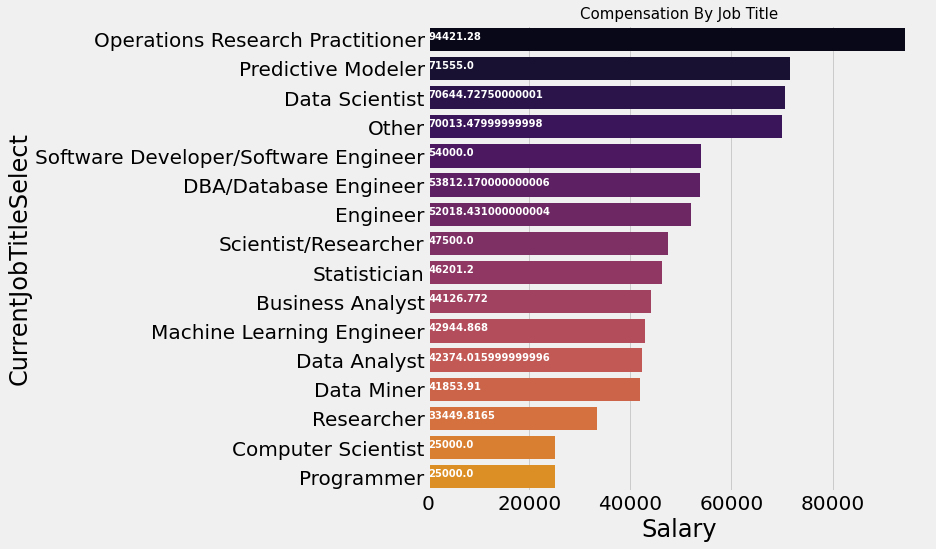

In [16]:
sal_job=salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary',ascending=False)
ax=sns.barplot(sal_job.Salary,sal_job.index,palette=sns.color_palette('inferno',20))
plt.title('Compensation By Job Title',size=15)
for i, v in enumerate(sal_job.Salary): 
    ax.text(.5, i, v,fontsize=10,color='white',weight='bold')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Operations Research Practitioner는 예측 모델러 및 데이터 과학자 다음으로 가장 높은 중간 급여를 받았습니다. 컴퓨터 과학자와 프로그래머는 가장 낮은 보상을 받습니다.

## Machine Learning

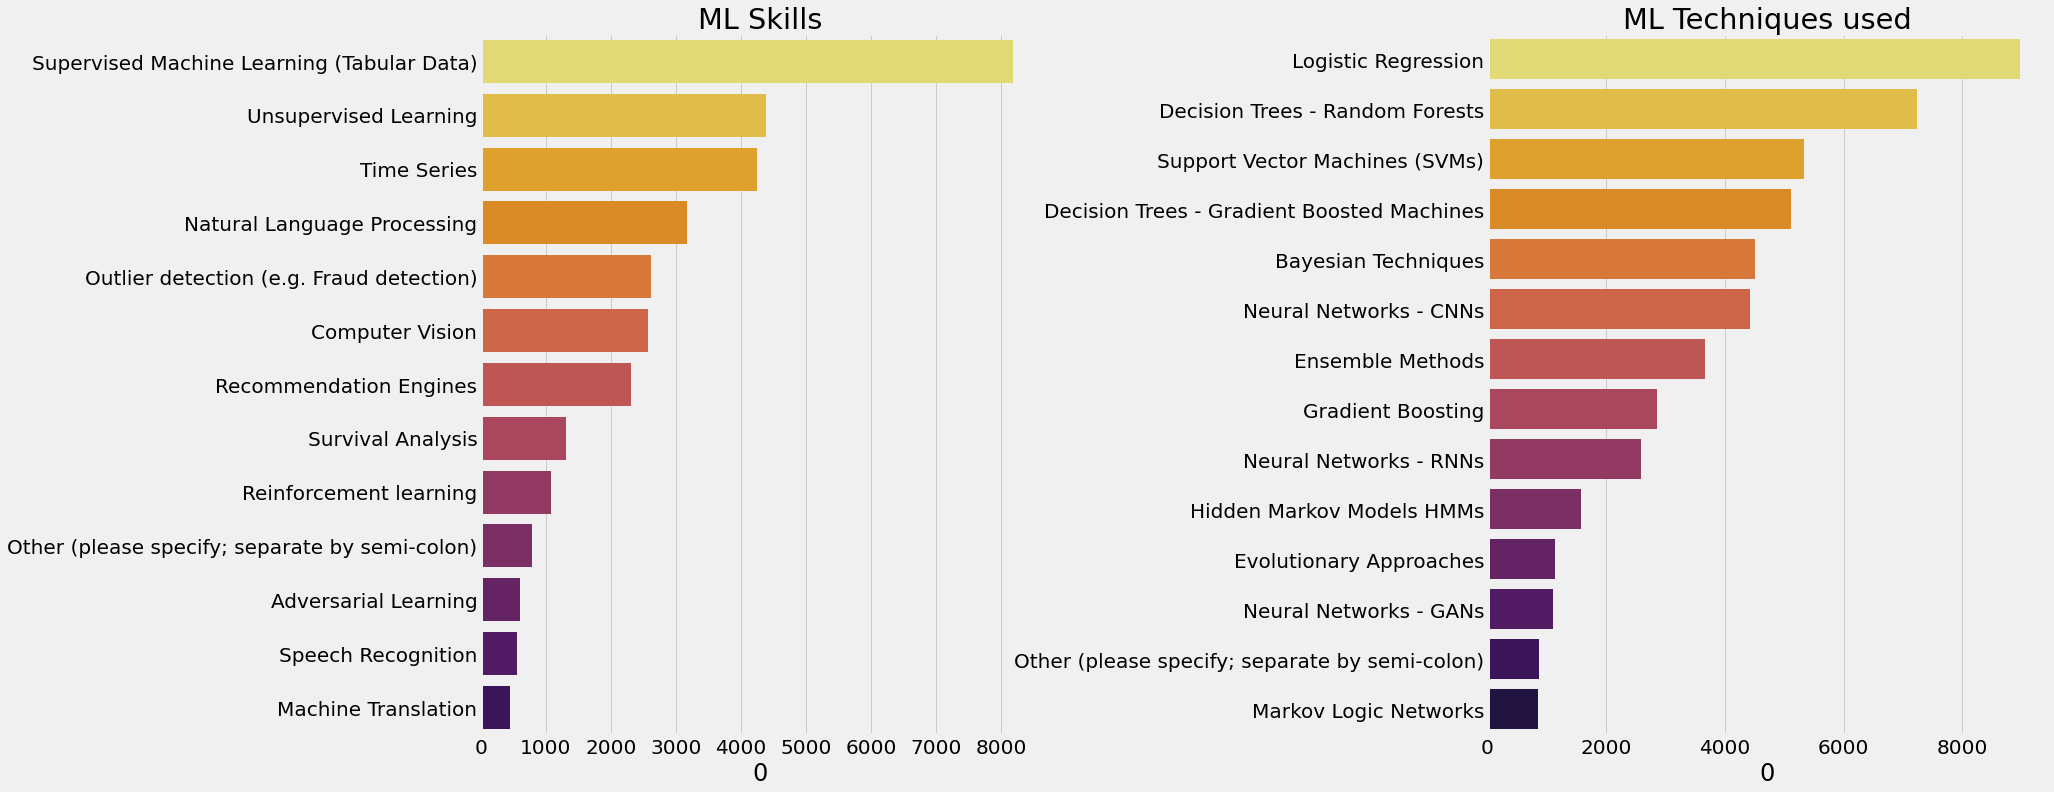

In [17]:
f,ax=plt.subplots(1,2,figsize=(25,12))
skills=response['MLSkillsSelect'].str.split(',')
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
plt1=pd.Series(skills_set).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[0],palette=sns.color_palette('inferno_r',15))
ax[0].set_title('ML Skills')
tech=response['MLTechniquesSelect'].str.split(',')
techniques=[]
for i in tech.dropna():
    techniques.extend(i)
plt1=pd.Series(techniques).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))
ax[1].set_title('ML Techniques used')
plt.subplots_adjust(wspace=0.8)
plt.show()

대부분의 응답자가 지도 학습으로 작업하고 있으며 로지스틱 회귀가 가장 선호되는 것이 분명합니다. 모든 분류 영역에 가장 적합한 알고리즘은 없습니다. 특정 도메인에 대해 하나의 알고리즘을 선택하는 방법은 훈련 데이터에 대한 교차 검증을 사용하는 것입니다.

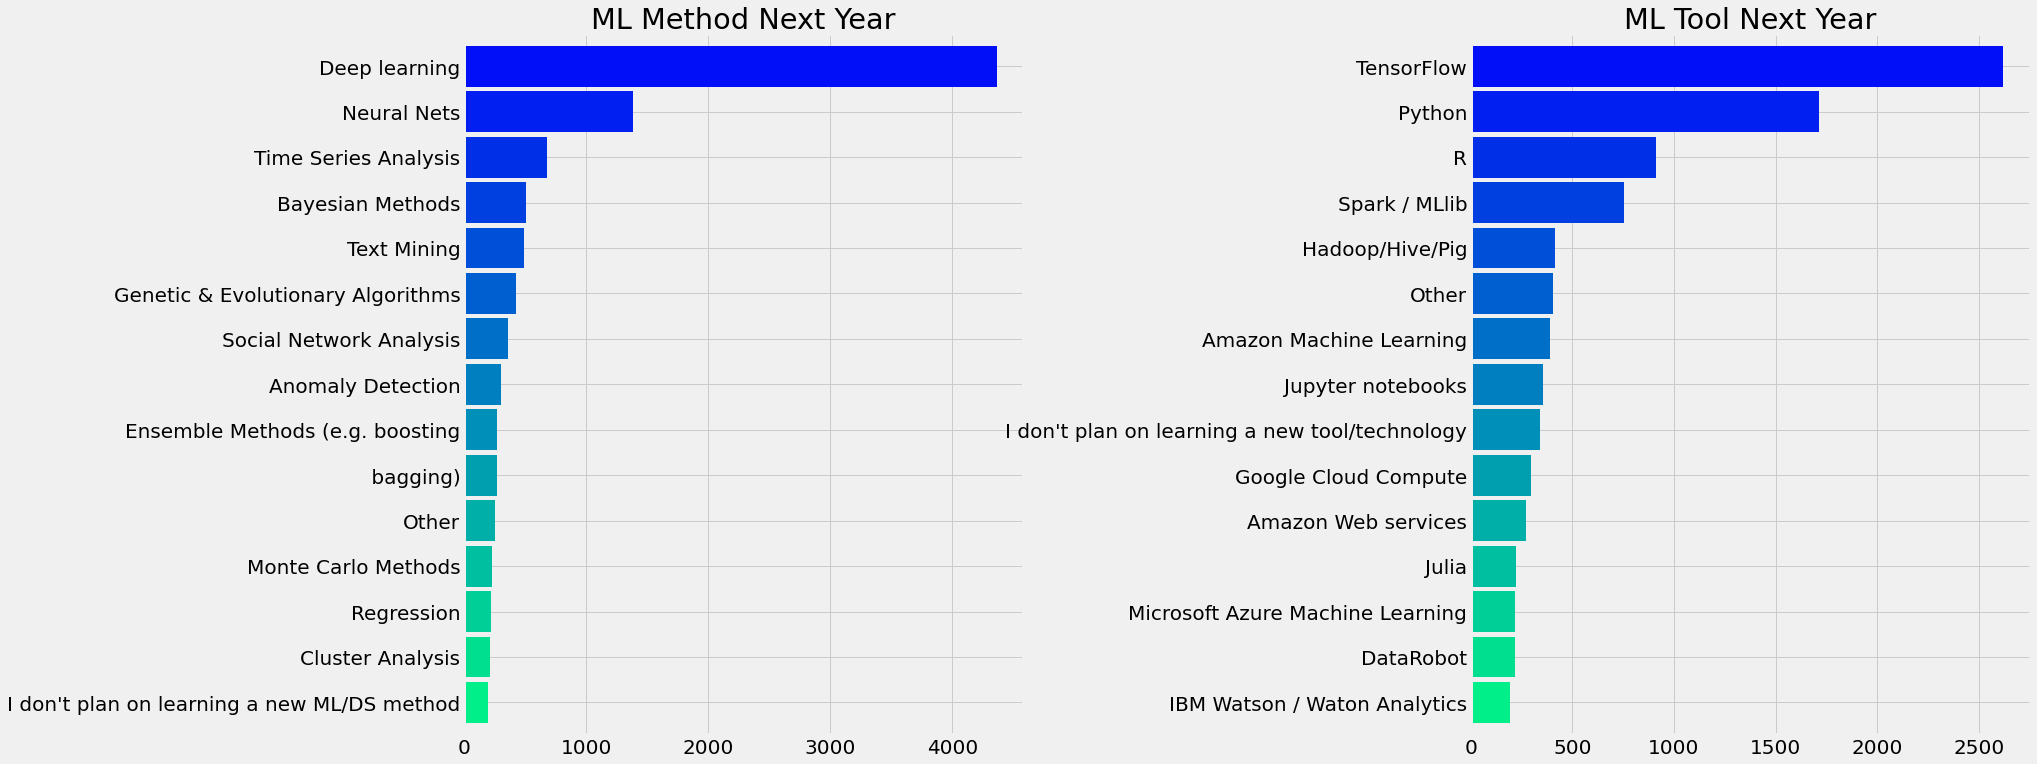

In [18]:
f,ax=plt.subplots(1,2,figsize=(25,12))
ml_nxt=response['MLMethodNextYearSelect'].str.split(',')
nxt_year=[]
for i in ml_nxt.dropna():
    nxt_year.extend(i)
pd.Series(nxt_year).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[0])
tool=response['MLToolNextYearSelect'].str.split(',')
tool_nxt=[]
for i in tool.dropna():
    tool_nxt.extend(i)
pd.Series(tool_nxt).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[1])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('ML Method Next Year')
ax[1].set_title('ML Tool Next Year')
plt.show()

내년에는 **딥 러닝** 실무자가 급증할 것이 분명합니다. 딥 러닝과 신경망, 줄여서 AI는 내년에 가장 인기 있는 주제입니다. 또한 도구 측면에서 Python은 R보다 더 선호됩니다. Spark 및 Hadoop과 같은 빅 데이터 도구도 향후 몇 년 동안 좋은 점유율을 차지할 것입니다.

## Best Platforms to Learn

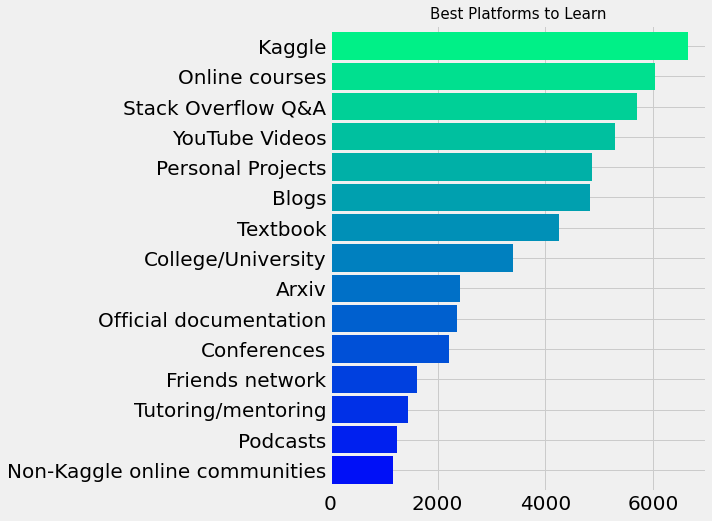

In [19]:
plt.subplots(figsize=(6,8))
learn=response['LearningPlatformSelect'].str.split(',')
platform=[]
for i in learn.dropna():
    platform.extend(i)
pd.Series(platform).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter',15))
plt.title('Best Platforms to Learn',size=15)
plt.show()

개인적으로 가장 좋아하는 Kaggle은 경험이 풍부한 데이터 과학자의 노트북이 있기 때문에 데이터 과학 학습을 위해 가장 많이 찾는 소스입니다. 다음 선택은 온라인 과정, 즉 MOOC입니다. Coursera, udacity와 같은 플랫폼은 학습을 위한 대화형 비디오 및 연습 문제를 제공합니다. 유사하게 Siraj Raval 및 기타와 같은 Youtube 채널은 무료로 학습할 수 있는 매체를 제공합니다. 이 모든 매체는 교과서보다 높습니다. 그 이유는 교과서의 내용이 제한적이거나 사람들이 동영상을 보고 배우는 것을 더 좋아하기 때문일 수 있습니다.

## Hardware Used

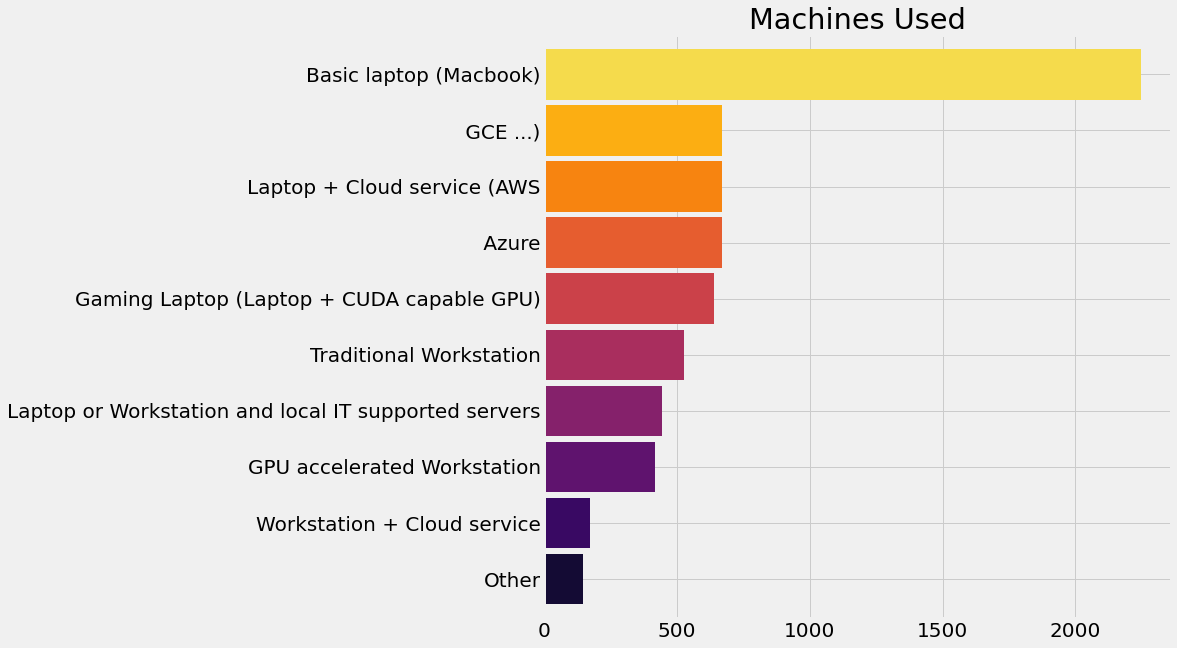

In [20]:
plt.subplots(figsize=(10,10))
hard=response['HardwarePersonalProjectsSelect'].str.split(',')
hardware=[]
for i in hard.dropna():
    hardware.extend(i)
pd.Series(hardware).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',10))
plt.title('Machines Used')
plt.show()

응답자의 대다수가 25세 미만의 연령대(학생의 대다수가 해당)에 속하므로 기본 노트북이 가장 일반적으로 사용되는 업무용 기기입니다.

## Where Do I get Datasets From??

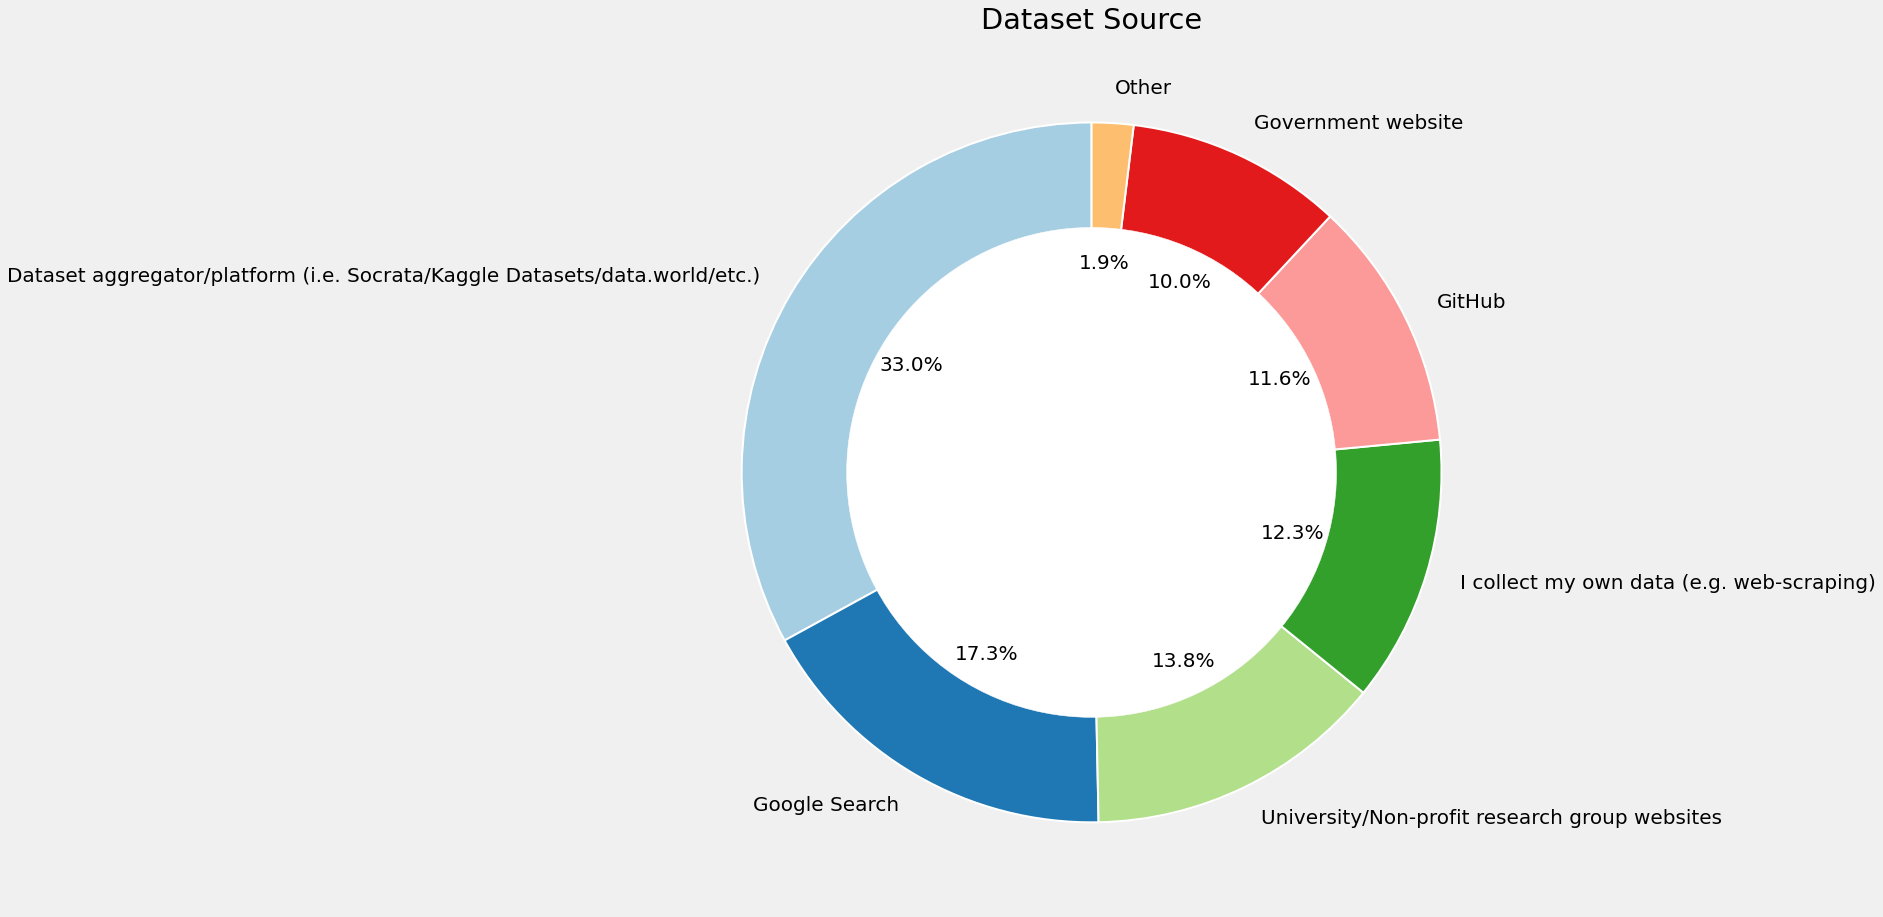

In [21]:
plt.subplots(figsize=(15,15))
data=response['PublicDatasetsSelect'].str.split(',')
dataset=[]
for i in data.dropna():
    dataset.extend(i)
pd.Series(dataset).value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette('Paired',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title('Dataset Source')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

수백 개의 데이터 세트를 사용할 수 있는 Kaggle은 데이터 세트에 대해 가장 많이 찾는 소스입니다.

## Code Sharing

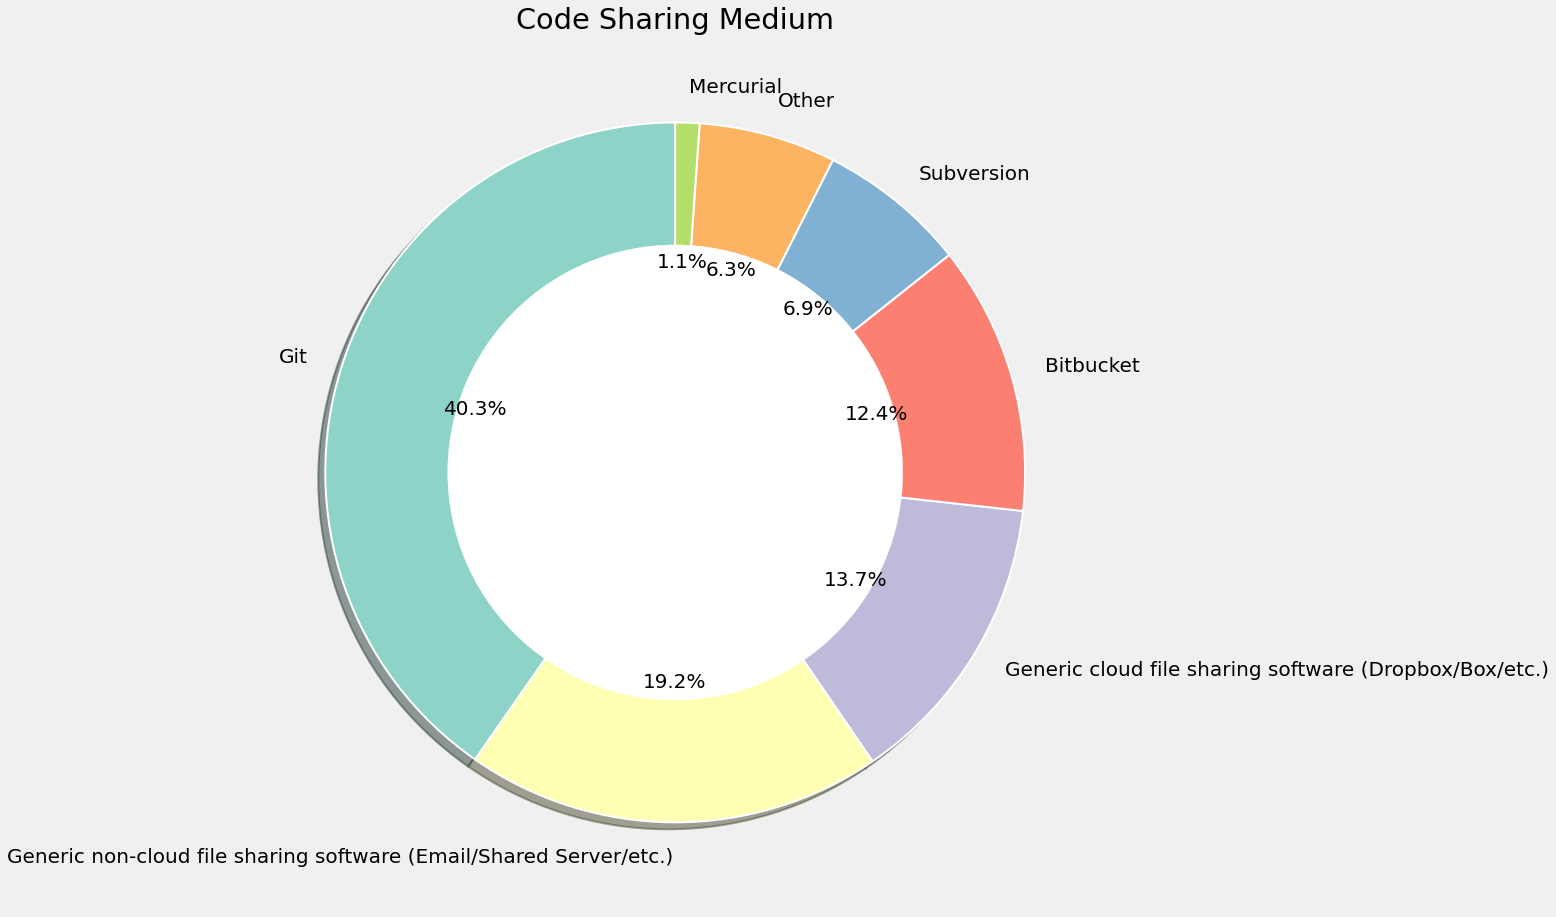

In [22]:
plt.subplots(figsize=(15,15))
code=response['WorkCodeSharing'].str.split(',')
code_share=[]
for i in code.dropna():
    code_share.extend(i)
pd.Series(code_share).value_counts().plot.pie(autopct='%1.1f%%',shadow=True,colors=sns.color_palette('Set3',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title('Code Sharing Medium')
my_circle=plt.Circle( (0,0), 0.65, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

Github은 코드 및 프로젝트 공유에 가장 많이 사용되는 플랫폼입니다. github 사용의 장점은 다음과 같습니다.

1) 프로젝트의 버전을 관리합니다.

2) GitHub에서 다른 사람의 프로젝트를 탐색하고 영감을 받은 코드를 더 많이 얻거나 프로젝트에 기여합니다.

3) 다른 사람들이 귀하의 프로젝트에 기여하게 하거나 귀하가 다른 사람의 프로젝트에 기여하도록 하여 다른 사람들과 협업합니다.



## Challenges in Data Science

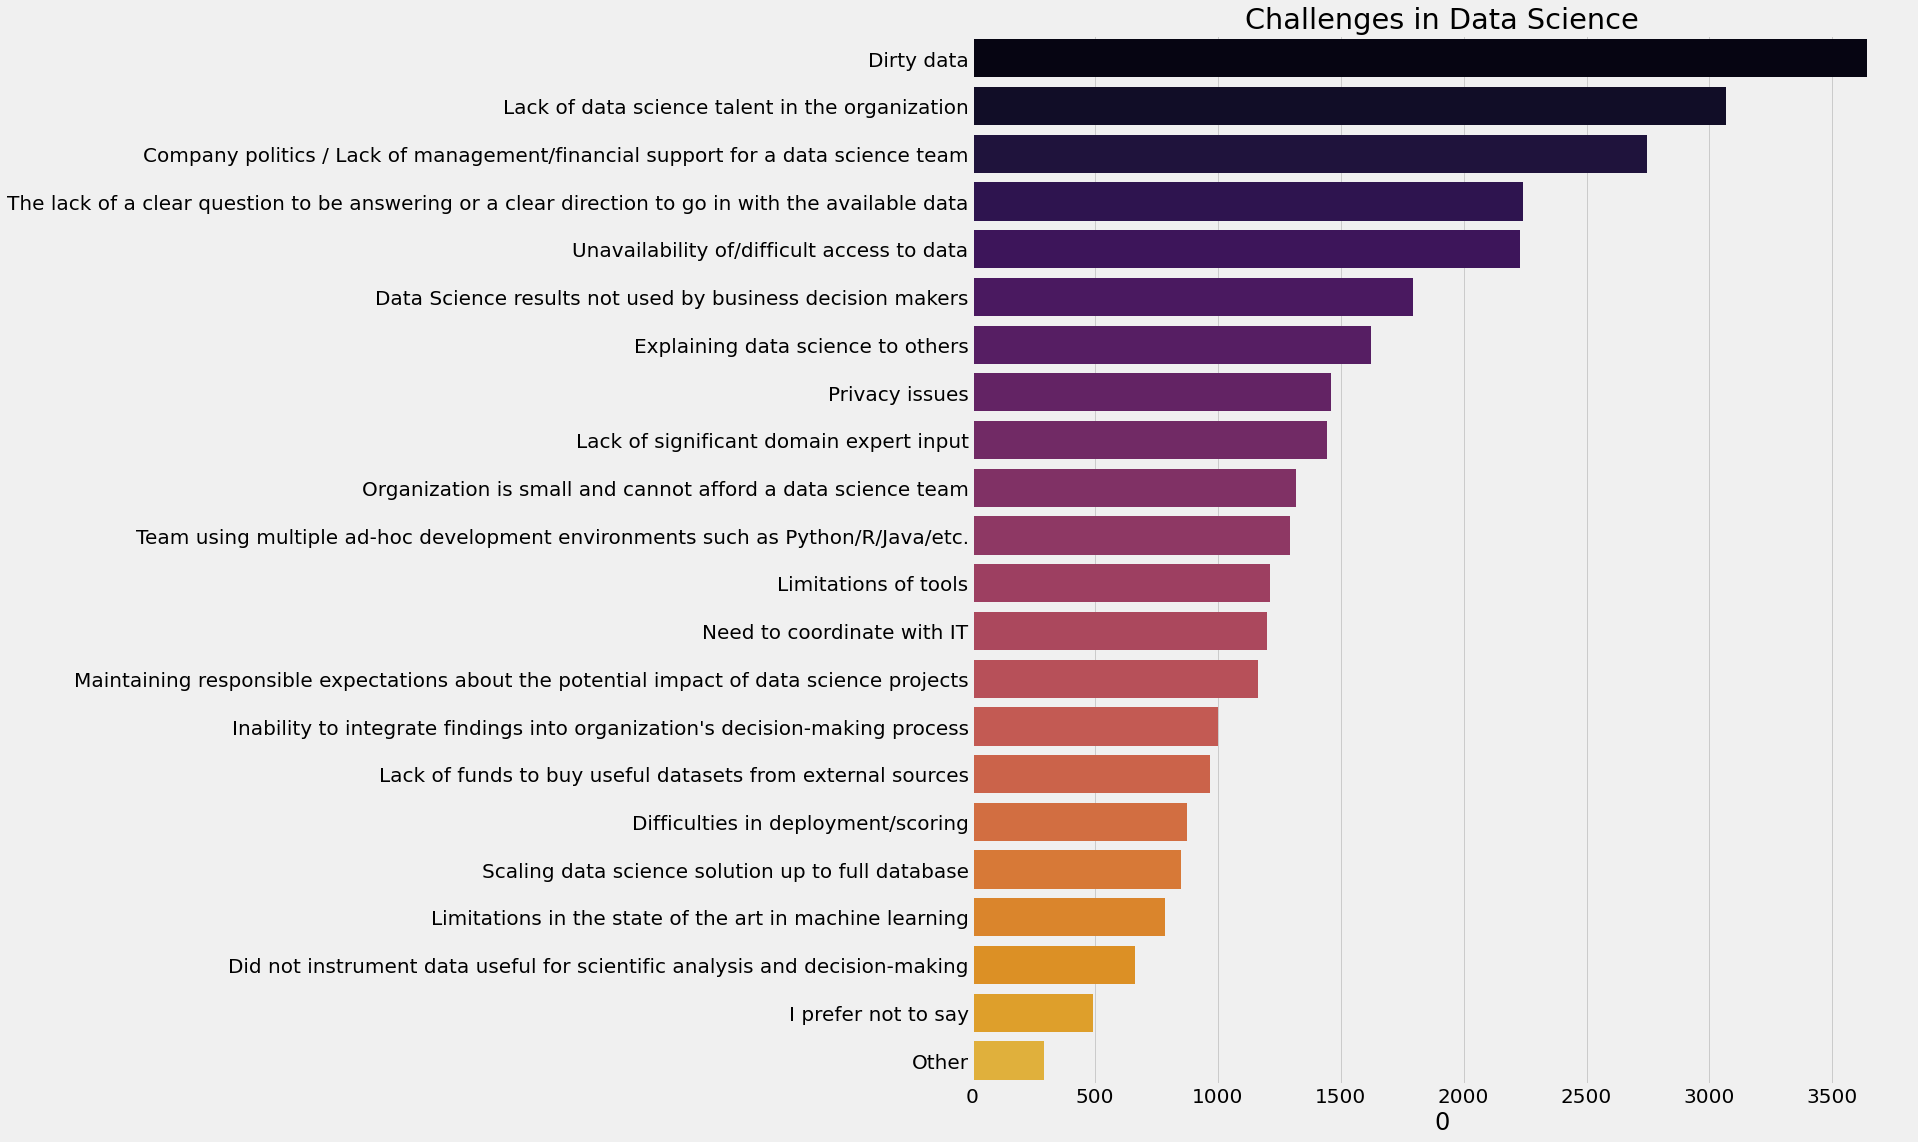

In [23]:
plt.subplots(figsize=(15,18))
challenge=response['WorkChallengesSelect'].str.split(',')
challenges=[]
for i in challenge.dropna():
    challenges.extend(i)
plt1=pd.Series(challenges).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,palette=sns.color_palette('inferno',25))
plt.title('Challenges in Data Science')
plt.show()

데이터 과학의 주요 과제는 **적절한 데이터를 얻는 것**입니다. 그래프는 더티 데이터가 가장 큰 문제임을 분명히 보여줍니다. 이제 더티 데이터는 무엇입니까?? 더티 데이터는 오류가 포함된 데이터베이스 레코드입니다. 더티 데이터는 중복 레코드, 불완전하거나 오래된 데이터, 이종 시스템의 레코드 필드에 대한 부적절한 구문 분석을 비롯한 여러 요인으로 인해 발생할 수 있습니다. 다행히 Kaggle 데이터 세트는 매우 깨끗하고 표준화되어 있습니다.

다른 주요 과제로는 **데이터 과학 및 머신 러닝 인재 부족, 데이터 확보 어려움, 도구 부족**이 있습니다. 데이터 사이언스가 21세기 가장 섹시한 직업인 이유입니다. 데이터의 양이 증가함에 따라 이 수요는 크게 증가할 것입니다.

## Job Satisfaction

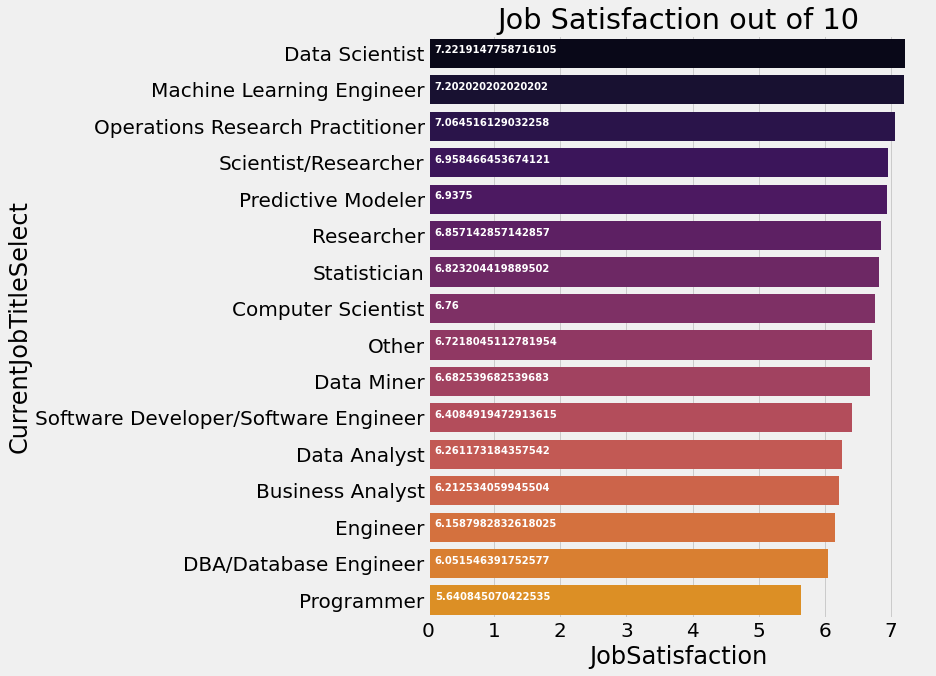

In [24]:
satisfy=response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'],inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
ax=sns.barplot(y=satisfy_job.index,x=satisfy_job.JobSatisfaction,palette=sns.color_palette('inferno',20))
fig=plt.gcf()
fig.set_size_inches(8,10)
for i, v in enumerate(satisfy_job.JobSatisfaction): 
    ax.text(.1, i, v,fontsize=10,color='white',weight='bold')
plt.title('Job Satisfaction out of 10')
plt.show()

데이터 과학자와 기계 학습 엔지니어는 가장 만족스러운 사람들(많은 돈에 만족하지 않을 것)인 반면 프로그래머는 가장 낮은 직업 만족도를 가지고 있습니다. 그러나 여기서 주의할 점은 컴퓨터 과학자가 프로그래머보다 급여가 낮더라도 프로그래머보다 직업 만족도가 높다는 것입니다. 따라서 급여는 유일한 기준이나 직업 만족도가 아닙니다.

## Job Satisfication By Country

In [25]:
satisfy=response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'],inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['Country'])['JobSatisfaction'].mean().sort_values(ascending=True).to_frame()
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = 'Viridis',
        reversescale = True,
        showscale = True,
        locations = satisfy_job.index,
        z = satisfy_job['JobSatisfaction'],
        locationmode = 'country names',
        text = satisfy_job['JobSatisfaction'],
        marker = dict(
            line = dict(color = 'rgb(200,200,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Satisfaction')
            )
       ]

layout = dict(
    title = 'Job Satisfaction By Country',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(0,0,255)',
        projection = dict(
        type = 'chloropleth',
            
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2010')

평균 직업 만족도 수준은 대부분의 국가에서 **6-7.5**입니다. 일본(약 14시간 근무)과 중국이 낮습니다. 스웨덴과 멕시코와 같은 국가에서 더 높습니다.





# Python vs R or (Batman vs Superman)

Python과 R은 데이터 과학 및 머신 러닝 분야에서 가장 널리 사용되는 오픈 소스 언어입니다. 신진 데이터 과학자나 분석가에게 가장 크고 가장 어려운 질문은 **어떤 언어로 시작해야 하나요??** 두 언어 모두 장단점이 있지만 개인의 목적에 따라 언어를 선택하는 것입니다. /그녀의 선택. 두 언어 모두 다양한 종류의 작업 요구 사항을 충족합니다. Python은 범용 언어이므로 웹 및 애플리케이션 통합이 더 쉬운 반면 R은 순수한 통계 및 분석 목적을 의미합니다. R이 Python을 완전히 능가할 영역은 **ggplot2 및 shiny**와 같은 패키지의 도움으로 시각화하는 것입니다. 그러나 Python은 기계 학습 분야에서 우위를 점하고 있습니다. 그럼 조사님들이 하는 말을 보자..

In [26]:
resp=response.dropna(subset=['WorkToolsSelect'])
resp=resp.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
python=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(~resp['WorkToolsSelect'].str.contains('R'))]
R=resp[(~resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
both=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]

### Recommended Language For Begineers

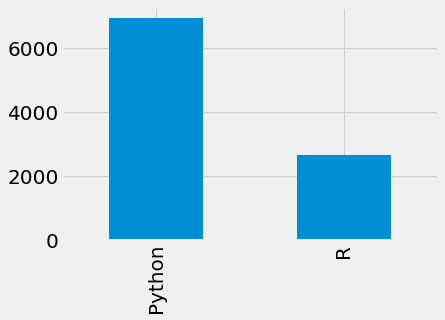

In [27]:
response['LanguageRecommendationSelect'].value_counts()[:2].plot.bar()
plt.show()

분명히 Python은 초보자에게 권장되는 언어입니다. 그 이유는 간단한 영어와 유사한 구문과 범용 기능 때문일 수 있습니다.

## Recommendation By Python and R users

In [30]:
labels1=python['LanguageRecommendationSelect'].value_counts()[:5].index
sizes1=python['LanguageRecommendationSelect'].value_counts()[:5].values

labels2=R['LanguageRecommendationSelect'].value_counts()[:5].index
sizes2=R['LanguageRecommendationSelect'].value_counts()[:5].values


fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, .48]},
      "name": "Language",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": sizes2 ,
      "labels": labels2,
    #   "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Language",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Language Recommended By Python and R users",
        "annotations": [
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "Python",
                "x": 0.17,
                "y": 0.5
            },
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "R",
                "x": 0.79,
                "y": 0.5}]}}
py.iplot(fig, filename='donut')

이것은 흥미로운 발견입니다. 약 **91.6%** Python 사용자는 초보자를 위한 첫 번째 언어로 Python을 권장하지만 **67.2%** R 사용자만 R을 첫 번째 언어로 권장합니다. 또한 **20.6%** R 사용자는 Python을 권장하지만 **1.68%** Python 사용자만 R을 첫 번째 언어로 추천합니다. 한 가지 주의할 점은 두 사용자 모두 동일한 언어(예: SQL, Matlab 및 C/C++)를 권장한다는 것입니다. 추천 언어 상위 5개만 고려했으므로 모두 고려하면 비율이 변경됩니다. 하지만 그 차이는 2~3%에 불과합니다.

### Necessary or Not??

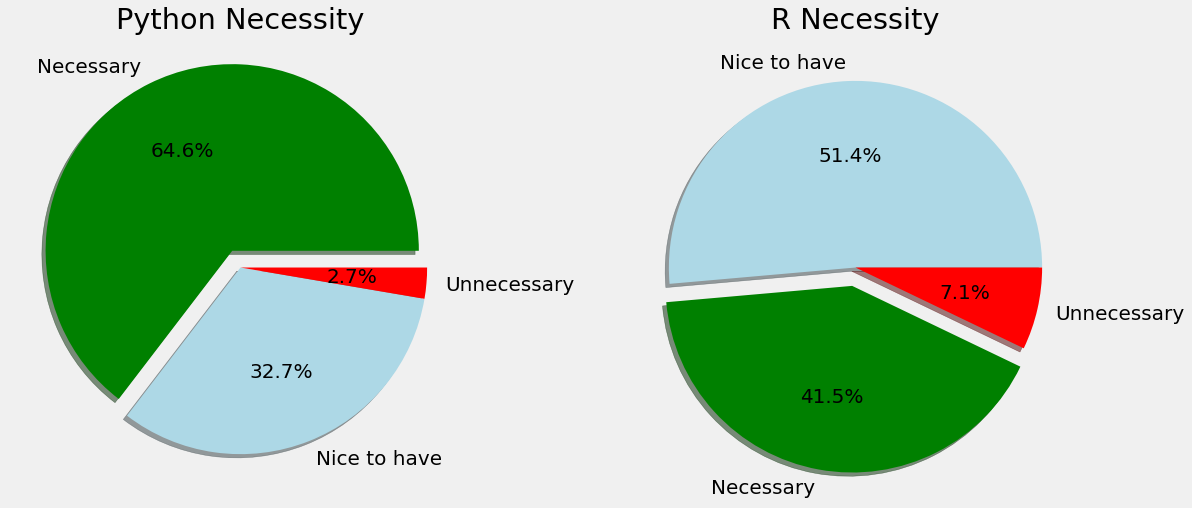

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,8))
response['JobSkillImportancePython'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',explode=[0.1,0,0],shadow=True,colors=['g','lightblue','r'])
ax[0].set_title('Python Necessity')
ax[0].set_ylabel('')
response['JobSkillImportanceR'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0,0.1,0],shadow=True,colors=['lightblue','g','r'])
ax[1].set_title('R Necessity')
ax[1].set_ylabel('')
plt.show()

분명히 Python은 R에 비해 훨씬 더 필요한 기술입니다.

색 구성표에 도움을 주신 [Steve Broll](https://www.kaggle.com/stevebroll)에게 특별한 감사를 드립니다.

### Number Of Users By Language

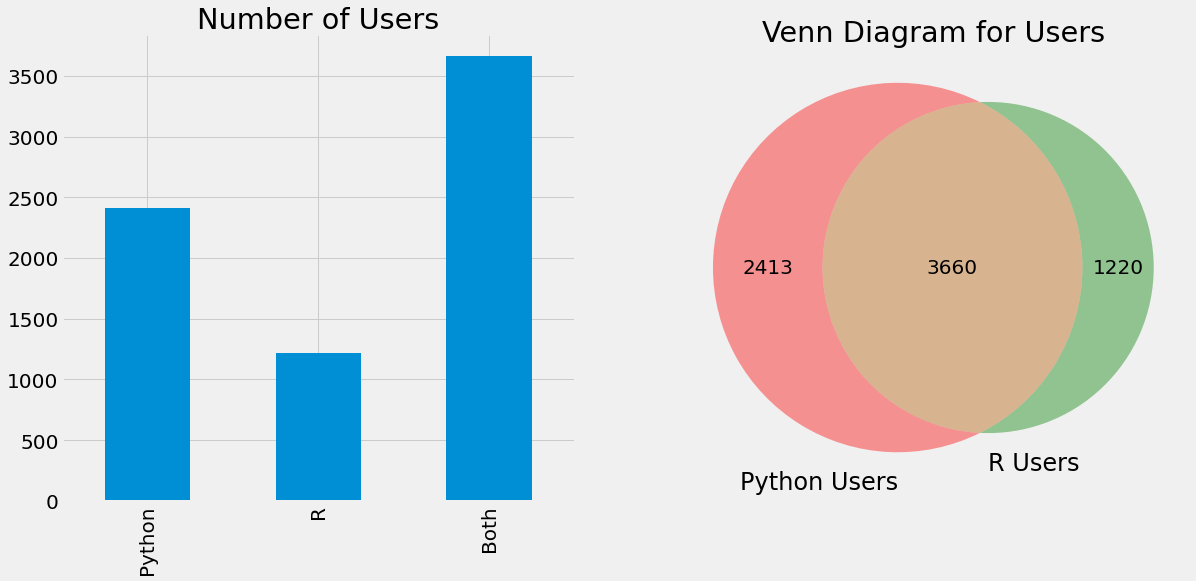

In [32]:
f,ax=plt.subplots(1,2,figsize=(18,8))
pd.Series([python.shape[0],R.shape[0],both.shape[0]],index=['Python','R','Both']).plot.bar(ax=ax[0])
ax[0].set_title('Number of Users')
venn2(subsets = (python.shape[0],R.shape[0],both.shape[0]), set_labels = ('Python Users', 'R Users'))
plt.title('Venn Diagram for Users')
plt.show()

Python 사용자의 수는 확실히 R 사용자보다 많습니다. 이것은 Python의 쉬운 학습 곡선 때문일 수 있습니다. 그러나 두 언어를 모두 알고 있는 사용자가 더 많습니다. 이러한 응답은 여러 언어와 도구에 대한 지식을 가지고 있는 경향이 있기 때문에 기존 데이터 과학자의 것일 수 있습니다.

## Compensation

In [33]:
py_sal=(pd.to_numeric(python['CompensationAmount'].dropna())*python['exchangeRate']).dropna()
py_sal=py_sal[py_sal<1000000]
R_sal=(pd.to_numeric(R['CompensationAmount'].dropna())*R['exchangeRate']).dropna()
R_sal=R_sal[R_sal<1000000]
both_sal=(pd.to_numeric(both['CompensationAmount'].dropna())*both['exchangeRate']).dropna()
both_sal=both_sal[both_sal<1000000]
trying=pd.DataFrame([py_sal,R_sal,both_sal])
trying=trying.transpose()
trying.columns=['Python','R','Both']
print('Median Salary For Individual using Python:',trying['Python'].median())
print('Median Salary For Individual using R:',trying['R'].median())
print('Median Salary For Individual knowing both languages:',trying['Both'].median())


Median Salary For Individual using Python: 48725.600000000006
Median Salary For Individual using R: 48421.99999999999
Median Salary For Individual knowing both languages: 59791.3


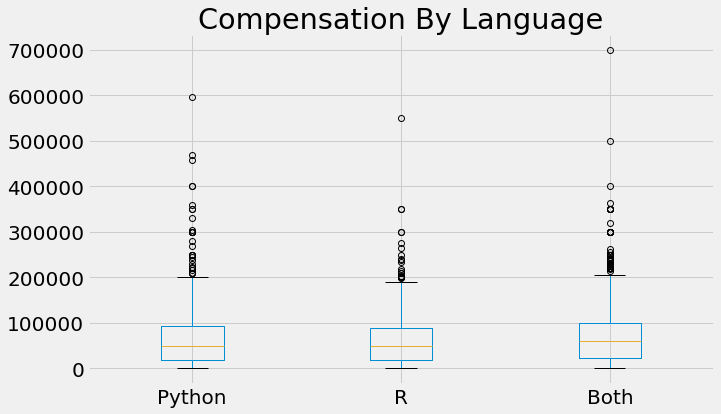

In [34]:
trying.plot.box()
plt.title('Compensation By Language')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Python 코더는 R에 비해 중간 급여가 약간 높습니다. 그러나이 두 언어를 모두 아는 사람들은 두 언어에 비해 중간 급여가 상당히 높습니다.



## Language Used By Professionals

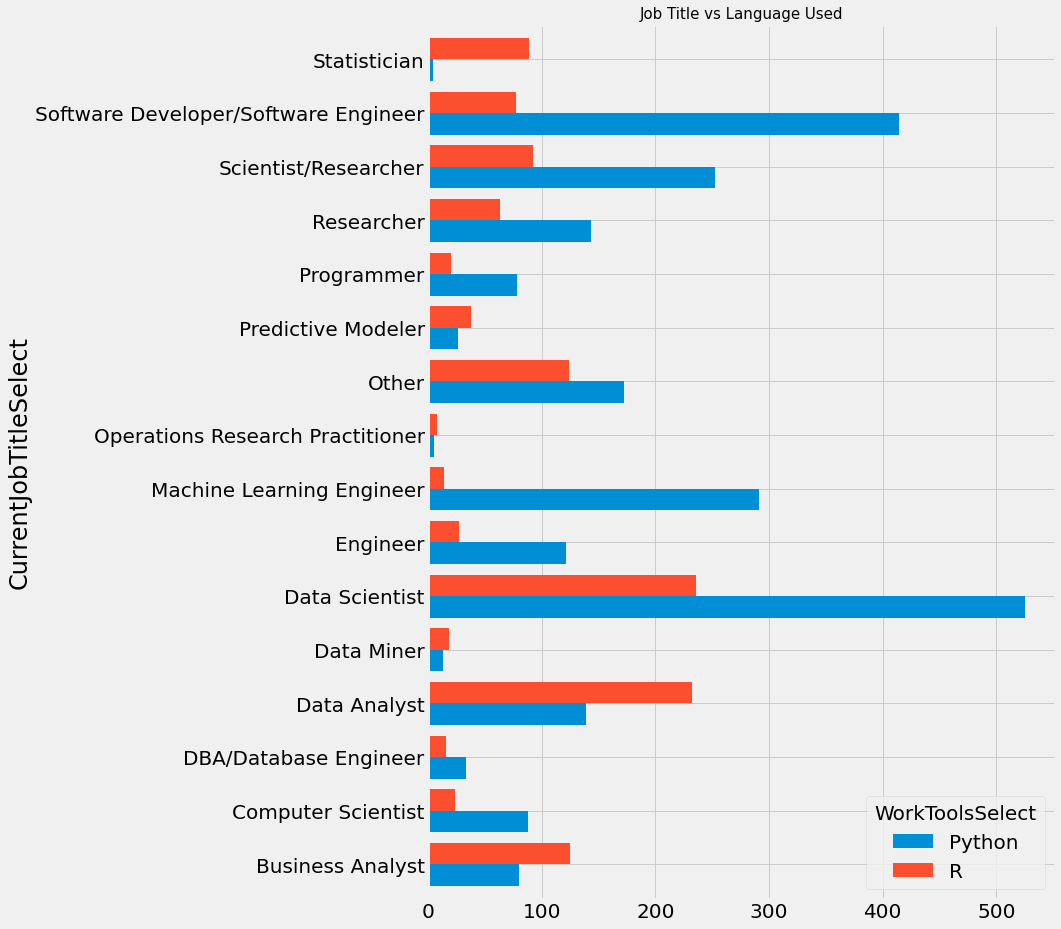

In [35]:
py1=python.copy()
r=R.copy()
py1['WorkToolsSelect']='Python'
r['WorkToolsSelect']='R'
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['CurrentJobTitleSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('CurrentJobTitleSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Title vs Language Used',size=15)
plt.show()

앞서 언급했듯이 R은 비주얼에서 Python을 능가합니다. 따라서 그래프와 시각적 개체가 매우 중요한 역할을 하는 Data Analyst, Business Analyst와 같은 직함을 가진 사람들은 Python보다 R을 선호합니다. 마찬가지로 통계학자의 거의 90%가 R을 사용합니다. 또한 앞서 언급했듯이 Python은 기계 학습 분야에서 더 우수하므로 기계 학습 엔지니어, 데이터 과학자 및 DBA ​​또는 프로그래머와 같은 다른 사람들은 R보다 Python을 선호합니다.

따라서 데이터 시각적 개체의 경우 --->R else---->Python.

**참고: 이 그래프는 전문가가 권장하는 언어가 아니라 전문가가 사용하는 도구입니다.**

## Job Function vs Language

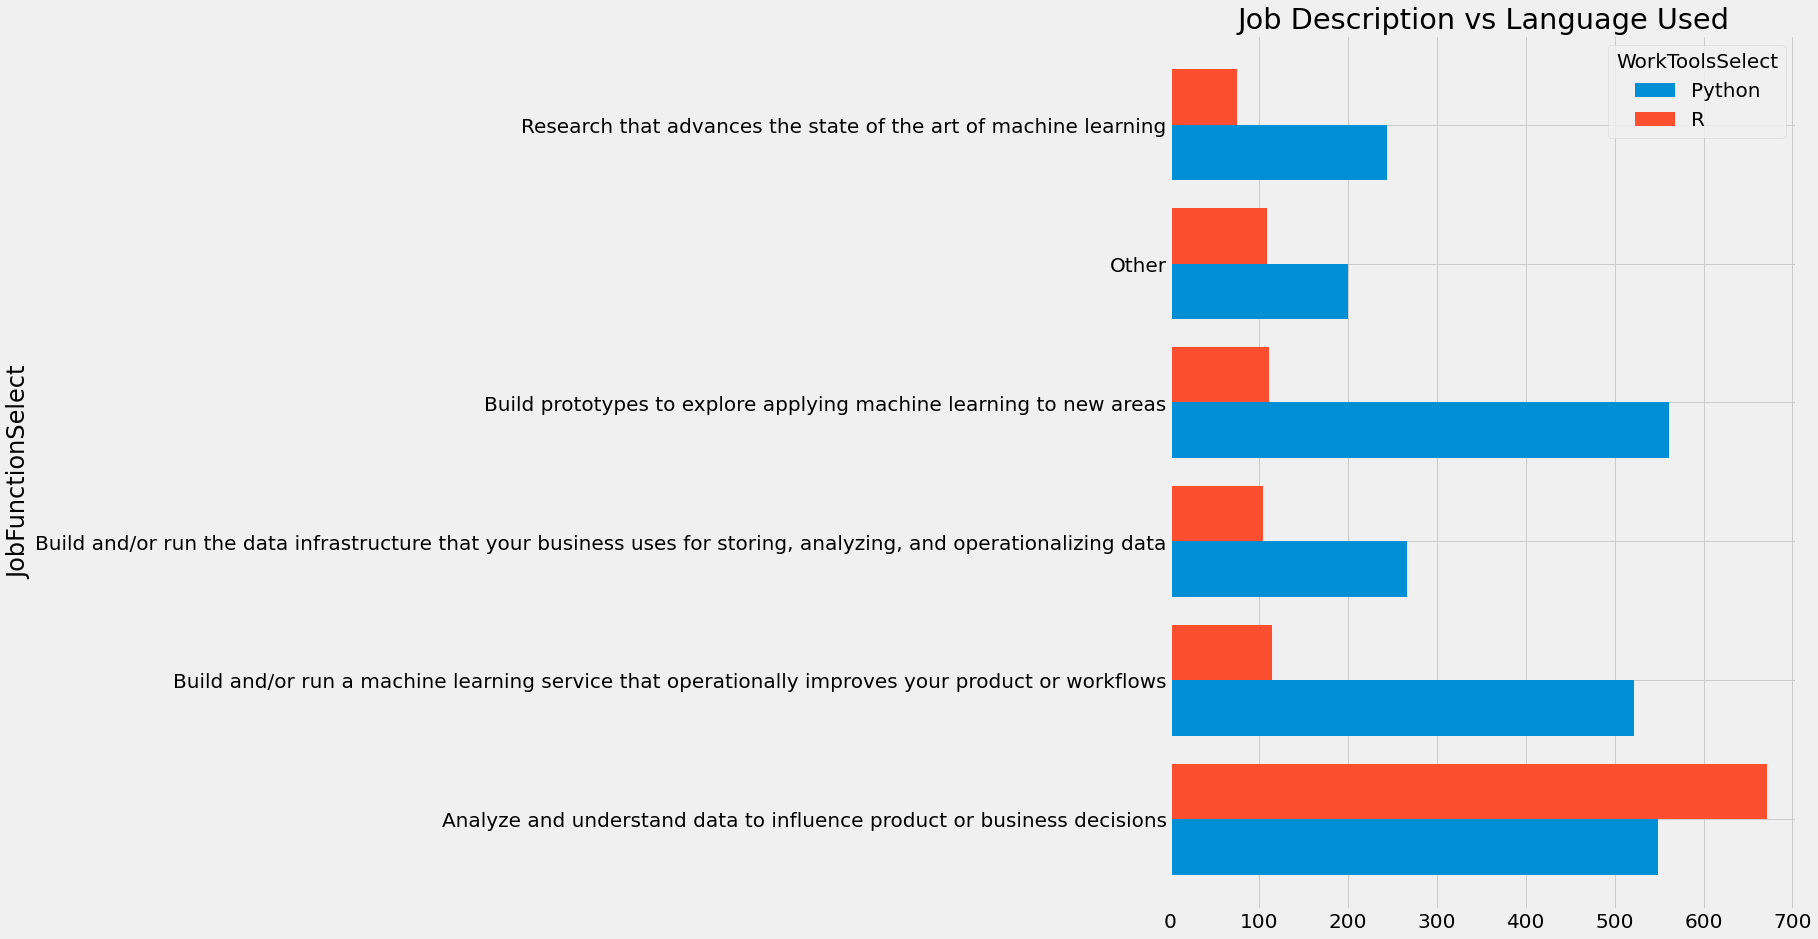

In [36]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['JobFunctionSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('JobFunctionSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Description vs Language Used')
plt.show()

내가 이미 언급했듯이 **R은 분석에서 탁월하지만 Python은 기계 학습에서 이깁니다.** 그래프는 R이 순수 분석과 관련하여 영향력이 있지만 다른 방식으로는 Python이 이기는 것을 보여줍니다.

## Tenure vs Language Used

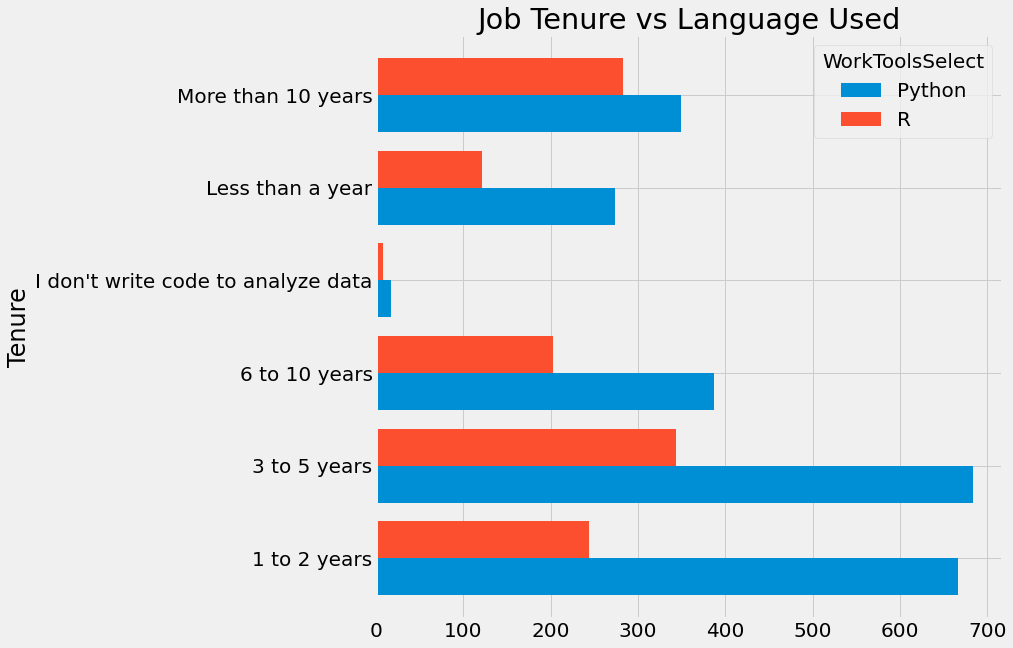

In [37]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['Tenure','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('Tenure','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Job Tenure vs Language Used')
plt.show()

이전에 보았듯이 Python은 초보자에게 적극 권장됩니다. 따라서 Python 사용자의 비율은 코딩 초기에 더 많습니다. 그러나 코딩 경험이 증가함에 따라 언어 간의 격차는 수년에 걸쳐 줄어듭니다.



## Industry vs Language Used

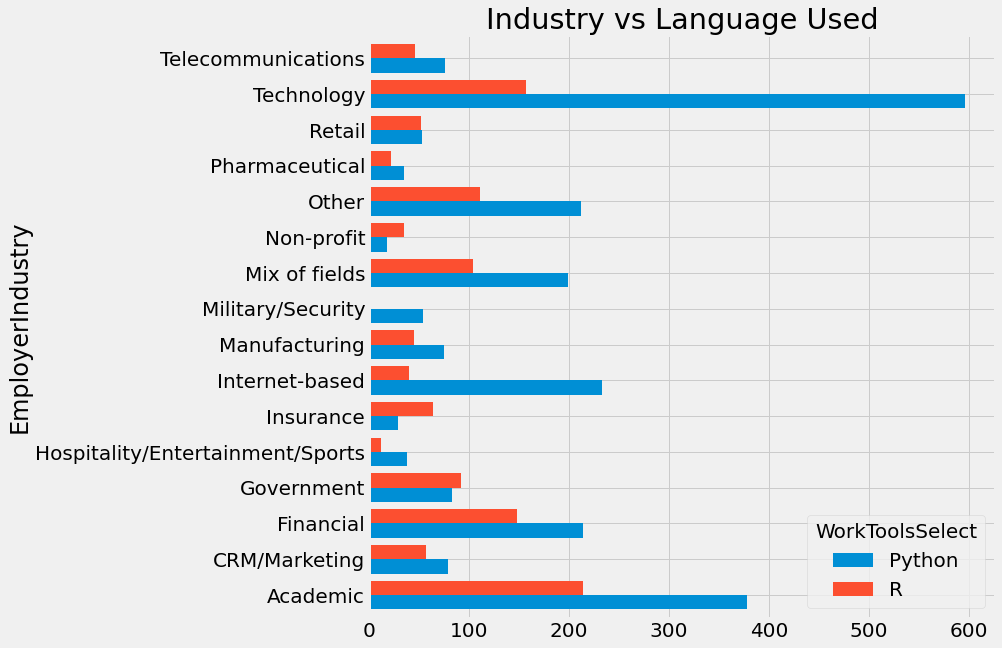

In [38]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['EmployerIndustry','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('EmployerIndustry','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Industry vs Language Used')
plt.show()

R은 정부, 보험 및 비영리 산업에서 Python을 능가합니다. 마찬가지로 Python은 기술 및 군사 산업에서 매우 큰 마진으로 R을 능가합니다. 나머지 다른 산업에서는 Python의 점유율이 R의 점유율보다 약 15-20% 더 많은 것으로 보입니다.



## Common Tools with Python and R

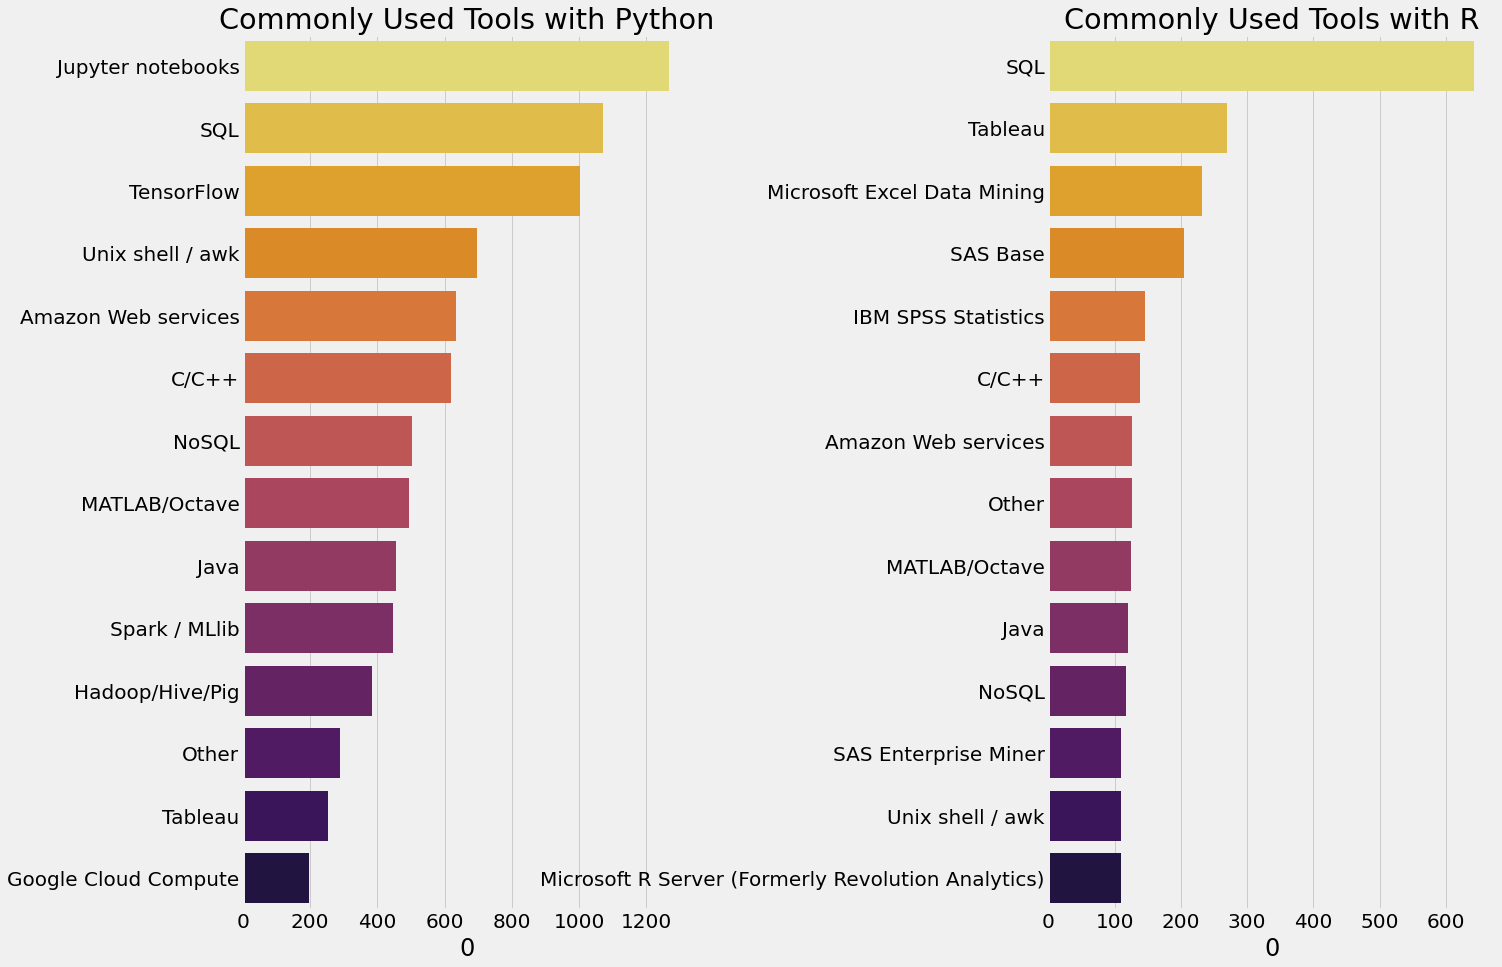

In [39]:
f,ax=plt.subplots(1,2,figsize=(20,15))
py_comp=python['WorkToolsSelect'].str.split(',')
py_comp1=[]
for i in py_comp:
    py_comp1.extend(i)
plt1=pd.Series(py_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[0],palette=sns.color_palette('inferno_r',15))
R_comp=R['WorkToolsSelect'].str.split(',')
R_comp1=[]
for i in R_comp:
    R_comp1.extend(i)
plt1=pd.Series(R_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))
ax[0].set_title('Commonly Used Tools with Python')
ax[1].set_title('Commonly Used Tools with R')
plt.subplots_adjust(wspace=0.8)
plt.show()

**SQL**은 두 언어 모두에서 사용되는 가장 일반적인 보완 도구인 것 같습니다. SQL은 대규모 데이터베이스 쿼리를 위한 기본 언어이므로 잘 아는 것은 매우 큰 장점입니다.

# Asking the Data Scientists



Hello World 프로그램을 성공적으로 작성하면 프로그래머나 개발자가 되는 건가요?? 경주에서 친구를 이기면 지구상에서 가장 빠른 사람이 되는 건가요?? 대답은 분명히 **아니요**입니다. 이것은 떠오르는 컴퓨터 과학 및 IT 전문가들의 문제입니다. 제한된 기술과 경험을 바탕으로 그들은 실제보다 훨씬 더 자신을 고려하기 시작합니다. 그들 중 많은 사람들이 실제 프로젝트에 대해 실제로 작업하지 않았고 몇 가지 간단한 데이터 세트에 대해 작업한 경우에도 그들을 기계 학습 전문가라고 부르기 시작합니다. 마찬가지로 여기의 많은 응답은 허풍 응답이어야 합니다. 그들 중 실제 데이터 사이언스 실무자가 몇 명인지 확인해 보겠습니다.

In [40]:
response['DataScienceIdentitySelect'].value_counts()

No                        5314
Yes                       4257
Sort of (Explain more)    3100
Name: DataScienceIdentitySelect, dtype: int64

따라서 전체 응답자의 약 26%가 자신을 데이터 과학자라고 생각합니다. Sort of은 무슨 뜻인가요? 그들은 여전히 ​​배우고 있습니까 아니면 실업자입니까? 지금은 그들을 No로 간주합시다.


## Current Job Titles

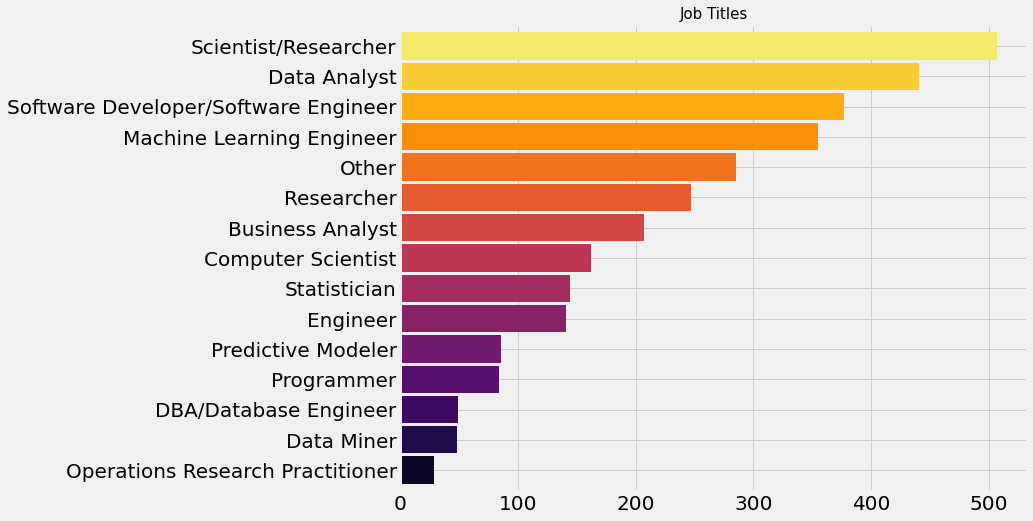

In [41]:
plt.subplots(figsize=(10,8))
scientist=response[response['DataScienceIdentitySelect']=='Yes']
scientist['CurrentJobTitleSelect'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',15))
plt.title('Job Titles',size=15)
plt.show()

따라서 전체 응답자의 약 26%가 자신을 데이터 과학자라고 생각합니다. Sort of은 무슨 뜻인가요? 그들은 여전히 ​​배우고 있습니까 아니면 실업자입니까? 지금은 그들을 No로 간주합시다.
놀랍게도 **직위 데이터 과학자에 대한 항목이 없습니다**. 그 이유는 CurrentJobTitleSelect를 데이터 과학자로 가진 사람들(데이터 과학자로 일하고 있을 수 있음)이 **"현재 스스로를 데이터 과학자라고 생각합니까?"**라는 질문에 대답하지 않았을 수 있기 때문일 수 있습니다.

데이터 분석가, 데이터 과학자 및 기계 학습 전문가, 통계 전문가 등과 같은 직업 간에는 중복되고 공통적인 기술이 많이 있습니다. 따라서 그들도 비슷한 기술을 가지고 있으며 동일한 레이블이 지정되지 않은 경우에도 스스로를 데이터 과학자로 간주합니다. 이제 이전 가정이 참인지 확인하겠습니다.

In [42]:
true=response[response['CurrentJobTitleSelect']=='Data Scientist']

그것은 정말 **진짜였다. CurrentJobTitle을 데이터 사이언티스트(Data Scientist)로 둔 사람들은 ***"현재 자신을 데이터 사이언티스트라고 생각하십니까?"**. 따라서 저는 이들 또한 실제 데이터 과학자로 간주하고 있습니다.

In [43]:
scientist=pd.concat([scientist,true])
scientist['CurrentJobTitleSelect'].shape[0]

6690

전체 응답자 중 약 **40%*가 데이터 과학자이거나 이와 동일한 기술을 보유하고 있습니다.



## Country-Wise Split

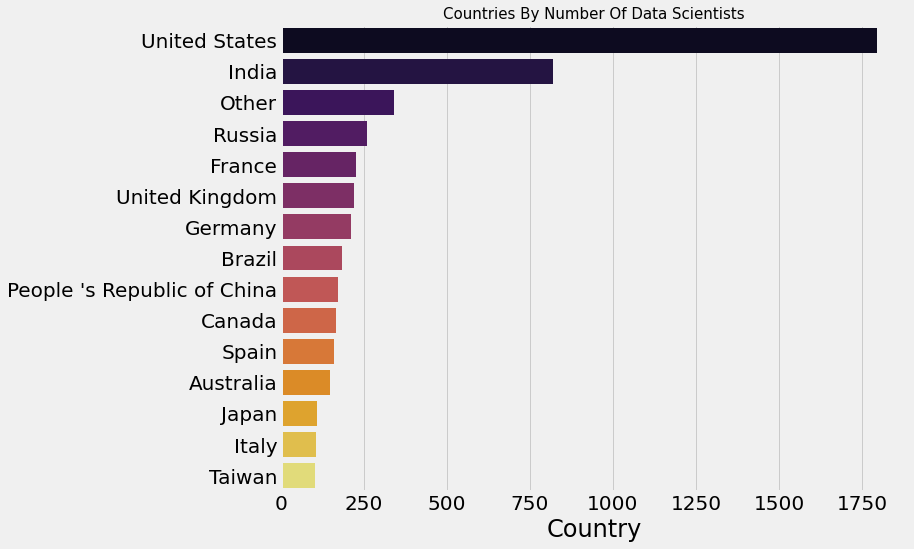

In [44]:
plt.subplots(figsize=(10,8))
coun=scientist['Country'].value_counts()[:15].sort_values(ascending=False).to_frame()
sns.barplot(coun.Country,coun.index,palette='inferno')
plt.title('Countries By Number Of Data Scientists',size=15)
plt.show()

이 그래프는 우리가 국가별 사용자 수를 표시했던 인구 통계 그래프와 유사합니다. 차이점이 있다면 데이터 과학자만 고려하다 보니 숫자가 줄었다는 점이다.


## Employment Status & Education

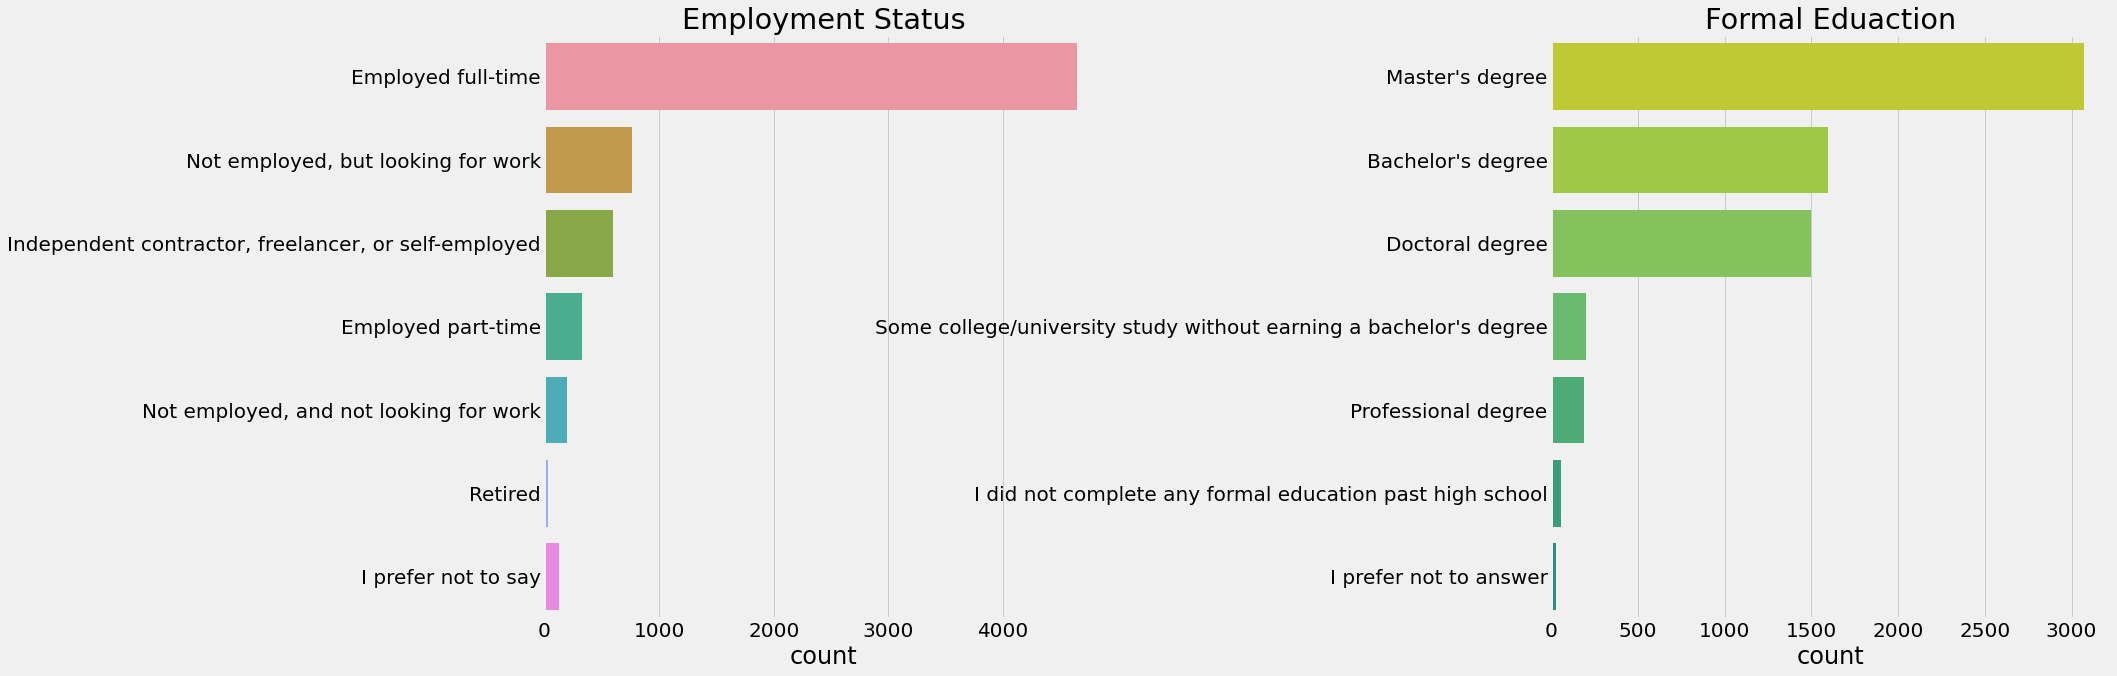

In [45]:
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.countplot(y=scientist['EmploymentStatus'],ax=ax[0])
ax[0].set_title('Employment Status')
ax[0].set_ylabel('')
sns.countplot(y=scientist['FormalEducation'],order=scientist['FormalEducation'].value_counts().index,ax=ax[1],palette=sns.color_palette('viridis_r',15))
ax[1].set_title('Formal Eduaction')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

데이터 과학자의 약 **67%*가 정규직으로 고용되어 있으며, 그 중 약 **11-12%**는 실직 상태이지만 일자리를 찾고 있습니다. 교육 측면에서는 데이터 과학자의 약 **45-46%*가 ** 석사 학위**를 보유하고 있는 반면, 약 **23-24%*는 ** 학사 학위 또는 박사 학위**가 있습니다. 따라서 교육은 데이터 과학자가 되기 위한 중요한 요소로 보인다. 교육에 따라 급여가 어떻게 달라지는지 봅시다.




## Compensation By Formal Education

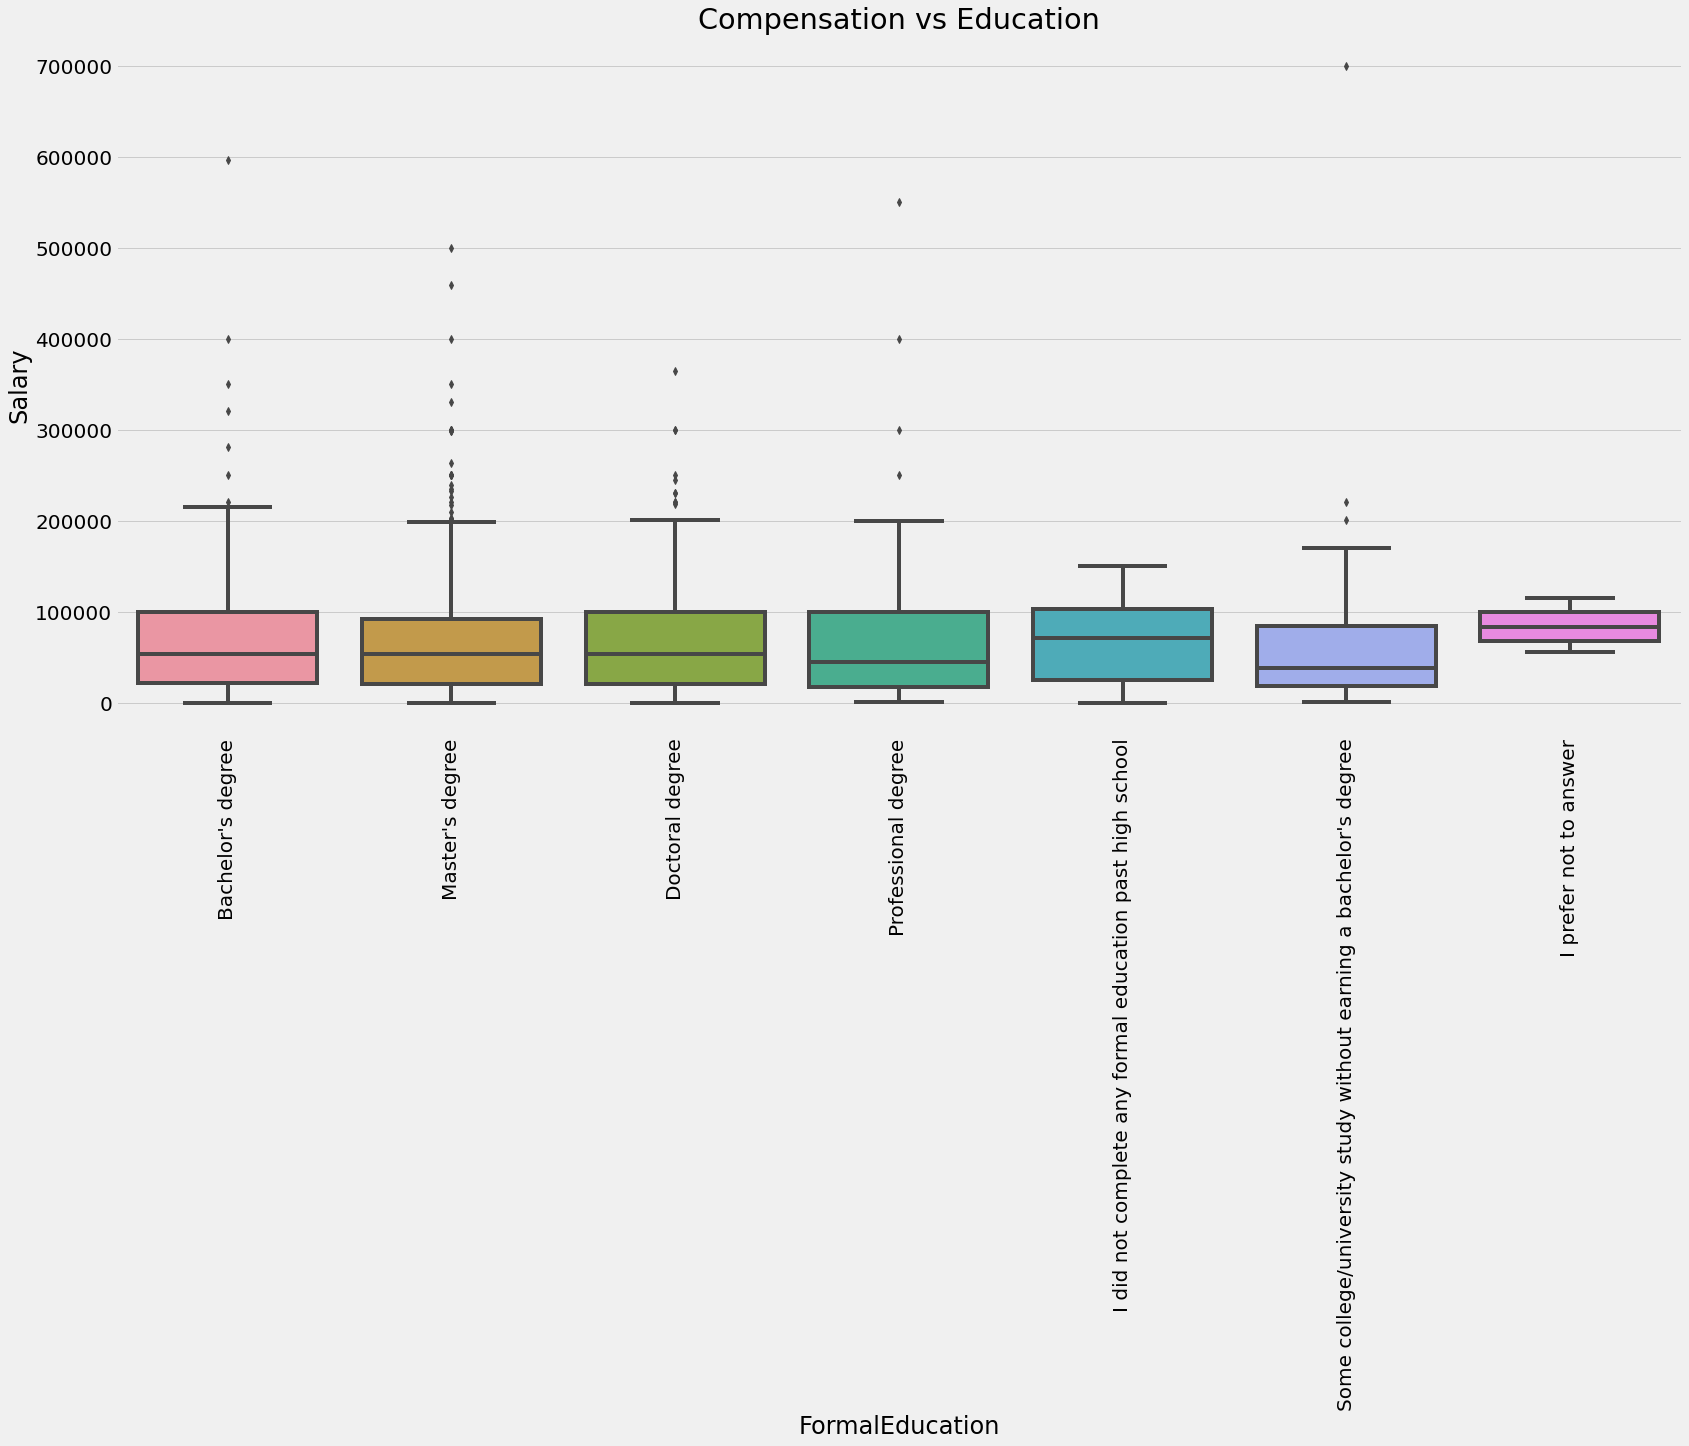

In [46]:
plt.subplots(figsize=(25,12))
comp_edu=scientist.merge(salary,left_index=True,right_index=True,how='left')
comp_edu=comp_edu[['FormalEducation','Salary']]
sns.boxplot(x='FormalEducation',y='Salary',data=comp_edu)
plt.title('Compensation vs Education')
plt.xticks(rotation=90)
plt.show()

이것은 놀랍다. 왜냐하면 학사, 석사, 박사 학위의 급여 범위가 매우 비슷하기 때문이다. 석박사 학위와 비교했을 때 학사 학위의 중간값이 조금 높은 것 같습니다. 많은 데이터 과학자들이 석사 학위를 가지고 있기 때문에 나는 이것을 예상하지 못했다. 하지만 저는 **직장경험**이 어떤 학위보다 중요하다고 생각합니다. 아마 학사 학위 소지자들은 다른 두 명보다 경험이 더 많을 거예요.



## Previous Job and Salary Change

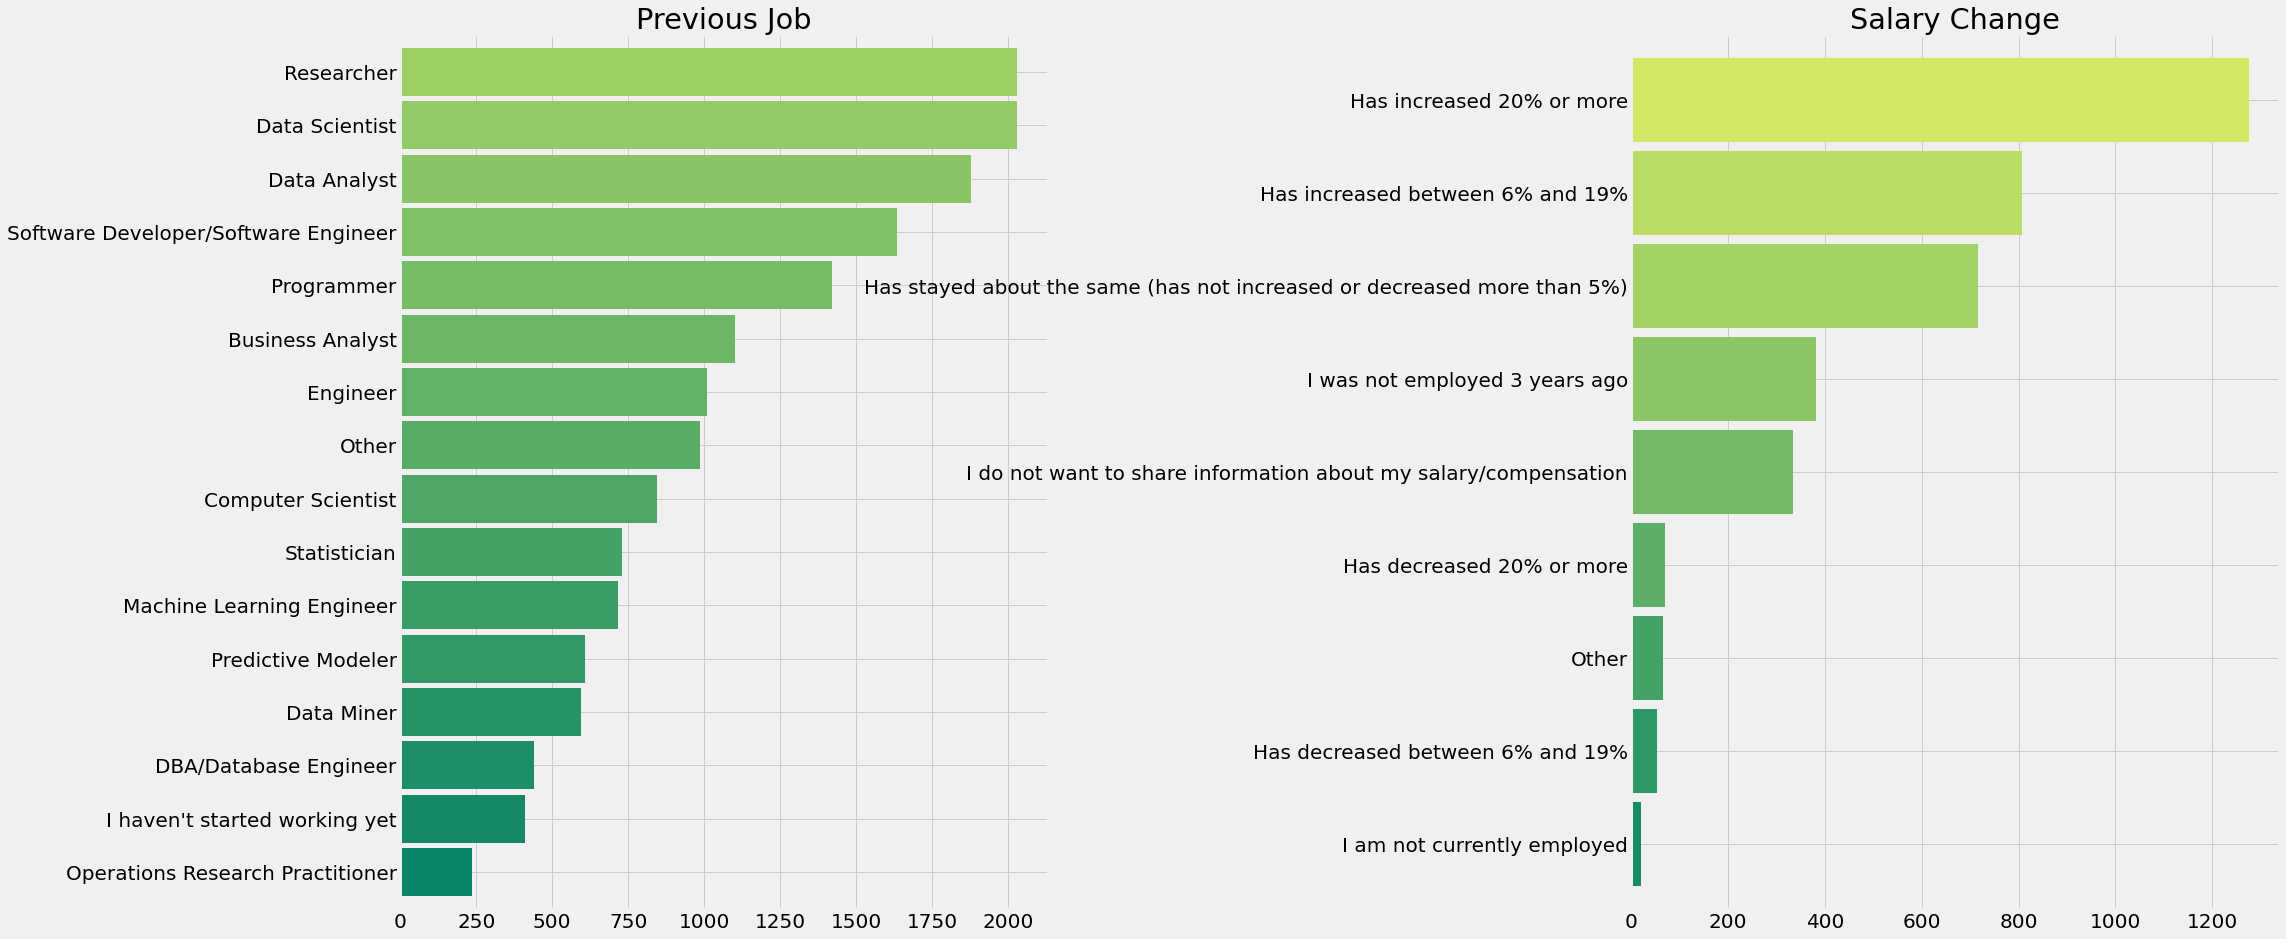

In [47]:
f,ax=plt.subplots(1,2,figsize=(30,15))
past=scientist['PastJobTitlesSelect'].str.split(',')
past_job=[]
for i in past.dropna():
    past_job.extend(i)
pd.Series(past_job).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',25),ax=ax[0])
ax[0].set_title('Previous Job')
sal=scientist['SalaryChange'].str.split(',')
sal_change=[]
for i in sal.dropna():
    sal_change.extend(i)
pd.Series(sal_change).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',10),ax=ax[1])
ax[1].set_title('Salary Change')
plt.subplots_adjust(wspace=0.9)
plt.show()

확실히 데이터 사이언스로 전환하는 대부분의 직원은 **6-20% 또는 그 이상의 급여 인상을 받습니다. 데이터 과학자에 대한 수요가 증가함에 따라 급여도 시간이 지남에 따라 증가할 수 있습니다.


## Tools used at Work


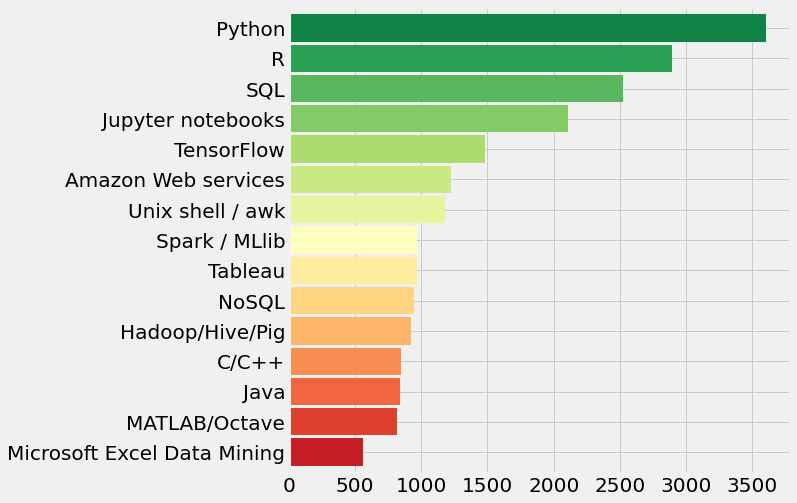

In [48]:
plt.subplots(figsize=(8,8))
tools=scientist['WorkToolsSelect'].str.split(',')
tools_work=[]
for i in tools.dropna():
    tools_work.extend(i)
pd.Series(tools_work).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('RdYlGn',15))
plt.show()

유사한 관측치인 Python, R 및 SQL은 데이터 과학에서 가장 많이 사용되는 도구 또는 언어입니다.

## Where Did they Learn From??

In [50]:
course=scientist['CoursePlatformSelect'].str.split(',')
course_plat=[]
for i in course.dropna():
    course_plat.extend(i)
course_plat=pd.Series(course_plat).value_counts()
blogs=scientist['BlogsPodcastsNewslettersSelect'].str.split(',')
blogs_fam=[]
for i in blogs.dropna():
    blogs_fam.extend(i)
blogs_fam=pd.Series(blogs_fam).value_counts()
labels1=course_plat.index
sizes1=course_plat.values

labels2=blogs_fam[:5].index
sizes2=blogs_fam[:5].values


fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, .48]},
      "name": "MOOC",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": sizes2 ,
      "labels": labels2,
    #   "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Blog",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Blogs and Online Platforms",
        "showlegend":True,
        "annotations": [
            {
                "font": {
                    "size": 12
                },
                "showarrow": False,
                "text": "MOOC's",
                "x": 0.18,
                "y": 0.5
            },
            {
                "font": {
                    "size": 12
                },
                "showarrow": False,
                "text": "BLOGS",
                "x": 0.83,
                "y": 0.5}]}}
py.iplot(fig, filename='donut')

Coursera는 데이터 사이언티스트가 데이터 사이언스를 학습하기 위해 가장 선호하는 플랫폼입니다. 제 개인적인 투표는 여러분이 처음부터 발전까지 같은 플랫폼에서 배울 수 있는 Coursera에게도 적용됩니다. 파이썬이나 R 같은 단일 언어에 국한되지 않고 스칼라 등 다른 언어에 대한 강좌도 개설되어 있다. 마찬가지로, KDNuggets가 가장 선호하는 블로그이다.


## Time Spent on Tasks

데이터 과학자는 항상 예측 모델을 구축하는 것이 아니라 올바른 데이터, 분석 등을 수집하여 데이터 품질을 책임집니다. 데이터 과학자가 이러한 다양한 작업에 얼마나 많은 시간을 할애하는지 살펴보겠습니다.

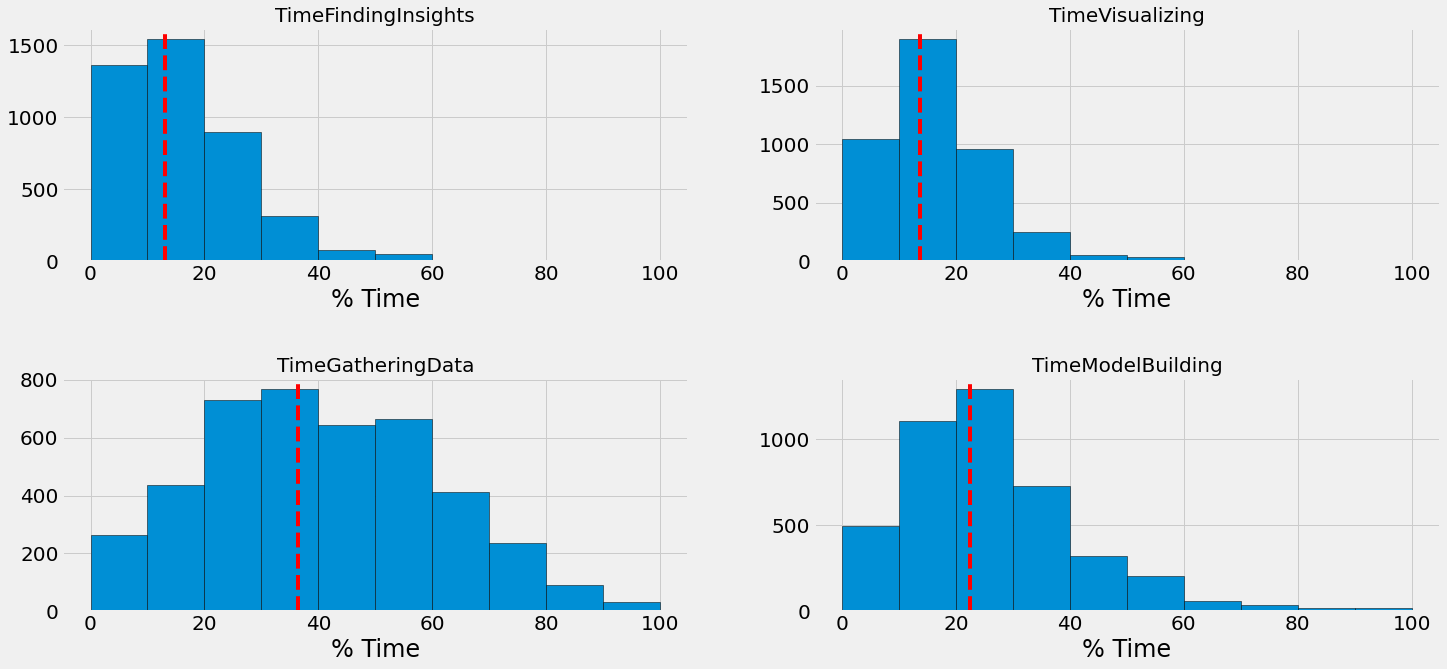

In [51]:
import itertools
plt.subplots(figsize=(22,10))
time_spent=['TimeFindingInsights','TimeVisualizing','TimeGatheringData','TimeModelBuilding']
length=len(time_spent)
for i,j in itertools.zip_longest(time_spent,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    scientist[i].hist(bins=10,edgecolor='black')
    plt.axvline(scientist[i].mean(),linestyle='dashed',color='r')
    plt.title(i,size=20)
    plt.xlabel('% Time')
plt.show()

리드 라인은 평균 라인입니다.
단계별로 수행해 보겠습니다.

  - **시간 수집 데이터:** 가장 많은 시간이 소요되는 부품입니다. 데이터를 얻는 것은 전체 프로세스에서 가장 힘든 작업이며, 그 다음으로는 데이터 클리닝(데이터를 사용할 수 없는 것으로 표시되지 않음)이 뒤따르는데, 이는 아직 시간이 많이 걸리는 프로세스입니다. 따라서 올바른 데이터를 수집하고 데이터를 스크래핑하는 것은 가장 많은 시간이 소요되는 프로세스입니다.
  
  - **시간시각화:** 가장 시간이 적게 드는 과정(아마도 가장 즐거운 과정)일 것입니다.:p), 간단한 드래그 앤 드롭 기능으로 그래프와 대시보드를 작성하는 데 도움이 되는 Tableau, Klik, Tibco 등과 같은 Enterprise Tools를 사용하면 훨씬 더 줄어듭니다.
  
  - **시간찾기**데이터를 시각화하면, 데이터에서 사실과 패턴을 찾고, 슬라이스하여 비즈니스 프로세스에 대한 통찰력을 찾을 수 있습니다.TimeVisualizing에 비해 조금 더 많은 시간이 소요될 것으로 보입니다.
  
  - **시간 모형 구축:** 여기서 데이터 과학자는 예측 모델을 구축하고 모델을 조정하는 등의 작업을 수행합니다. 이것은 TimeDataGathering 다음으로 시간이 많이 걸리는 공정입니다.

## Cloud Services

데이터의 크기가 증가함에 따라 물리적 서버 인프라에 대해 데이터를 처리하고 예측 분석을 수행할 수 없습니다. 따라서 클라우드는 확장성을 주요 장점으로 예측 분석을 한 단계 끌어올립니다. 또한 모든 유형의 데이터 및 규모에 관계없이 작동하는 머신러닝 모델을 쉽게 구축할 수 있는 서비스를 관리합니다. 데이터 과학자가 가장 많이 사용하는 클라우드 플랫폼을 확인해 보겠습니다.

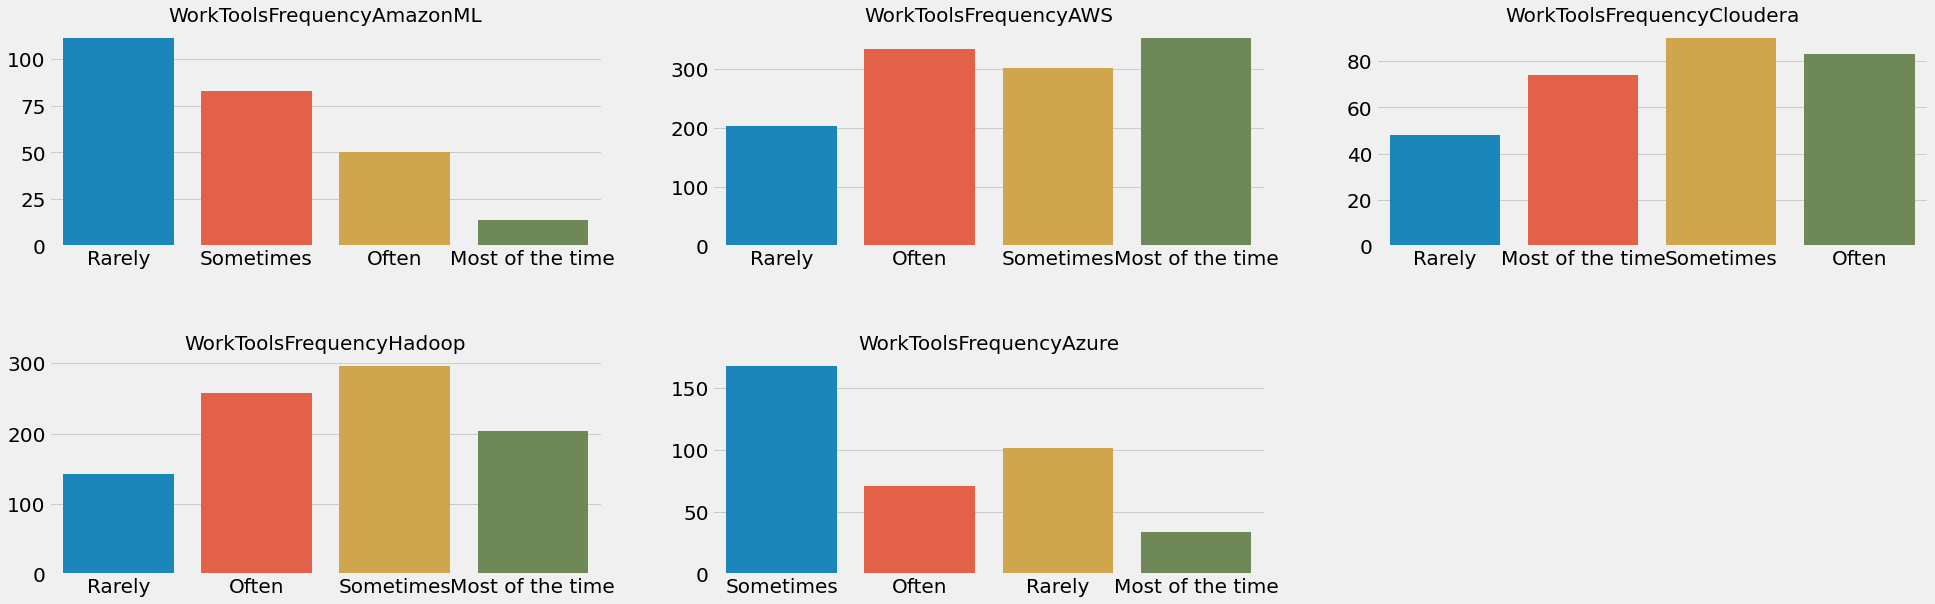

In [52]:
cloud=['WorkToolsFrequencyAmazonML','WorkToolsFrequencyAWS','WorkToolsFrequencyCloudera','WorkToolsFrequencyHadoop','WorkToolsFrequencyAzure']
plt.subplots(figsize=(30,15))
length=len(cloud)
for i,j in itertools.zip_longest(cloud,range(length)):
    plt.subplot((length/2+1),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,data=scientist)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

**아마존은 분명히퍼블릭 클라우드 서비스 프로바이더인 AWS**가 가장 많이 사용되는 클라우드 플랫폼이며 하둡이 그 뒤를 잇고 있다. 하둡(Hadoop)은 빅데이터 데이터셋의 분산 스토리지 및 처리에 사용되는 오픈 소스 소프트웨어 프레임워크입니다. Hadoop에 대한 자세한 내용을 보려면, **<a href='https://www.analyticsvidhya.com/blog/2014/05/hadoop-simplified/'>Check this</a>**

## Importance Of Visualisations

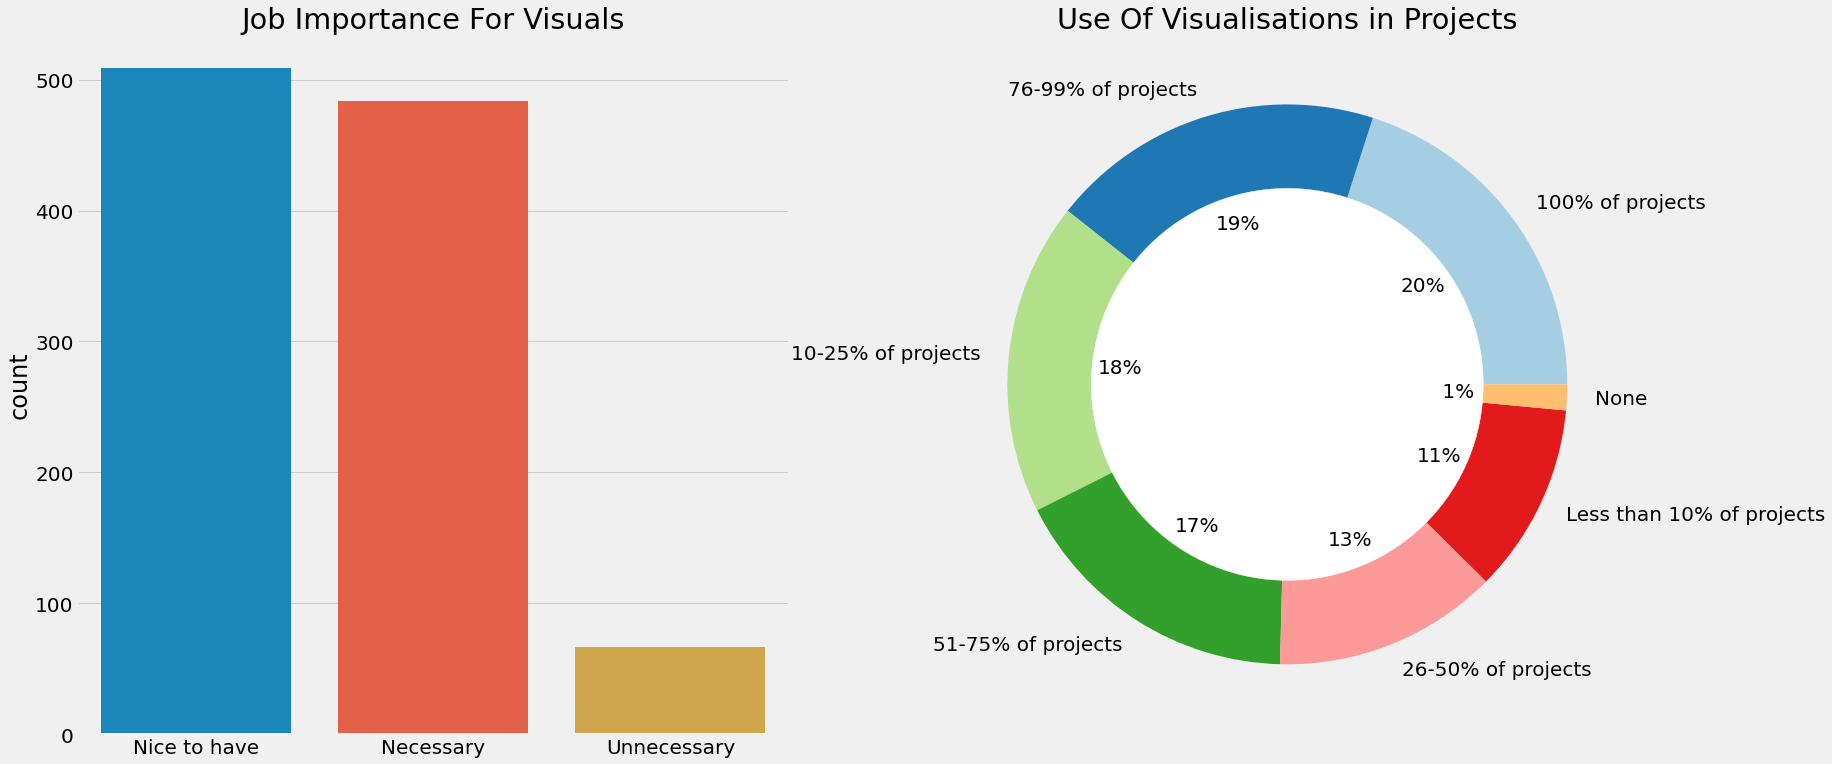

In [53]:
f,ax=plt.subplots(1,2,figsize=(25,12))
sns.countplot(scientist['JobSkillImportanceVisualizations'],ax=ax[0])
ax[0].set_title('Job Importance For Visuals')
ax[0].set_xlabel('')
scientist['WorkDataVisualizations'].value_counts().plot.pie(autopct='%2.0f%%',colors=sns.color_palette('Paired',10),ax=ax[1])
ax[1].set_title('Use Of Visualisations in Projects')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

시각화는 데이터 과학 프로젝트에서 매우 필수적인 부분이며, 위의 그래프도 이와 같다. 거의 모든 데이터 과학 프로젝트(예: **99%**)에 시각화 기능이 포함되어 있으며, 그 규모와 규모는 상관이 없습니다. 데이터 과학자의 약 **95%**는 시각화 기술을 보유하는 것이 좋거나 필요하다고 말합니다.비주얼은 전문가뿐만 아니라 기술적으로 미숙할 수 있는 고객을 대상으로 데이터를 더 빨리 이해하고 이해하는 데 도움이 된다.


## BI Tools

비즈니스 인텔리전스 소프트웨어는 비즈니스 인텔리전스를 위해 데이터를 검색, 분석, 변환 및 보고하도록 설계된 일종의 응용프로그램 소프트웨어입니다. Python 또는 R의 일반적인 코딩 방식에 비해 데이터 시각화 및 분석을 매우 단순하게 만든다. 유일한 단점은 그것들이 너무 비싸고 적절하다는 것이다. 데이터 사이언티스트가 가장 자주 사용하는 엔터프라이즈 BI 툴에 대해 살펴보겠습니다.

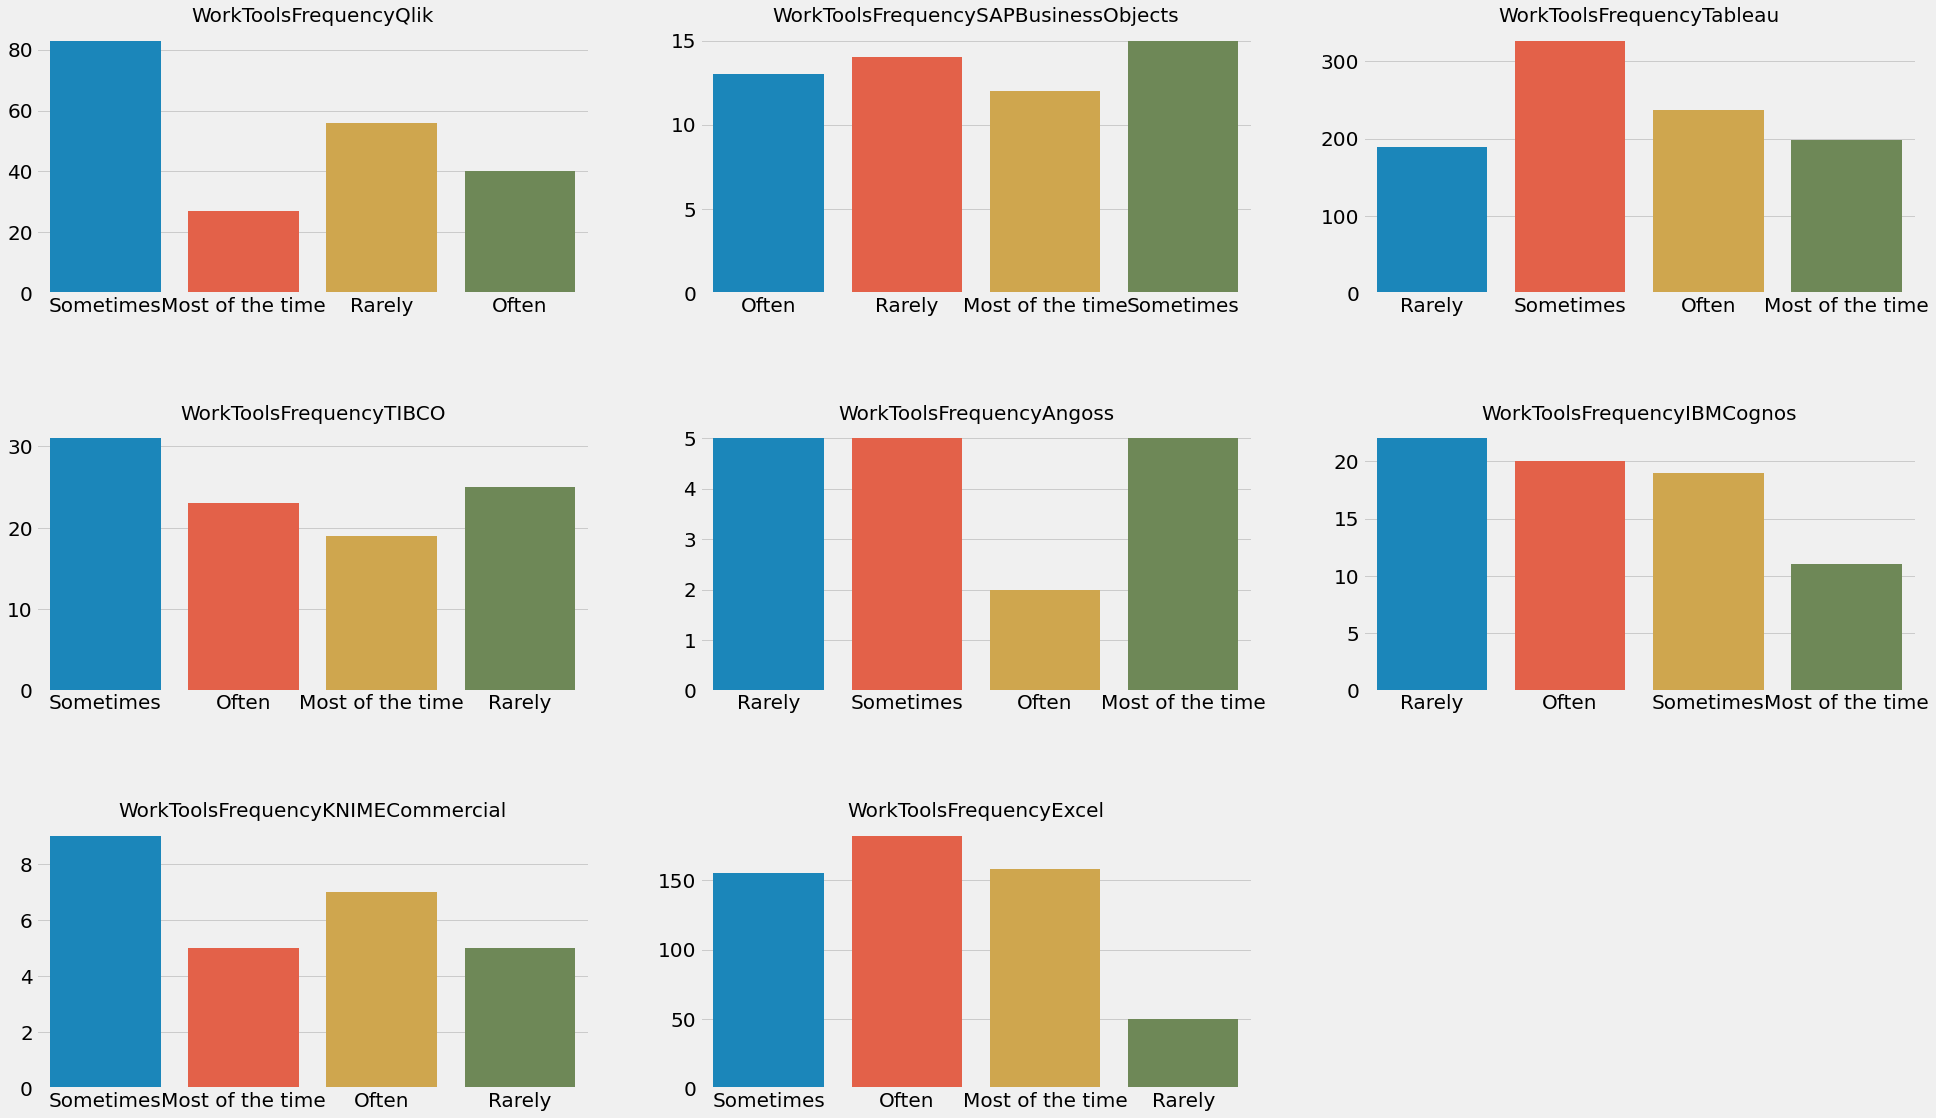

In [54]:
BI=['WorkToolsFrequencyQlik','WorkToolsFrequencySAPBusinessObjects','WorkToolsFrequencyTableau','WorkToolsFrequencyTIBCO','WorkToolsFrequencyAngoss','WorkToolsFrequencyIBMCognos','WorkToolsFrequencyKNIMECommercial','WorkToolsFrequencyExcel']
plt.subplots(figsize=(30,25))
length=len(BI)
for i,j in itertools.zip_longest(BI,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,data=scientist)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

어디서 **엑셀은 분석가들에게 빵과 버터를 주는 존재**라는 말을 읽었거나 들은 적이 있습니다. 엑셀이 데이터 사이언티스트들 사이에서 여전히 인기가 있기 때문에 이 점은 여전히 어느 정도 유효하다. 그러나 가장 자주 사용되는 BI 도구는 **Tableau**인 것 같습니다. 저는 개인적으로 Tableau를 사용하는데 이것은 꽤 사용자 친화적이고 드래그 앤 드롭이 가능하며 당신은 그래프를 준비했습니다.


## Knowledge Of Algorithms (Maths and Stats)

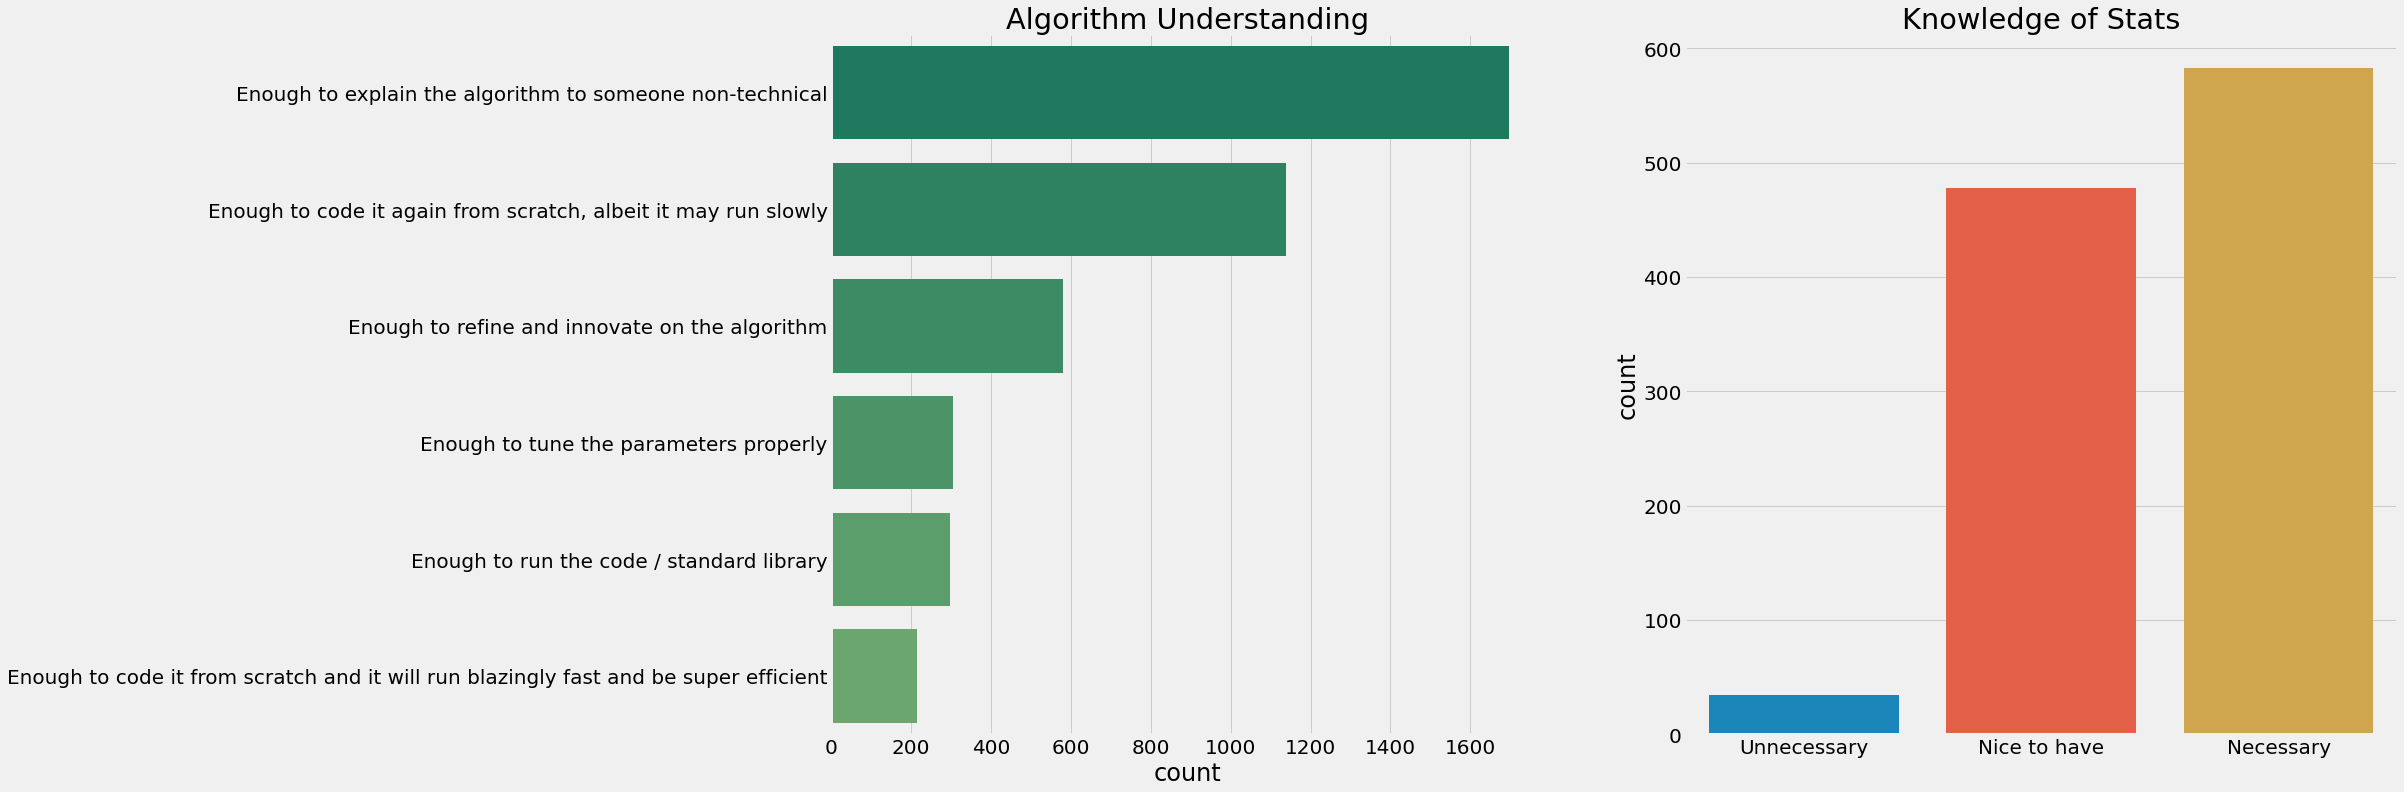

In [55]:
f,ax=plt.subplots(1,2,figsize=(25,12))
sns.countplot(y=scientist['AlgorithmUnderstandingLevel'],order=scientist['AlgorithmUnderstandingLevel'].value_counts().index,ax=ax[0],palette=sns.color_palette('summer',15))
sns.countplot(scientist['JobSkillImportanceStats'],ax=ax[1])
ax[0].set_title('Algorithm Understanding')
ax[0].set_ylabel('')
ax[1].set_title('Knowledge of Stats')
ax[1].set_xlabel('')
plt.show()

데이터 과학자는 기계 학습 알고리즘의 가장 중요한 부분인 통계 및 선형 대수와 같은 수학적 개념에 대한 좋은 지식을 가지고 있습니다. 그러나 scikit, tensorflow, keras 등과 같은 많은 표준 라이브러리가 이러한 모든 것을 이미 구현했기 때문에 이 수학이 정말로 필요한가요? 그러나 경험 많은 데이터 과학자들은 알고리즘 이면의 수학을 잘 이해해야 한다고 말합니다. 데이터 과학자의 약 **95%**는 통계가 데이터 과학의 중요한 자산이라고 말합니다.



## Learning Platform Usefullness

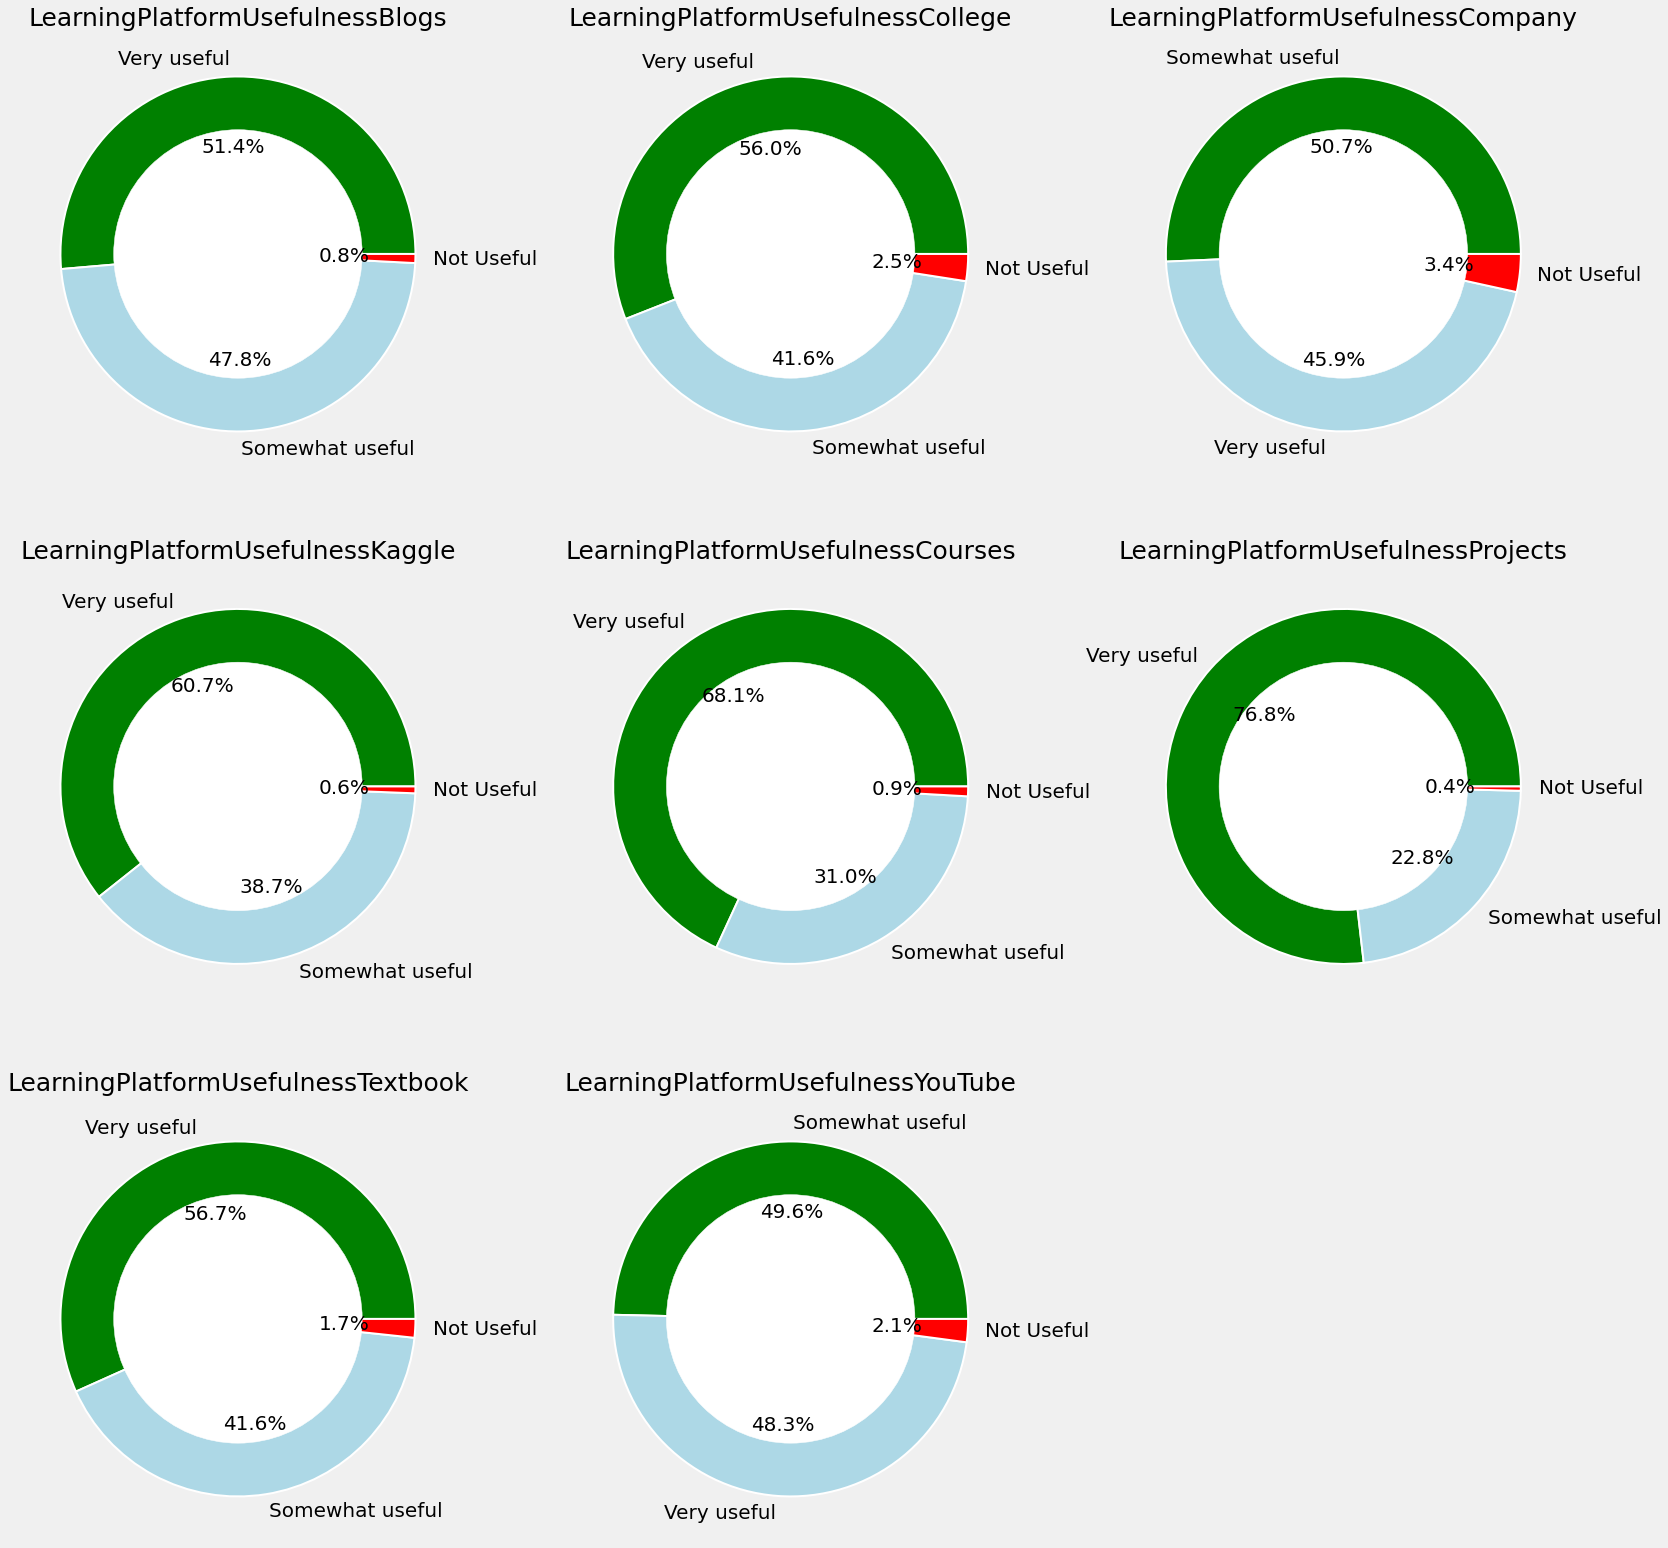

In [56]:
plt.subplots(figsize=(25,35))
useful=['LearningPlatformUsefulnessBlogs','LearningPlatformUsefulnessCollege','LearningPlatformUsefulnessCompany','LearningPlatformUsefulnessKaggle','LearningPlatformUsefulnessCourses','LearningPlatformUsefulnessProjects','LearningPlatformUsefulnessTextbook','LearningPlatformUsefulnessYouTube']
length=len(useful)
for i,j in itertools.zip_longest(useful,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    scientist[i].value_counts().plot.pie(autopct='%1.1f%%',colors=['g','lightblue','r'],wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
    plt.title(i,size=25)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

위의 도넛 차트는 데이터 과학을 배울 수 있는 다양한 플랫폼에 대한 데이터 과학자의 의견을 보여줍니다. 플롯은 유용하지 않은 비율이 거의 **0%**인 **프로젝트**에 가장 적합합니다. 제 개인적인 의견에 따르면 프로젝트는 IT 업계에서 무엇이든 배울 수 있는 최고의 플랫폼 또는 방법입니다. 다른 우수한 플랫폼은 **Online Courses 및 Kaggle**입니다. 다른 플랫폼의 그래프는 서로 매우 유사합니다.


## What should the Resume have??

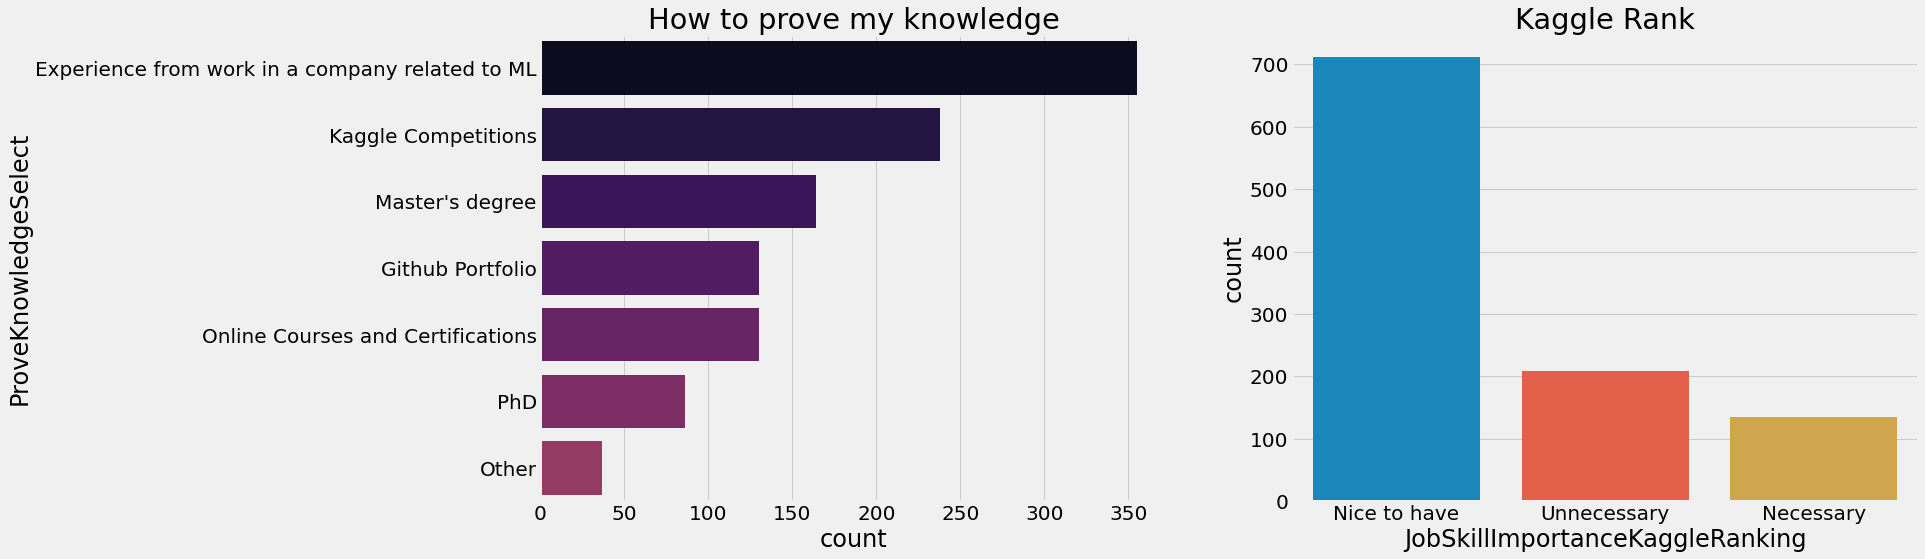

In [57]:
f,ax=plt.subplots(1,2,figsize=(22,8))
sns.countplot(y=scientist['ProveKnowledgeSelect'],order=scientist['ProveKnowledgeSelect'].value_counts().index,ax=ax[0],palette=sns.color_palette('inferno',15))
ax[0].set_title('How to prove my knowledge')
sns.countplot(scientist['JobSkillImportanceKaggleRanking'],ax=ax[1])
ax[1].set_title('Kaggle Rank')
plt.show()

ML 프로젝트 및 Kaggle 대회에서의 업무 경험이 데이터 과학 지식을 반영한다는 것은 분명합니다. 또한 kaggle 순위는 이력서에 좋은 일이 될 수 있습니다. 앞서 언급했듯이 관련 업무 경험은 석사 또는 박사 학위에 비해 더 높은 가치를 가질 수 있습니다. 위 그래프에서 볼 수 있듯이 데이터 과학자는 학위보다 업무 경험을 선호하기 때문에 이 진술은 유효합니다.



## How did they search for Jobs?? 

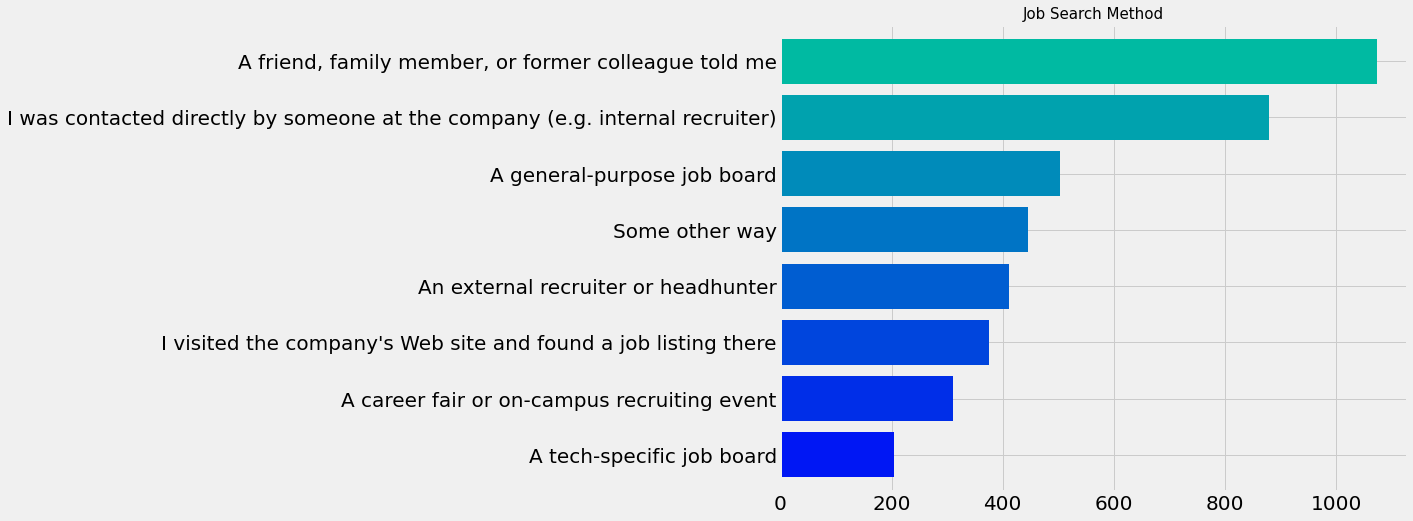

In [58]:
plt.subplots(figsize=(10,8))
scientist.groupby(['EmployerSearchMethod'])['Age'].count().sort_values(ascending=True).plot.barh(width=0.8,color=sns.color_palette('winter',10))
plt.title('Job Search Method',size=15)
plt.ylabel('')
plt.show()

ML 프로젝트 및 Kaggle 대회에서의 업무 경험이 데이터 과학 지식을 반영한다는 것은 분명합니다. 또한 kaggle 순위는 이력서에 좋은 일이 될 수 있습니다. 앞서 언급했듯이 관련 업무 경험은 석사 또는 박사 학위에 비해 더 높은 가치를 가질 수 있습니다. 위 그래프에서 볼 수 있듯이 데이터 과학자는 학위보다 업무 경험을 선호하기 때문에 이 진술은 유효합니다.
많은 데이터 과학자들은 친구나 친척을 통해 직업에 대해 알게 되거나 회사에서 직접 연락을 받습니다. 따라서 우리는 Linkedin과 같은 전문 프로필을 적절하게 유지하고 계속 업데이트해야 합니다. 그러한 네트워킹 사이트가 당신의 꿈의 직업을 얻는 데 도움이 될 수 있기 때문입니다.

## Checking the Free Responses

ML 프로젝트 및 Kaggle 대회에서의 업무 경험이 데이터 과학 지식을 반영한다는 것은 분명합니다. 또한 kaggle 순위는 이력서에 좋은 것이 될 수 있습니다. 앞서 언급했듯이 관련 업무 경험은 석사 또는 박사 학위에 비해 더 높은 가치를 가질 수 있습니다. 위 그래프에서 볼 수 있듯이 데이터 과학자는 학위보다 업무 경험을 선호하기 때문에 이 진술은 유효합니다.
많은 데이터 과학자들은 친구나 친척을 통해 직업에 대해 알게 되거나 회사에서 직접 연락을 받습니다. 따라서 우리는 Linkedin과 같은 전문 프로필을 적절하게 유지하고 계속 업데이트해야 합니다. 그러한 네트워킹 사이트가 당신의 꿈의 직업을 얻는 데 도움이 될 수 있기 때문입니다. 이 파일에는 응답자들이 응답한 자유 형식 응답이 포함되어 있습니다. 이것의 문제는 자유 형식 응답이기 때문에 모든 사용자가 자신의 방식으로 응답한다는 것입니다. 내 말은 우리가 같은 것에 대해 다른 대답을 할 것이라는 것입니다. 내가 관찰한 예는 라이브러리 **Pandas는 pandas, Pandas, panda 등 다양한 형식으로 작성되었습니다.** 따라서 **nltk(Natural Language Toolkit)를 사용하여 이 파일을 분석하려고 합니다.**

In [64]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
free=pd.read_csv('freeformResponses.csv')
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### kaggle key 숨김용


In [66]:
kaggle=b'/9j/4AAQSkZJRgABAQAAAQABAAD//gA7Q1JFQVRPUjogZ2QtanBlZyB2MS4wICh1c2luZyBJSkcgSlBFRyB2ODApLCBxdWFsaXR5ID0gOTAK/9sAQwADAgIDAgIDAwMDBAMDBAUIBQUEBAUKBwcGCAwKDAwLCgsLDQ4SEA0OEQ4LCxAWEBETFBUVFQwPFxgWFBgSFBUU/9sAQwEDBAQFBAUJBQUJFA0LDRQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU/8AAEQgCcgJyAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A/VKiiigAooooAKKKKACiiigAooooAKWiigBKKWkoAWikpaACikpaACkoooABS0lFABS0lFAC0lFFAFLW9bsPDekXmqapdxWGnWcTTT3M7bUjRRkkmvgf4sf8FlPhn4N1ybTfCXh7VfGiQ5Vr8MtpbO2cYQtlyPcqPxryn/gsJ+1Hef2jY/Bzw7qTQWiIt5r4t3GZWOGigYjnA+8R3IX0r8taaQH6wWH/AAXB053xe/Cm6hXPWDWFkOPxiWt6P/gtv4GMBMnw78QrN2VZ4Cv57h/KvyBop2A/S34of8Fq/FGrRTW3gPwRaaCGQqt7qtx9plDEfe8sKFGPQk18h/Ef9tj41fFOcPrfj7VVhUkraWUxggBP+wpxXh1FFgNbV/Futa+xbUtVu75j1M8zP/OrGk+PPEehY/s7XL+yx08idlx+RrBooA9p8E/tm/Gv4fOf7H+I2uxwkgm3nu2liP8AwFiRX0F4C/4LCfGnwxtj1220bxTbgjieAwSY9N6f1Br4UoosB+yfw0/4LRfDfXjDb+M/Cmt+F7hgA1xZ+XeW6n1Jyr4+iGvr34X/ALVHwn+Mqxf8Ij450rU55Vytq8hgnPGcCOQKxI9h2r+a+rFjqF1pd0lzZ3M1pcxnKTQSFHU+xHIosB/U6ORS1/Pt8IP+Cj/x3+D2yG18WnxJpq4/0DxHF9rTA7b8iUfg9ffvwC/4LDeBPGxtNN+I+mN4M1N8K1/blpbJmx1IOWjGfUt9aVgP0LorB8F+PfDvxF0SHV/DOs2WuabKAVubGZZF/HHQ+xrepAFFFFABR3oooAKKKKAFpKKO9ABRRRQAtJRRQAUUUUAFFFFABS0lFABS0UlABS0lFABRRRQAUUUUALSUUUAFBoooAWkpaSgBaSiigBaKSigBaKT8KKACiiigBaKKSgAooooAWkoooAKKKKAClpKKAClpKKAFopKKAFpKKKAFpKKKACiiigBaKKKACvPvjz8ZdG+AXwr17xtrbg2unQFo4N2GuJSPkjX3J/rXoFfjF/wVt/amf4i/EuH4YaDdZ8O+G/mv2Q8XF8eoPqqLsA9y1AHwt498bar8SPGmteKNcuGutV1a7lvLmVjnLuxYgeg54FYFFFWAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB1fw5+Kvi74Sa4useD/EOoeHtQGN0thcNFvA7MARuHJ4NffnwG/4LLeJvDcNtpvxQ8PjxNbIAp1XTCsV0Bnq0Zwrce4PFfmxRSA/o9+Bn7Ynwm/aIgA8H+K7ebUQAZNLvla1ukPoEkA3/AFQsPevaK/ll0vVr7Q76K9068nsLyIho57aQxup9QRyK+0PgB/wVg+LXwlWz03xObfx/oEJ2lNR/d3ipnOFnXqfd1alYD9y6Svm79nj9v34S/tE+RZaZraaJ4hkXJ0bVnEUrHIBEZPD8kdOfavpEHIyDkUgCiiloAKSiigAo7UUUAFFFFAC0UUlABS0lFABRRRQAUUUUALSUUUAFFFFABRRRQAUUUtACUUUUALSUUUAFFFFABRRRQAYooooAKKKKACiiigAooooAKKWigBKKKWgBKKKKAFopKKAFopKKAFoopKAFpKKKAClpKKAFpKKKAPIv2sPjfZ/s9fAbxT4yuZALm3g+z2Me7DS3Mh2RhfcE7j7Ka/nD1nVrnXtXvdSvZWmu7yZ55pGOSzsxJP5mv08/4LXfFeSa/wDAvw6t2YQxCTWLvD8M+PLiGPYNIc+9flvVIAooopgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQA5HaN1dGKspyGBwQa+tv2Yf+Ck/xP8A2fJoNO1LULnxt4UDKG03VrlpZIUHUQyMSUGOi/d9q+R6KQH9HP7Nf7X/AMOf2o9GM/hLVtmsQxCW80O8Ux3dtzgkqeHUHA3ISORnGa9sr+YT4Y/E/wASfB7xpp3irwpqUul6zYSb45Yzww7qw/iUjgj3r97P2HP2vbH9rf4Xy6pLaxaX4p0mVbXVdPjk3KGKgrMmRnY/PHYqw56lAfR9LSUUgFpKKKACiiigBaSiigBaSiigApaSigBaSiigBaKSigAooozQAtJRRQAtJRRQAtJRRQAtJRRQAtIKKKAFpO1FFAC0UmfaigAooooAKKKWgBKKKWgAoopKAClpKWgBKKWigBKWiigBKWiigAooooAKSlpKACiijFABRRRQB+B3/BUfxHc+If2xfFazytJHYRQWcSE5CKi9AO3JJ/GvkuvqX/gplpL6T+2P44V8/wCkPFcjPo65FfLVUAUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvbP2Qf2hdV/Zu+NmieJbO8lg0uWVLfVbdSSlxbFhuDL3I6g9R2rxOlBwaQH9UFrcxXttFcW8iTQSoHjkjYMrqRkEEdQRUlfk7+yZ/wAFctN8HeFPDPgb4leHbr7JpdpDp8fiOwuBK5SNAiGWFlXsBlg5Psa/TH4ZfGDwd8Y9Aj1nwd4gs9csXAJNvIC6Z7Mp5U/UVIHY0UUUAFAoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAWikooAKKKKACiiigAopaKACkpaKAEpaKKAEpaKKAEopaKAEopaKAEopaKAEopaSgAooooAKKKKAPyR/4LU/CE6b4r8GfEe1gAg1GN9KvZVTH71BuiyfdA/wD3zX5kV/R5+2L8D4f2hP2efFfhHan9oPCLywlcH93cRHeuMf3gGT6Oa/nM1LTrjSNRurG7jMN1bStDLG3VWU4I/MVSArUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArr/AIZfFvxh8G/EkOu+DPEF7oGpRMD5lrJhXx2dDlXHswIrkKKAP2K/ZL/4K2eH/HTaf4b+Ln2fw1rbgRLryLss7h+gMgHERPc8Lk9hX6K2V7b6lZw3VpPHdW0yCSKaFw6Op5BUjgg+tfywV9X/ALIX/BQvxx+y/dppd0X8UeCpCBJpFzKQ1vzy0DH7px1HQ8elTYD99qO1eY/AP9o3wP8AtIeDbbxD4N1RbhXQG4sJ8LdWjd0kQE4IPcEg9jXp3akAUUUUAFA6UUUAFFFFABRRRQAUd6KKACiiigAooxRQAUUUUAFFFFABRRRQAUCiigAooooAKKMUUAFFLRQAlFLRQAlFLRQAlFLRQAUUlLQAUUUUAFJS0UAJS0UUAFJS0UAFFFIaACiiigApaSigAr8UP+Cs/wCzCvwq+LsPxA0Gx8jwz4pXfcLEv7u3vl4kHsHXYw/2i9ftfXnnx9+CWg/tB/C3WfBfiCFXtb2I+TPjLW04B2Sr7qT/ADoA/mdoru/jb8GPEvwD+I2reDfFNmbXUbGVlSUA+Xcx5O2WM91YYI788gGuEqwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAO5+D/AMa/GXwI8Y2niXwXrc+kajA4ZlQ7op17pIh+V1I4wR9MGv2w/Yt/4KGeE/2nbKHQtYkt/Dvj+NBv0122x3nHLwE9enK5JGa/BarOnajdaRf297ZTyWt3buJIpom2sjDkEGlYD+p2kr81/wBg3/gqBp3jCz0vwB8Wrw2PiIMttZeI5ceReA8Ks56o/QbuQepI5r9JkdZFV1YMpGQwOQRUgOooooAKKKKACiiigBaSijtQAUUUdqAA0UUYoAKKKKAFpKKKACiiigAooFFABRRiigBaKbiigB1FFFABSUtJQAUUtJQAUUtFACUUUtABRSUtABRRSUALSUtFABRRSUAFFLRQAlFFFAC0UlLQAlFLRQB+Tv8AwWk8WeBbnV/Cfh+Gx834gWw+0T30Z2+VaMDtjcY+bcTkdxivy7r6f/4KVR3sX7ZPj4X3mbzNG0fmHJ8ooNmPbbjFfMFUgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAqsUYMpIYHII6iv0Z/YP8A+Cnmp/DybT/AfxVu21TwtgQ2WuS5NzY8gBZG/jj9zyPU9K/OWikB/Uzo2s2PiHSrTU9Nu4b7T7uNZoLmBw6SIRkMCOoNXK/Bf9iL/goN4k/Zau4vD+rifXvh9NPvl08tuks8n53gycDOcleAT9a/cT4efEbw58VvCVh4m8K6rBrGi3yCSG5gJ/JlOCrDuCARUgdJmiiigAooooAKKDRQAUUUUAFFFFABRRRQAUUUdqACiiigAooooAP50UUUAHNFGKKAFooooASilpKAFpKWkoAKWiigBKWiigBKWikoAKWiigBKWiigAopKWgBKKWigBKKWkoAKKKKAFpKWkoA/JL/gtH8FX07xT4V+J1opa31BP7KvsJ92VF3REn3UMOfSvzHr+mD9oL4I6H+0P8J9d8Da+mLXUIgYbgDL206kNHKvuGA+oyO9fgD+0d+yv49/Zm8X3Ok+KdHuBp28/YtZijLWt3HnhlccA+qnBHpTQHjtFFFUAUUUUAFFFbuh+A/E3iYqNH8O6tqxbp9hsZZs/wDfKmgDCor2zwv+xR8dvGEaSad8K/Ewjf7r3lg9qp/GXaK9d8Lf8Em/2hNe2Nf+HrDQI2/ivNUtnIHuI5GNK4HxtRX6WeEv+CJvjC6hEniPx9pFixP+psIJJSB7swAz16V32nf8ERNB4+3/ABK1H3+z2Uf9aLgfkrRX7R6Z/wAEX/hBaIouvEnii/YDkvPCgJ+ixitS5/4I4/BGWMLHe+IoGx95b0E/qpouB+JFFfr142/4In+ELsb/AAr471bT3248rUoo5lz67lAP4V8N/tO/sB/FD9mKKbVNVsE1vwosmxdd0074lGePMTO6PPqwAz3NFwPmmiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9KfsZfts+Kf2T/GUZjd9X8F3rhNS0WVjjaT/rYj/DIv4gjII5BHzXRSA/p1+E3xZ8M/GzwNp3izwlqUWp6ReLw8bDdG4+9G4/hYdwa7Cv50/2TP2vvGH7J/jF7/RJ3vdBvWX+0tFlc+RcAfxBc4DgcBuvav3n+BPx88H/ALRPgS08UeD9SS8tZFAntmOJ7SQjmOROoI556HHGakD0WiiigAooooAKKKKADNFFFABRRRQAUUUUAFFFFABRRRQAZozRRQAZFFFFABS0UUAFJS0lAC0UUlAC0lLRQAlLSUtABRRRQAUUUlAC0lFLQAUUUUAFFFFACUUUUAFLRRQAUlFLQAlZ2v8AhvSvFWnSafrGnWuqWUgw1vdxLIh/AitGigD5k8df8E3fgB48nlnm8EQ6PcS8vJo8ht8n1xyB+Ved3P8AwR6+AVxIjqfFMIVslY9UTDD0OYj+lfb9FAHxxpv/AASc/Z+07bu0jV7zH/PzqG7P5IK6vSf+CbP7PGlOjf8ACvrW8KEEfa5pHB+oyM19OUUAea+Hv2aPhT4UCDSfh94fsQvTy7BOPzFegWmk2OnwpFa2VvbRIMKkMSqqj0AA4q1RQAYxS0lFAB0opaSgAooooAKwvHfgrSviP4M1rwvrduLrSdXs5bK5jIGSjqVJGehGcg9jW9SUAfzS/tG/BfUP2f8A4x+I/BOoEyHT5z5E5TaJoW5RwMngj37V5pX6tf8ABar4LxNZeCvifYWe2ZZJNG1OdE+8CPMtyxHptmGT6gV+UtUgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV7B+zL+0/4v/Zd+IFr4j8Nz+faE7L7SZ2PkXkR6q2Oh7hh0IHXpXj9FID+k79m39pLwn+098O7fxR4XuArKRFfadIwM1nNgEo/tzwe4r1ev5sf2bv2kPFv7MnxCt/E/he8dUYql9pzOfIvYgfuSL0OOcHqMnGM1+/f7Of7RvhH9pj4d2Xinwteo7Mire6c7Dz7GbHzRyL14OcHoRyKQHqdFFFIAooooAKKDRQAUUUUAFFFFABRRRQAUUUUAFFFFAC0UlFABS0lFAC0UlFAC0lFFAC0lFFAC0lFFAC0UUlABS0lLQAUUlLQAUUUUAFJRS0AJRS0UAFJRS0AJS0UlABRRRQAtJRS0AJRS0UAJRS0lABRS0lABRRRQAUUtJQAUUUUAeI/tofCRfjV+zZ408OKub37Ibu0bbuKzRfMMD3AYfjX85UkbRSMjqVdSVZT1B9K/qhkjWWNkYZVgQR6g1/OH+2X8N0+Ev7UPxH8MxRmK2t9Ve4t0IxiGdVnjA9gsqj8KaA8YoooqgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAr179mX9pjxV+y/8AEey8T+HZjNbBgl/pcjkQ3sJ+8jehxyG7EA89K8hopAf0rfs8ftC+FP2k/h7aeKvC11uRsJd2UjDzrSXGSjj+R7j8a9Pr+b79l79qDxb+y38QYvEHhy7drGYrHqWlucwXkQPRl9Rk4YcjJ55Nfvz8APj74U/aN+Hen+LfCt9HPDOii5sy4M1nNj5opF6gg5+o5HFSB6RRRRQAUUUUAFFFFABRS0lABRRRQAUUUUAFFFFABmilooASilooASiiigAxRS0lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAtFFFACUtJS0AFFFJQAUtFJQAtFFFABRRRQAUUUUAJS0lLQAlLRRQAlLSUUAFFLSUAFfjT/wAFnPhmdA+N3h7xlAii217TVinbHJniyn/osJ+tfsvXwn/wWD+G6eK/2ZYfEkdsZbvw3qUU/mLnKRSkRPn2yy0AfiLRRRVgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV7b+yj+1N4l/ZY+JFn4g0iSS60iSRU1PSt+Eu4M/MPQMByD2IFeJUUgP6c/hH8W/DXxu8Cab4t8KX632k30YZTwHibHKOuTtYdxXZ1/Pl+w9+2Zrv7KHxAy8sl94J1R1TVdKY5UYPE0f911yenBB5zgY/e7wJ450T4leEdK8TeHb6LUtG1KBZ7e5ibIZT2PoQcgjsQRUgb1FFFABRRRQAtJS0lABS0UlABRS0lABRS0lAC0UUUAFJRRQAtJS0UAJRS0lABRRRQAUUUUAFFLSUALSUtJQAUUUUAFLRSUAFFFLQAlLSUtACUUtJQAUtFFABRRRQAUlLSUAFLRRQAlLRRQAlLSUtABRSUtACUYoooAKKKO9AC15X+1R4F/4WT+zj8SPDqpvnvNBvBbjGf3yxM0X/AI+q16nSSRrKjI6h0YYZSOCKAP5XZEMUjI3VSQabXon7Q/w+f4V/G/xr4UaFoBpmpywoj/3M5U/QgivO6oAooopgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9n/8E9v28bv9mTxHH4V8TPLd/DrVLkGYL8zadIxAM6DuvQso5wMjJ4r4wopAf1M6PrFj4h0u11LTbuK+sLqNZYLiBgySIRkEEdRVw1+Mv/BND9va5+FfiG0+Gfj3Ug3gu/cR6dfXTHOnTn7q7v8Anm3TB6HBGOc/sxFKk8SSRuHjcBlZTkEHoQakB1FFLQAlFFFABRS0lAAKKKKACiiigAxRS0UAFFJRQAUUUUALSUUUAFFFFABRRRQAtFJRQAdKWkooAKKKWgBKWikoAWiiigAooooASlpKKAFpKKKAFopKKAFoopKAFooooAKKKSgBaKKKACikooAWikooAWikooAWkoooA/Db/grp8Pn8IftUyauqqLTxBpsN4jDvIpZHB9+F/MV8R1+tv/BbnwGlx4L+G/jOOLElnqFxpM0gH3hNGJUB+n2d8fU1+SVUgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+uH/AASy/bng17SbL4PeO9TK6va/u9Avrk5FxHk4t2c/xLnC56jAHQCvyPq1pmp3ejahbX9hcSWl5bSLLDPC2143ByGB7EGkB/U3RXyH/wAE+P22bP8Aah8DLouuSw23xB0a3X7dCpwLyMYX7QgPqSNw7FvevrypAKKKKACiiigApaSigAooooAWikzRQAUUtJQAUUUUAFFLSUAFFFFABmiiigAooooAKKKKACiiigAooooAKKKKACloooASlopKAFpKWkoAWkoooAWkpaKACiiigBKWkooAWikooAKWkooAWkpaSgAoopaAEopaSgD5a/4KYfDt/iJ+yF4uSCET3ekNDqsCcZ3I2xiM+iSOfwr+f+v6h/H3hm38Z+B9e0K6Uvb6jYzWzgdfmQjj35r+Y3xXoM3hXxRrGi3AIn068ms5Awwd0blD+opoDKoooqgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDsvhB8V/EPwR+ImjeMvDF49lq2my71KsQsqHh43HdWUkEe9f0Hfsp/tM+Hf2pfhZZ+KNFlWG/i/0fVNNJ/eWdwBypHdSPmUjgg+oIH839e7fsf8A7VWvfsqfFC212wZ7vQbpli1bS92FuYc9R6OATg/zpMD+jCisXwb4x0f4geF9M8RaBfR6jo+pQJc21zEcq6MMg+x56Vs1IC0lLSUAFFFFABRRRQAUUtFACUUtJQAUUUtABSUtJQAUUtIKACiiigAopaSgAoopaAEoopaAEooooAKKKWgApKWkoAWikooAWkpaSgAooooAKWikoAWiiigAoopKAFpKKKAClpKWgBKKKKAFopKKACiiigAr+fL/AIKO/D5vh5+2L8QbdIvLtNSuY9VgYDAfz4kkkI/7aNIPqK/oNr8kv+C2Hw3Fp4y8CeOYoyBe2T6VMwHBaJ2kUn3xJj8KaA/MeiiiqAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD9D/APgld+2k3wz8WW/wp8XX4TwtrMxGmXVw+FsrpuiZPRHPH+8Vr9lgQQCOQec1/K9BPJazxzQu0csbB0dTgqwOQRX7sf8ABNL9rpP2ifhMfD+uTonjXwyEtrhS+Wu7fH7ucA854ZWHP3Qc/NgSwPsmiiikAUUUUALSUUUALRRRQAlFFFABRRRQAUUUUAFFFFABRRRQAUUUc0AFFFFABRRRQAtJS0lABRRS0AFFFFACUtFIaAFpOlLSUALRSUtABRRRQAUUUUAFJS0lABRRS0AJS0lFAC0UUUAFFJS0AJS0UUAJXx5/wVW+G7ePP2Sdcv4U33fh6eLU1+XJEasBJ9PlJP4V9h1gfEHwbZfETwNr/hjUFD2OsWM1jMGGRtkQqTj2zmgD+XmitLxJ4fvfCmv6ho2ox+Tf2E7288f911OCKzasAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvS/2dvjlrn7O/wAV9F8Z6HOySWkoW5gH3biAn542HoRXmlFAH9Qnw88e6P8AFDwRonivQLkXej6vaR3ltKOux1BwR2YdCOxBFdDX5S/8Eef2ovJu7n4La3MxE/m3uhO3OGCl5oevorOPoa/VqoAKKKKAClpKKAFooooASiiloASiiigAooooAKKKKACiiigAooooAKWkpaAEoopaAEopaSgApaSloAKKSloASloooASilooASlopKACilpKAFpKKWgApKKWgBKKWkoAWiop7qG1QvPNHCn96Rgo/WuJ8TfHf4deDZzDrXjbQ9PmAyYpb6PePqASRQB3dFeIah+218C9Lz9p+JuhpjrtkZv5KapWv7eXwAvWxD8UdFY+/mr/NKAPe6K8v8PftRfCXxVII9M+IWgXDk4CteLGSf+BYr0Wx1ex1MZs723u++YJVf+RoAt0tFJQAUUtJQB+C3/BUr4Vn4bftX67eQ24hsPEca6tEyDCs7ZEn0ww/WvkOv2A/4LVfC/8Atb4Y+CfHVtbh59I1F9OuZFHzCGeMsCT6B4QPq/vX4/1SAKKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAdT8LfiHqfwn+I3hzxjo0rQ6lot9FeREfxbW+ZD7MuVI9Ca/pR+FPxF0v4t/DrQPF+jTLPp+rWqXCMjBtpI+ZTjuCCD9K/mFr9ev+CL3xrOueBvFvw0vpma60edNUsQ5zmCUbJFHsrIh/wC2lSwP0rooopAFFFFAC0UlFABRRRQAUUUUALSUUUAFFFH40AFFFFAC0lFLQAlFFFABRRRQAtJRRQAUtJRQAtFFFACUtFFABRRRQAlLRSUALSUtFABSUtcV8VvjL4N+CPhiXX/GmvW2h6anAaYlnkb+6iKCzHjsKAO0rm/HvxI8LfC7Q31nxbr+n+HtMQ4+06hcLCpPoNx5PsK/LX9pH/gsdq2sS3Wj/CHSW0my5T+3dVRTPJzy0cQJCg9iTn2FfnX47+Ivib4na7JrPirXL7XtTkzm5vpmlfnsCT0p2A/Yf40f8FhPhh4Ia5svBNhd+N7+PCrcKDBaZ9dzDLAewr4r+J//AAVu+OvjoTwaLe6X4Ks3OANJsleXb7vN5hB91xXxTRTsB6D4v/aD+Jvj26M/iDx74h1Ryu3E2oy7AMk4ChgoHJ7VwU88lzK0k0jyyMcs7sST9SajopgFFFFABXV+Evix418BXcV14c8W63oc8f3WsL+WHHthWAI9jXKUUAfXvwu/4KnfHz4dXKC/8RW3jHTxgG0120R+O+JIwkmfqxr7i+CP/BYn4d+NJLWw8eaTceDL+RhG15GfPtCT/ET1QfXNfjBRSsB/UX4P8baB8QNDg1nw1rNlrmlzgGO7sJ1ljb8VJ59q2q/mQ+E/xn8Z/BDxNHr3gvXrrQ9QXhzbuQkq/wB116Mvsa/Un9l7/gsB4f8AFTWWgfFyx/4R3U3IjXXrJC9nJwMGRB80ZJz0DD6UrAfaP7Uvwlt/jh8AvGXg+aISS3ti0ltnqs8ZEkZB7fMoH0Jr+bjU9Pn0jUruxuUMdzayvBKh/hdSQR+YNf1IaPrVh4h0231DS7231GwuEDxXNrIJI3UjIIYcEV+Cn/BTf4PN8JP2svEjwxFNL8RpHrtqwHBMuVlH182OU/Qj1oQHyjRRRVAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9DfsEfGG4+C37UHhDVUnEVhfzjS79WJCvBKQCD9GCke4r55qW2uHtLmKdDh43DqfcHIpAf1QUV5T+yn8R/wDhbX7OPw78VPIZbm+0a3F05Oc3CII5v/IiPXq9SAlFLRQAlFLRQAlFFGaACiiigBaSiigAooooAKKWkoAWkoooAKKKWgBKKKKACiiigAooooAKWiigApKWigAoopKAFpKWigApCQoJJwB1Jqtqmq2eh6bdahqF1DZWNrG009zcOEjiRRkszHgADvX5G/t7/wDBT2XxzHe+APhJe3FnoeXh1DxDGWikvB02Q9GVOuW4JyO3UA+nv2wv+CnXg/4BrqPhvwYbXxf45jQphJN9lZSf9NWQ5YjugIPYkV+O/wAZvjz44+P/AIpl1/xvrs+r3rf6uM4SCBf7scY+VR+vrXAEkkknJPekqrAFFFFMAooooAKKKKACiiigAooooAKKKKACiiigD6L/AGW/25/iP+y9q8KaVf8A9s+F3YC50HUSXhZfWM5BjYDoQceoNfVn7fHxF8A/tn/s3aF8UfBlzjxF4Yn8jU9KcgXFvDLyQ4xkqpDEMODuNfmRVmy1O700Ti0uprYTxNDL5TlfMjb7ytjqD6UrAVqKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH7Zf8Ec/iEviX9mi+8NSSs0/h3VZolRu0Up80Y9tzvX3nX46f8EW/iKNG+L3izwfM37vWdPFxAM/8tYjk8f7mfyr9jKlgJRRRSAKKWigApKWkoAKKKWgApKKKACiiigAooooAPxooooAKKqanq9jotsbjUb23sLcdZbqVY0H4sQK8m8aftkfBH4f7xrXxO8OxOn3orS8F3IPqkO9v0oA9kor491//AIKw/s6aO7ra+KNQ1kr3stHulB+hkRK466/4LMfBGAny9I8W3OP+edjCM/8AfUooA+86K+AI/wDgtL8GHchvDHjSMf3mtLXH6XFa2n/8FjPgVeSqs9t4nsVPV5tOVgP++JGNAH3TRXyx4Z/4Kd/s4+JmEa+Pxp0xx+71DTLuEf8AfRi2/rXt3g/47fDn4gRRv4c8deHtaL8CO01OF5M+hQNuB9iKAO6opAcjI5FFAC0UlFAC0UUlAC1Be3kGnWk11dTJb28KGSSWRtqooGSSewqavyT/AOCp37c0+sazcfCDwHqrx6ZaAp4gvrRyvnzZ/wCPYMOqqPvY4JbHO3gA87/4KJ/8FBr/AOOGtX/w/wDAt49n4BspjFc3cLEPqzqcZJ7RZHA/iwCfSvgqiiqAKKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH0T/wAE+PGLeCf2w/hldrIY1u9TXTW5wGFwpgwf+/lf0O1/L78NfEX/AAiHxG8K69v8v+y9VtL7f/d8uZXz/wCO1/T1YXKXljb3EbrJHLGrq6nIYEZBBqWBPRRRSAWiiigBKKWkoAKKWkoAKM0tIaACiisnxV4u0TwNoVzrXiHVrLRNJthumvb+dYYk+rMQM+1AGtWX4j8UaP4Q0yTUdb1O10mxj5e4vJljQfiTX5yftLf8FiND8PvfaJ8ItO/t29TMQ1++jK2qtnG6JDy/sWGD7ivzJ+LPx++IXxy1V7/xv4s1PXnLb0t7ic/Z4jz/AKuEYROv8IFOwH6/fG7/AIK5/Cf4Z3Vzp/ha0u/H+pw5BazlFvZlgcYExVifwQiviH4pf8FdvjX45lni8Pf2X4HsHBVFsIfPuFHvLJkE+4UV8P0U7Adt43+Nnj74kXX2jxN4v1fWZOSPtN2xUZ64UEAflXFs7OxZiWY9STkmm0UwCiiigAooooAKs2eo3enPvtLqa2f+9DIUP6VWooA97+FH7dHxr+DbRR6D42vJ7GNdgsNTAuYCOOzcjp2Ir7Y+C/8AwWrdmt7H4oeCY1HAk1fw7MRx6/Z5M8/9tB9BX5WUUrAf0ufBz9oz4d/HrTPtngnxPZ6wVXdLaq4WeEZx88Z5HNek1/Ld4Z8U6z4M1m31fQNVvdF1S3bdFeWE7QyofZlIIr9Cv2Wv+CvPiXwe9tofxdjl8UaSCqLrcCKLyFfVwAPNHv8Ae9zSsB+xFJXIfC/4veDvjP4ag17wX4hsdf02VQS9nMrNET/DInVG/wBlgDWt408YaV4A8J6t4j1u7jsdJ0y2e6ubiVgqoijJ5NID5U/4KR/tgj9m34Utonh+4UeO/ESm3s8NzZwHiS4I9QPlX3YHtg/hLfXtxqV5Pd3Uz3FzO5kllkOWdickk+pNenftN/HzV/2kfjDrvjPVJJVguZmWws5HyLW2BPlxgdBhcZx1OTXlVUgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFf0q/sveLY/Hf7PPw+12KUTC80a3YsDn5ggVh+BBFfzVV+9H/BKvxYvij9j3w9EJlkfSru409lDZKbSrAEduHz+NSwPr6koopALRSZ96KACiiigAooooAKKK/On9v/AP4KYW/wta58A/CnUbbUPFLIU1DXICs0Wn5/gjPKtL1z1C/XoAe9ftcft7eBP2VtPmsZz/wkXjN4i1toVpKFKkj5WmfnYvToCfavxd/aI/a2+Iv7TOuNd+LNYkGnIxNtpFqSlrAOei9zz1PNeTa5rmo+JtXu9U1a9n1HUruQyz3VzIXkkcnJLMeTVGqsAUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigD0z4CftEeNf2cfG1r4l8H6k1vLGcT2UxLW91H3jkXPIPtyDg19Y/te/8ABTUftHfs/aR4P0jRrnw7q99MT4gTzA0JRNpRYm6srksSCBjaBz1r4CopAFFFFMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACv10/4Ij+L/ALd4F+JXhpn5069s7xEJ6+csykj/AL8j9K/Iuvvv/gjR46/4R79pDXfD0rlbfXtDcKM9ZoZUZP8Ax1paTA/aqiloqQCiiigBKKKKACiivj//AIKNftjx/szfDYaLoV0q+PdfhYWIXDNaQ52tOQffIXPUg+lAHiP/AAUy/wCCgS+D7fUPhP8ADrUSdclDQa3qtuRi1Q8NAjA/fPIb0GRX5FyyvPK8kjF5HJZmY5JJ7mpL29uNSvZ7u7nkubq4kaWWaVizyOxyzMTySSSSagqgCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV7H+yF8Xbf4GftGeC/GV87JptjdlLwou4+TIjI3GR03Z/CvHKKQH9SfhvxHpni/QLDW9GvYtR0q/hW4trqE5SRGGQR/h2rSr8rP+COn7TN9c3epfB7XtSe4t0ja90GOdwTHjLTQp3x1fHb5q/VSpATNFLRQAlFFFAGB4/8caT8NfBes+KdduRaaTpVs9zcSt/dA4A9STgAepFfzkftJ/G/U/2h/jJ4g8bamzgXk2y0gZsiC2UkRxj0wOfqTX6cf8Fk/j6/hj4a6L8LtNm2XXiKZbzUSuc/ZYWDKmf9qQIfonvX48U0AUUUVQBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeofsxfExvhB8f8AwF4saUxWun6xbPeMDgm2MqiYfihYV/SnDMlxCksbB0dQyspyCDX8rlf0lfsleMx8QP2avhxrrStNNc6JbeczdfNVAr/qDUsD1yikopALSUVQ8QaxD4e0LUNUueLeyt5LiTnHyqpY/wAqAPwA/wCCinxWk+K37WPja4WdprHSLptHtgT8oWAmMlR6EqT75r5orR8R65ceJ/EGpavdnddX9xJcyn/adix/U1nVQBRRRTAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr9/wD/AIJlmc/sb+B/PYt8suzPZN5wK/AEAkgAZJ7V/SB+x78Nrj4Tfs1+AfDV6xa+ttMie4yu3bI43MuPYnH4VLA9lopKKQBXin7anjFvAn7K3xN1WNgs/wDYlzbwknGJJEKKfwLV7XXxP/wVz8Zv4b/ZNutNhZRLrWpW9sxPXy1be2PyH60AfhlRRRVgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUqqXYKoLMTgADkmvrv8AZF/4Jx+PP2kb6LVdXjl8H+Co9rvqV5ATLdAn7sCcZ4ByxIA465pAVv8AgnX+ybe/tG/GXT9S1KzlHgnw/cR3moXDxnyp2Rgy24PQliACP7pNfvkF2qAOAOBXF/CD4Q+Gfgb4B0vwh4UsFstKsIwgPBkmf+KSQ/xMxySffjA4rtKkBaKTFFABX5k/8FuPFCW/gz4beH0Y+bcXl1dyDPG1VRV/Un8q/Tavx0/4LYeIfP8Ajf4I0MNkW3h5bwj0MlzOn/tKgD85aKKKsAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiitrwx4K1/xpfRWeg6LfavdSsESOzt2kJb04FAGLRX2b8JP+CUPxx+JJt7jVrGw8E6bJy0uszkzBfVYowxJ9iVr7X+D3/BHL4Z+DPKuvG2t3/je9UZMSR/Y7YH0KhmLfmPpSuB+NWh6BqnifU4dO0fTbvVtQmO2K0sYGmlkPoqKCT+Ar7J+A/8AwSi+L3xUeC88TWo8AaKxBMmqr/pTL3xBncp6feA61+znw8+Dvgn4Uaclj4Q8MaZoFuqCPFlbqjMB03NjJPua7GlcD5F+AX/BMT4NfBOWz1K90k+NfEVvhxfa5+8iR+uVg/1fHYlSRjNfW8MMdvEkUSLHEgCqiDCqB0AA6VJSUgClpKKACilooASvwt/4K667/a/7YuoWu7d/ZmjWVnj+7kPNj/yNn8a/dKv56P8Agopqr6x+2h8T55JDJtvYYVJPQJbQoB+G2mgPnGiiiqAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorofB3w88UfELUYrDwz4f1LXbuVtqxWFq8pz74GB9TQBz1FfbHwn/AOCSXxv+IAt7rXbfS/BGnSYYnVbrfcFT/djiD8+zFa+2/g7/AMEgPhT4F+zXXi++vfHGoR8sko+z2rH0MYLEge559O1K4H4y+FPBmv8AjvV4tK8OaLf69qUn3LTTrZ55Tzj7qgmvsb4L/wDBJT4wfEhLa88Srb+A9Lkcbv7RBe6C9z5IIIPs2K/aHwN8NPCnwz0qPTfCvh/TtAskUKIrG3WMED1wMn8a6alcD4d+E3/BIn4KeBBBceJU1Px1qCcn7fdNBbhvaOEoT9GZhX134J+GPhH4badFY+FvDWl6BbRrtVLC1SIke7AZJ9ySa6ekpAFFFFAC0UlFAC0lLSUALRSUtABRRRQAlfziftp339o/tW/FGfOf+J3Mmf8Adwv9K/o6LBVJPQcmv5nf2h9ZTxD8e/iLqUYYR3PiG/kQP1C/aHxn8MU0B57RRRVAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUVYsNOu9UuVt7K1mu7h/uxQRl3P0A5r334X/sB/Hb4stbyaV4Bv7CxmAYX2sFbKIKejYkIYj6KaQHz1RX6j/Cb/gilfyeVcfEfxvbW4xk2Xh9Glz7GSRUx+ANfZHwo/4J1fAn4TG3mtfBdpruoQ5IvNdAvG3eoVwVHtgcUXA/CH4d/B3xt8Wr4Wfg/wAL6p4im3bWGn2ryhD/ALRAwPxr6/8AhN/wR++LnjVoLjxVeaf4KsHYFhMftFxt7/u1IwfYmv2s07TLTR7OO0sbWGztYxhIYECIo9ABwKs0rgfD/wAI/wDgkV8FfAPlXPiQap471BTu/wCJjcmC3U/7McO0/wDfTNX194N+HPhf4eabDYeGfD+naHaRLsSOxtlj49yBk/UmujpKQBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC0UlFAC0UlFAFPWp/s2jX03Ty4JH/JSa/mG+IVx9r8feJZ8583U7l8/WVjX9N/i448Ka0fSyn/9FtX8wnig7vE2rn1vJj/4+aaAy6KKKoAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKVVZ2CqCzE4AAySa9H8C/s3/FP4lyBfDPw/8Q6unH76HT5BCM9MyMAo/E0Aeb0V9tfDb/gkb8dfGUkD67ZaX4LtHILNqd8ksgX2SAyHOOxx74r6y+GH/BF/wDoe2fxv4o1HxLLlSbWzH2WEY6jcDuOfwxSuB+OgBJwBk16R8M/2cfiX8YZ408I+DdV1mNz/AMfEFu3lL7s/QCv32+HP7G/wW+FLRyeHfhzoUF1HjZd3VotzcLjuJZdzA++a9ljRYkVEUIijAUDAApXA/FX4af8ABHH4teK4o5/E+r6R4PgY/wCrYm6mx6lVIA/OvrD4cf8ABGz4Q+F2juPE+ta/4uuRjdC8sdrbN/wFE3/+P1990UgPN/hz+zh8MfhLbxxeFPBOkaSYxtWZYPMlH/bR9zfrXpAAAAAwKKKACiiigBaSiigAooooAKO1FHagAooooAKKKKACiiigAooooAKKWkoAKKKKACiiigDH8ZHHhDXD6WM//otq/mD8RnPiHVD63Uv/AKGa/p/8XR+b4U1pP71lMP8AyG1fzB+KIvJ8TavH/cvJl/JzTQGXRRRVAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFe4eE/2Jfjh468Had4q0H4d6pqehajF51rcwmPMqdmCFt2Djg45HIrM1r9kP43aAjve/CbxisactJFotxKo9yUUikB5FRXby/A34kQZ8z4f+KY8f39FuR/7JVSX4SeOYf9Z4M8Qx/72lTj/wBkpgcnRXYwfBvx/c48nwN4klz02aRcN/JK0rP9nP4sahIsdr8MPGVy7dFh0C7cn8o6QHnlFev237H/AMcrrGz4ReNV/wCumhXKf+hIK3tK/YJ/aC1lgIPhVr8ZP/P1Ctv/AOjGWgDwKivrTRf+CWP7SGrAPL4Gi0+M/wAV1rFkD/3yJif0rutG/wCCOfxt1Hb9su9A0rPXz7zfj/vgNRcD4Ror9NPD3/BEfxO6RtrnxF0mFj99LC2lfH0LAZ/KvVvCf/BFL4e2KB/EHjbX9Umz/q7VYoI8f98lv1FFwPx1or93/C//AASc/Z68PyiS88O6hrzgYAvtUnC59cRuoP8AKvU/D/7DfwD8MlDafCjwxMU5U32npdn/AMihs0XA/nUisbmf/V28sn+4hNdp4c+BHxE8XrG2jeC9a1FZMFDDZuQ304r+kTQPhd4N8Kbf7E8JaFo+3p9g02GDH/fCiumHFK4H8+PhP/gnH+0H4tiWWL4fXmmxMeG1N1g/QnP6V694S/4I2/GfW4hLrGreG9AQnGx7mSeTHrhUA/Wv2woouB+VnhH/AIIgfOJPE/xTJTvb6XpGCf8Ato8p/wDQa9x8Gf8ABH74GeGQj6lP4j8STZywv72JIz7BY4lIH4mvuKikB5P4C/ZP+EPwyFv/AMI78P8ARbGSADZM1v5smR/FufJz716pBaw2ibIIkhT+7GoUfpUtJQAUtJR2oAWkoooAKKWigApKWkoAWkoooAKKWigBKKKWgBKKKKAFpKKKACiiigBaSiigBaSiloAKSlpKAFopKWgAooooApa3H52jX8f963kX81NfzC/EGLyPHviWLps1O5X8pWr+oSWMTRPGejKVP41/Mt8d9Ek8N/Gzx9pcxBktNevoiV6HE74I/CmgOFoooqgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK9w/Y3/Z6uv2lvjronhNS0WmIftmpTqOY7ZCN2PckgD614fX68/wDBFb4SDSfAXjX4iXMOJ9Wu49KtGYcrHCu+Qj2ZpU/749qTA/R7QNDsfDGh6do+mQLa6dp9vHa20CfdjiRQqKPoABV4jIooqQGGGM9Y1P4Cmm0gPWGM/wDABU1JQBGLaFekSD6KKeEVegA+gpaKACiiloASlopKACiiigAooooAKWikoAKWkooAKKKKAFoopKACiiloAKSiigAooooAKWikoAKKKKACilooASlopKAClpKWgBKKKWgAopKKACiiigBaKSigBaSlpKAFpKKKAFooooASv5zf24tK/sX9rb4o2uNv/E4eXH++qv8A+zV/RlX4If8ABU/wwPDf7aXjGZIzHFqtvZX6D1zbpGxH1aNqaA+SaKKKoAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACv6Cf+CbXhQ+Ff2OfAQdPLk1GB9QZf8Afc4P4qqn8a/n2r+kf9kKy/s79mH4Z22MeXoduMf8BqWB69RRRSAWkoooAKKWkoAKKKKACiiloASiiloASiiigAooooAKWkooAKKKKACiiigAoopaAEpaSigBaKSigAooooAKKKKACiiigAooooAKKKKACiiigBaSiigAoopaAEooooAKKKKACiiloAKKTFFABX43/wDBazwkbL46eDfEartjvvD6WbED7zxXE7E/98yqPwr9kK/Ob/gtR4HGq/B/wZ4oSHMmkanJbvKM8LMq4B/FKAPxzoooqwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/pn+AOnNpXwR8DWjLsaLR7YEen7sGv5wvhR4Ybxr8UfB/h5IjM2q6xZ2PlqMlvMmRMf+PV/Tnp1olhp9tbRoESGJY1VRgAAAAAfhUsCxRRRSAKKKKACiiigAooooAKKKKACiiigAoopaACkopaAEooooAWkooxQAUUUUAFLRSUAFFFFAC0lFFABRRRQAUUUUALSUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUtFACV4L+3Z8PJPib+yj8RNIgRZLqLTZL+BG/ikgHmqB7nbge9e9VW1PToNX066sblBJb3MTQyIf4lYYI/I0Afyx0V1/wAXfh9d/Cn4n+KPCF6rLcaNqM9kS4+8EcqG+hAz+NchVgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRUlvbyXc8cMSGSWRgqqo5JPQUAfZv8AwSk+CV18TP2ndK8Sy2/maH4RV9QuJG6GYoyQKPcOyt9Fr91K+ZP+Cfn7MKfs0fAnTrW/h2+K9bRNQ1ZmGGjkZcrD/wAAB2n3Br6bqACiiigAopaSgAopaSgAooooAKKKKACilpKACiiigAooooAKKKKACiiigAooooAWkoooAKKOKKACiiigAooooAKKKKAFpKKKAFpKKWgApKKKAFpKKKACiiigBaSiigAooooAKKKKAFpKKWgBMUUZooAKKKKAPxi/4LHfBo+EPjVo/juztfLsPEtr5c8in5ftMQAOR2LKc++DX571+/X/AAUs+BDfHD9l/XPsMJl13w666zY7RksI+Jl+hiaQ/VRX4DuhjZlYFWU4IPY1SAbRRRTAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/UP/glh+wxd3eoW3xh8e6V5FnAwbw/p92gLTNjm5ZT0UE4XPJIJ6YJ4z/gnf/wTju/ipfaR8SviNbyWfg6Fxc6fpDrh9TI5Vnz92LPPq2McA5r9kLW0hsbWK3t4kggiUJHHGMKqgYAA7CpbAlooopALSUtJQAtFJRQAtJS0lABRRRQAUUUUAFLSUUALSUUUAFLSUUAFFFFAC0lFFAC0lFFABRS0UAJS0lFABS0lFAC0lFFABRRRQAtJRRQAUUUUALRSUUALSUUUALSUUUALRSUUAFLSUUAFFFFAC0UlFAC0UUUAFJRRQA2WJJ4njkUSRuCrKwyCD1Br+fX/AIKFfs8yfs9ftGazY2tsYvD2tD+1dMcA7djsQ6Z9VdW49CPWv6DK+V/+Chv7KkP7THwXuJNPhH/CYeH0ku9Kk7ycAyQnjowUY9CPemB+AVFSXEElrPJDMjRTRsUdHGCrA4II9c1HVAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXoHwZ+A/jb4++KoNA8F6LNqd27BZJsFYYAf4pHxhQKAOGsrK41G7htbSCS5uZmCRwwoWd2PQADkmv1K/YV/wCCWRkisPHXxn00LlhNZeFbjDZXgq9wASOef3Z9OR2r6T/Y6/4Jw+DP2aIodd1povF3jlkwb+eECC06HECHJB4+8Tn0xX2DipuAyCCO2hSGGNYoo1CpGi4VQOAAB0FPoopAFFFFABRRRQAUUUtACUUUUAFFFFABS0lFABRS0UAJRRRQAUUUUAFLSUUAFFFFABRRRQAUUtJQAUUUUALSUUUAFFFFABRRRQAUUUUAFLRRQAlFFFABRRRQAUUUUAFFFLQAlFFLQAUlLSUAFFFFABRS0UAJRRRQAUYzRiigD8h/+Cpv7DkvhTVr/wCMHgfSi+iXsxm16zs4/wDj1mc83G0fwMxyx7FsnivzSr+pzVNMtNb0270++gS6srqJoJ4JBlZEYEMpHoQSK/E39vz/AIJ3az8CtcvPGfgi2l1fwFdu0skMUZMumN1KvjqnPDcdCCKaYHwrRRRVAFFFFABRRRQAUUUUAFFFFABRRRQAVNaWk9/dQ21rDJc3MziOOGJCzuxOAqgckk9hXuP7OP7F3xM/aZ1ZI/DmjvZaKpHn63qCmO2iGRnB6u3PRfTtX7Gfso/8E+/h5+zFYQXvkp4q8Y8NLrt9bqpjb/pimT5Y/En37UrgfBH7Iv8AwSe8T/EmW08RfFaO68KeGWXzI9KBCX9z6bhyYl9c4bpgV+s/wq+Dng34JeF4fD/grw/ZaBpsYG5bWIB5m/vyP96Rv9piTXZdPpRUgFFFFABRRRQAUUUUAFLSUUALRSUtACUUUUAFFFLQAlFFLQAlFFFAC0lFFAC0UlFABRRR0oAKKKKAFpKKKAFpKKKACiiigBaKSigBaSiigAooooAWikooAWikooAWkoooAWkoooAKKKKACiiigApaSigAoNFFAC0lFFAC0UmfeigBaSiigAooooAKgvrG21OzmtLyCK6tZ0McsEyB0kUjBVgeCD6Gp6KAPyx/bO/4JNJINV8ZfBiFhIWa5n8Jg5B6lvsxJz7iP8F7Cvy68Q+G9W8JavcaVremXekanbtsms76BoZYz6MjAEV/UnXlHx6/Ze+Hf7R+hHT/ABnoMF1cKuLfU4UVLu3/ANyTGQOenQ07gfzY0V+lXxt/4IweK9GluL74ZeJ7LxBZ8smmasDa3CjH3Vcblc+529a+K/iJ+yt8WvhSC3ifwFrOnQh9nnrB50ZPP8Sbh2NO4HlNFS3FrNZyGOeGSCQdVkUqfyNRUwCiiigAorsPhn8IfGPxi16PRvBvh6916/c8pbR5VB6sx+VRz3Nfp1+zD/wR4stFls9e+MWpQarcKPM/4RzTSxhU9hLNxux3VRj3IpAfm98Ff2dfiD+0Fro0zwR4avtY2sFnvEiYWtvn/npKRsT6EjOK/VL9mX/gkV4K8ACx1r4nzr4y11Nsv9mIzJYQuDkBgMGTHGQ3ynngivvLwp4P0PwLolvo/h7SrTRtLgGI7SyhWKNfwFbFK4FPSNG0/wAP6dDYaXY22m2MC7YrW0iWKKMeiqoAFXKKKQBRRRQAUUUUAFFFFABRRS0AFFJRQAUUUUAFFFFABS0lFABS0lFABS0lLQAUlLSUAFLRSUAFFFLQAUlFFAC0lLSUAFFFFABS0lFABS0lLQAlLSUUAFFFFAC0lLRQAlLSUUALSUUtACUtFFABSUUUALSUtFACUtJRQAtJS0UAFJS0lAC0UUUAFJ6UUUAAooooAWkNFFAC0nrRRQAd6ZNBHdRPFNGksTDDI6hlI9waKKAPDv2iPhH4FvfBF1dXHgvw9PcrkrNLpUDOOOzFM1+Onxe8M6PY3F2LbSbG3Ac4EVsi4/IUUUAeJ+CrG2uPEs0ctvFLGGGFdAR+VfdPwQ+HvhXUGt/tXhnR7nOM+dYRP/NaKKAP08+Bfgrw94Q8DWv9g6Dpmieflpf7Os47fzD6tsUZP1r0bvRRQAtJ6UUUABpaKKACiiigBBS0UUAFIelFFAB3paKKACiiigAooooAKTvRRQAGloooASloooAKKKKACk9aKKAFooooAQ0tFFABSd6KKAFpBRRQAtIOlFFABS0UUAFFFFABSd6KKACiiigBaKKKACiiigApB0oooAPWloooAQUGiigBaKKKAEpaKKACk9aKKAFooooAKKKKAP/Z'

## Motivation Behind Working on Kaggle

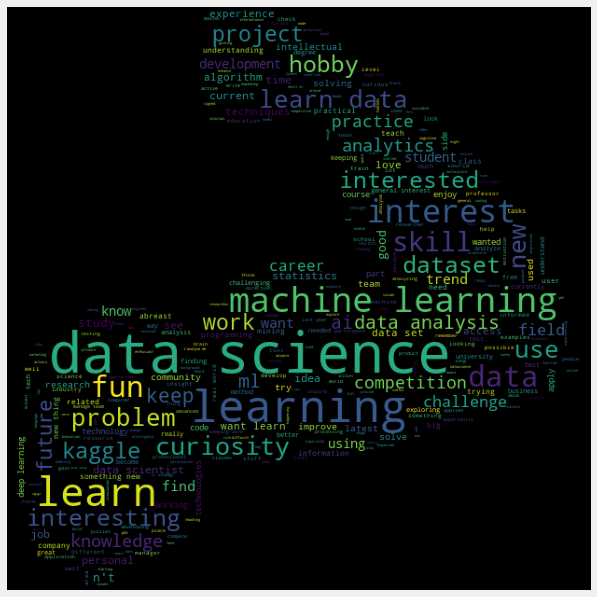

In [67]:
motivation=free['KaggleMotivationFreeForm'].dropna().apply(nltk.word_tokenize)
motivate=[]
for i in motivation:
    motivate.extend(i)
motivate=pd.Series(motivate)
motivate=([i for i in motivate.str.lower() if i not in stop_words])
f1=open("kaggle.png", "wb")
f1.write(codecs.decode(kaggle,'base64'))
f1.close()
img1 = imread("kaggle.png")
hcmask1 = img1
wc = WordCloud(background_color="black", max_words=4000, mask=hcmask1, 
               stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(motivate))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

워드클라우드는 사용자들이 kaggle을 작업하게 된 동기를 보여줍니다. 명확하게 학습 데이터 과학, 기계 학습, 같은 것에 대한 관심, 호기심, 재미 및 데이터 세트 검색이 관련 항목 중 일부입니다.


## Most Frequently Used Libraries

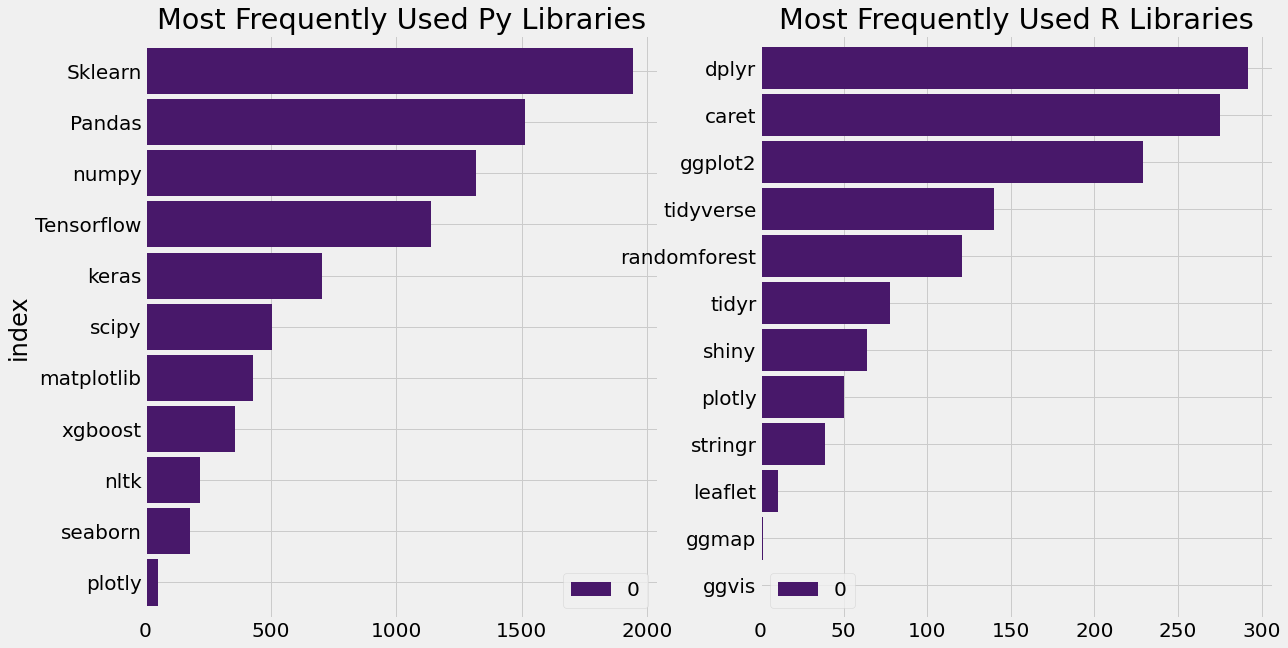

In [68]:
library=free['WorkLibrariesFreeForm'].dropna().apply(nltk.word_tokenize)
lib=[]
for i in library:
    lib.extend(i)
lib=pd.Series(lib)
lib=([i for i in lib.str.lower() if i not in stop_words])
lib=pd.Series(lib)
lib=lib.value_counts().reset_index()
lib.loc[lib['index'].str.contains('Pandas|pandas|panda'),'index']='Pandas'
lib.loc[lib['index'].str.contains('Tensorflow|tensorflow|tf|tensor'),'index']='Tensorflow'
lib.loc[lib['index'].str.contains('Scikit|scikit|sklearn'),'index']='Sklearn'
lib=lib.groupby('index')[0].sum().sort_values(ascending=False).to_frame()
R_packages=['dplyr','tidyr','ggplot2','caret','randomforest','shiny','R markdown','ggmap','leaflet','ggvis','stringr','tidyverse','plotly']
Py_packages=['Pandas','Tensorflow','Sklearn','matplotlib','numpy','scipy','seaborn','keras','xgboost','nltk','plotly']
f,ax=plt.subplots(1,2,figsize=(18,10))
lib[lib.index.isin(Py_packages)].sort_values(by=0,ascending=True).plot.barh(ax=ax[0],width=0.9,color=sns.color_palette('viridis',15))
ax[0].set_title('Most Frequently Used Py Libraries')
lib[lib.index.isin(R_packages)].sort_values(by=0,ascending=True).plot.barh(ax=ax[1],width=0.9,color=sns.color_palette('viridis',15))
ax[1].set_title('Most Frequently Used R Libraries')
ax[1].set_ylabel('')
plt.show()

라이브러리에 대한 몇 가지 간단한 정보:

Python:

1) **Sklearn**- 기계 학습 알고리즘용. 이 라이브러리에는 산업에서 사용되는 거의 모든 중요한 기계 학습 알고리즘이 있습니다.

2) **Pandas, Matlotlib & Seaborn-** 주로 분석 및 시각화 작업에 함께 사용됩니다.

3) **TensorFlow 및 Keras-** 딥 러닝에 사용됩니다.

4) **Numpy 및 Scipy-** 과학적 계산에 사용됩니다.

5) **nltk-** 자연어 처리에 사용됩니다.

R:

1) **dplyr-** dplyr은 빠른 데이터 조작을 위한 패키지입니다.

2) **ggplot2 및 shiny-** 아름다운 그래픽을 만들기 위한 R의 유명한 패키지. Python 비주얼은 이 라이브러리를 사용하여 만든 비주얼의 품질에 가깝습니다.

3) **caret 및 randomforest-** 기계 학습 목적.

4) **tidyr-** 데이터 세트의 레이아웃을 변경하기 위한 도구.

5) **stringr-** 정규 표현식과 문자열을 위한 도구를 배우기 쉽습니다.

** Leaflet(Python의 folium) 및 Plotly는 두 언어 모두에서 공통 라이브러리이며 지리 지도 등과 같은 대화형 플롯을 만드는 데 사용됩니다.**

# Conclusions
노트북에서 수집한 몇 가지 간단한 통찰력:

1) 응답자의 대부분은 미국에서 왔으며 인도가 그 뒤를 이었습니다. 미국은 또한 인도 다음으로 최대 데이터 과학자 수를 가지고 있습니다. 또한 평균 급여는 미국에서 가장 높습니다.

2) 응답자의 대다수가 20~35세 연령대로, 젊은 층에서 데이터 사이언스가 상당히 유명함을 알 수 있다.

3) 응답자는 컴퓨터공학전공 뿐만 아니라 통계학, 보건과학 등의 전공에서도 데이터과학이 학제간 영역임을 보여주었다.

4) 응답자의 대다수가 완전 고용 상태입니다.

5) Kaggle, 온라인 코스(Coursera, eDx 등), 프로젝트 및 블로그(KDNuggets, AnalyticsVidya 등)는 데이터 과학 학습을 위한 최고의 리소스/플랫폼입니다.

6) Kaggle은 데이터 수집 점유율이 가장 높은 반면 Github은 코드 공유 점유율이 가장 높습니다.

7) 데이터 과학자는 직업 만족도가 가장 높고 중간 급여가 두 번째로 높습니다(운영 연구 분석가 다음). 반대로 프로그래머는 직업 만족도가 가장 낮고 중간 급여도 가장 낮습니다.

8) 데이터 과학자들은 또한 이전 직업에서 약 6-20%의 인상을 받습니다.

#### Tips For Budding Data Scientists

1) 데이터 과학자들이 가장 많이 사용하는 언어인 **Python, R 및 SQL**을 배웁니다. Python 및 R은 분석 및 예측 모델링에 도움이 되는 반면 SQL은 데이터베이스 쿼리에 가장 적합합니다.

2) **Logistic Regression, Decision Trees, Support Vector Machine** 등과 같은 기계 학습 기술은 가장 일반적으로 사용되는 기계 학습 기술/알고리즘이므로 학습합니다.

3) **Deep Learning과 Neural Nets**는 미래에 가장 많이 찾는 기술이 될 것이므로 이에 대한 좋은 지식은 많은 도움이 될 것입니다.

4) 데이터 과학자의 워크플로에서 가장 시간이 많이 걸리는 프로세스인 **데이터 수집** 및 **데이터 정리**에 대한 기술을 개발합니다.

5) **시각화**는 데이터 과학 프로젝트에서 매우 중요하며 거의 모든 프로젝트에서 데이터를 더 잘 이해하기 위해 시각화가 필요합니다. 따라서 데이터 과학자는 데이터 시각화를 **기술을 갖추는 데 필요하거나 좋은 것으로 간주하므로 배워야 합니다.**

6) **수학 및 통계**는 데이터 과학에서 매우 중요하므로 실제로 알고리즘이 작동하는 방식을 이해하려면 잘 이해해야 합니다.

7) **프로젝트**는 데이터 과학자에 따르면 데이터 과학을 배우는 가장 좋은 방법입니다. 따라서 프로젝트 작업은 데이터 과학을 더 잘 배우는 데 도움이 됩니다.

8) **회사 및 Kaggle 대회에서 ML 프로젝트 경험**은 데이터 과학에서 작업 지식을 보여줄 수 있는 가장 좋은 방법입니다. 회사에서 ML 프로젝트 작업은 실제 데이터 세트로 작업하는 경험을 제공하여 지식을 향상시킵니다. Kaggle 대회는 전 세계의 데이터 과학자들과 경쟁하게 되므로 훌륭한 매체이기도 합니다. 또한 **Kaggle Rank**는 이력서에 좋은 USP가 될 수 있습니다.